# **Modeling the problem as a Linear Problem** 


## **Requirements**

In [1]:
import numpy as np
import polars as pl
import pickle
import random
import time
from pyomo.environ import *
from itertools import product
from scipy.stats import pearsonr
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## **Introduction**

A new hospital has opened on the International Space Station (ISS) and they need operational research methods to design their care system.

On any given day, the hospital has a list of patients who will attend, as they have medical appointments, while sudden emergencies are not treated here. Then, based on their experience, they rank the patients from least to most serious/important, on a scale of one to ten $(w)$, information that will be crucial in determining the distribution of time between patients.

The main objective is to maximize patient care by focusing on the time spent per patient, taking into account their severity/importance, while maintaining good working conditions for nurses and doctors.

## **Linear problem** 



### **Decision variables**

- $t_{ij}:=$ time (hours) spent by nurse-doctor tandem $i$ seeing the patient $j$.

- $i :=$ index for nurse-doctor tandems.

- $j :=$ index for patients,





### **Input data**

- $n :=$ number of nurse-doctor tandems working at the hospital in a given day.

- $p :=$ number of patients that visit the hospital in a given day.

- $i=1,\dots,n \hspace{0.15cm}; \hspace{0.15cm} j=1,\dots,p$

- $w_j :=$ severity/importance of the patient $j$.

    - $w_j \in [0,10]\subset \mathbb{Z}$.
    
    - The higher $w_j$, the more severe/important the patient $j$ is.

- $h_1:=$ maximum time spent seeing patients by nurse-doctor tandem $i$, in a given day, for all $i$.

- $h_2:=$  maximum time spent by tandem $i$ in patient $j$, in a given day, for all $i,j$.

- $h_3(w_j) :=$ minimum time spent in patient $j$, considering his severity/importance, in a given day, for all $j$.

    - $h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910} :=$ minimum time spent in patient $j$, depending on his $w_j$ value.

    - $h_3(w_j) = \begin{cases} 
                h_3^{12}, \hspace{0.15cm} w_j \in \lbrace 1, 2 \rbrace \\
                h_3^{34}, \hspace{0.15cm} w_j \in \lbrace 3, 4 \rbrace \\
                h_3^{56}, \hspace{0.15cm} w_j \in \lbrace 5, 6 \rbrace \\
                h_3^{78}, \hspace{0.15cm} w_j \in \lbrace 7, 8 \rbrace \\
                h_3^{910}, \hspace{0.15cm} w_j \in \lbrace 9, 10 \rbrace 
                 \end{cases}$
                 
    - For this formulation to make sense would be needed: $h_3^{12} >  h_3^{34} >  h_3^{56} >  h_3^{78}>  h_3^{910}$, but this is not a specific constraint of the problem.

- $h_4 :=$ maximum time spent in patient $j$, in a given day, for all $j$.





### **Objective**

$$\underset{\hspace{0.05cm} \mathbf{t} \hspace{0.05cm} }{Max}  \quad \sum_{j=1}^{p} \sum_{i=1}^{n} \hspace{0.1cm} t_{ij} \cdot w_j$$

Where:

- The objective function of the problem is $f(\mathbf{t}) = \sum_{j=1}^{p} \sum_{i=1}^{n} t_{ij}\cdot w_j\hspace{0.07cm}$, that represents the total time spent seeing patients in given day at the hospital, taking into account by the severity/importance of the patients.

- $\mathbf{t} = (t_{ij} \hspace{0.05cm}:\hspace{0.05cm} i=1,\dots,n \hspace{0.01cm},\hspace{0.05cm} j=1,\dots,p)$




### **Constraints**

-  The time spent by each tandem seeing patients must be at most $h_1$:

   $$\sum_{j=1}^p t_{ij} \hspace{0.05cm}\leq\hspace{0.05cm} h_1 \hspace{0.1cm},\hspace{0.15cm} \forall i = 1,\dots,n$$

- The time spent by tandem $i$ on patient $j$ must be at most $h_2$.

   - Given a patient, they are either not seen or are seen in sufficient time.

   $$t_{ij} \hspace{0.05cm}\geq\hspace{0.05cm} h_2\hspace{0.1cm},\hspace{0.15cm} \forall i = 1,\dots,n\hspace{0.1cm},\hspace{0.15cm}  \forall j = 1,\dots,p$$

- The time a patient is seen by all tandems must be at least $h_3(w_j)$ :

   $$\sum_{i=1}^n t_{ij} \hspace{0.05cm}\geq\hspace{0.05cm} h_3(w_j) \hspace{0.1cm},\hspace{0.15cm} \forall j = 1,\dots, p$$

- The total time a patient is seen by all tandems must be at most $h_4$ :

   $$\sum_{i=1}^n t_{ij} \hspace{0.05cm}\leq\hspace{0.05cm} h_4  \hspace{0.1cm},\hspace{0.15cm} \forall j = 1,\dots, p$$

**Interpretation:**

- $h_1, h_2$ and $h_4$ constraints can be interpreted as constraints that guarantee good working conditions for nurse-doctor tandems.

- $h_3$ constraints can be interpreted as constraints that guarantee that nurse-doctor tandems work enough.



### **General linear problem**

$$
\begin{align*}
\underset{\hspace{0.05cm} \mathbf{t} \hspace{0.05cm} }{Max}  & \quad  \sum_{j=1}^{p} \sum_{i=1}^{n} \hspace{0.1cm}t_{ij}\cdot w_j\\[0.5cm]
\text{s.t.:}&\\[0.2cm]
  & \sum_{j=1}^p t_{ij} \hspace{0.05cm}\leq\hspace{0.05cm} h_1 \hspace{0.1cm},\hspace{0.15cm} \forall i = 1,\dots,n\\[0.5cm]
  &t_{ij} \hspace{0.05cm}\geq\hspace{0.05cm} h_2\hspace{0.1cm},\hspace{0.15cm} \forall i = 1,\dots,n\hspace{0.1cm},\hspace{0.15cm}  \forall j = 1,\dots,p\\[0.3cm]
  &\sum_{i=1}^n t_{ij} \hspace{0.05cm}\geq\hspace{0.05cm} h_3(w_j) \hspace{0.1cm},\hspace{0.15cm} \forall j = 1,\dots, p \\[0.5cm]
  &\sum_{i=1}^n t_{ij} \hspace{0.05cm}\leq\hspace{0.05cm} h_4  \hspace{0.1cm},\hspace{0.15cm} \forall j = 1,\dots, p \\[0.5cm] 
  & t_{ij} \hspace{0.05cm}\geq\hspace{0.05cm} 0 \hspace{0.1cm},\hspace{0.15cm} \forall i =1,\dots,n \hspace{0.1cm},\hspace{0.15cm} \forall j =1,\dots,p\\[0.5cm]
\end{align*}
$$

### **Solving with `Pyomo`**

First of all, we are going to implement the general linear problem presented above in `Pyomo`. 

In [2]:
def hospital_linear_model(n, p, w, h1, h2, h3_1_2, h3_3_4, h3_5_6, h3_7_8, h3_9_10, h4):
    """
    Implements and solves the hospital linear model.

    Parameters (inputs)
    ----------
    n: number of nurse-doctor tandems in a given day.
    p: number of patients tandems in a given day.
    w: 1-D array with the severity/importance of the patients.
    h1: maximum time seeing patients per nurse-doctor tandem in a given day.
    h2: maximum time spent by nurse-doctor tandem i seeing the patient j, for all i,j.
    h3_1_2: minimum time time spent in patient j, if w[j] in [1,2].
    h3_3_4: minimum time time spent in patient j, if w[j] in [3,4].
    h3_5_6: minimum time time spent in patient j, if w[j] in [5,6].
    h3_7_8: minimum time time spent in patient j, if w[j] in [7,8].
    h3_9_10: minimum time time spent in patient j, if w[j] in [9,10].
    h4: maximum time time spent in patient j.

    Returns (outputs)
    -------
    model: the Pyomo model output.
    t_optimal: a dictionary with the optimal values for the t_ij decision variables.
    f_optimal: the optimal value of the objective function.
    """

    # Defining h3 function.
    def h3(w):
        if w in [1, 2] :
           return h3_1_2
        if w in [3, 4] :
           return h3_3_4
        elif w in [5, 6] :
           return h3_5_6
        elif w in [7, 8] :
           return h3_7_8
        elif w in [9, 10] :
           return h3_9_10

    # Initialize a model.
    model = ConcreteModel()

    # Initialize ranges for tandems and patients.
    model.N = range(0,n)
    model.P = range(0,p)

    # Defining t_ij decision variables as non-negative reals (t_ij >= 0).
    model.t = Var(model.N, model.P, domain=NonNegativeReals) 

    # Objective function to maximize the weighted sum of time spent with patients
    model.cost = Objective(expr=sum(model.t[i,j] * w[j] for i in model.N for j in model.P), sense=maximize)

    # Constraints
    model.constraints = ConstraintList()

    # The total time spent by each tandem on all patients must be at most h1.
    for i in model.N:
        model.constraints.add(sum(model.t[i,j] for j in model.P) <= h1)

    # The time spent by tandem i on patient j must be at most h2.
    for i in model.N:
        for j in model.P:
            model.constraints.add(model.t[i, j] <= h2)
    
    # The total time a patient is seen by all tandems must be at least h3(w[j])
    for j in model.P:
        model.constraints.add(sum(model.t[i,j] for i in model.N) >= h3(w[j]))

    # The total time a patient is seen by all tandems must be at most h4.
    for j in model.P:
        model.constraints.add(sum(model.t[i,j] for i in model.N) <= h4)

    # Load dual information
    model.dual = Suffix(direction=Suffix.IMPORT)

    # Solve the model
    solver = SolverFactory('glpk')
    results = solver.solve(model, tee=False)  # Set tee=True to show solver output

    # Check solver status and termination condition
    if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
        # print("Solution Found")
        # Extract optimal values for variables and objective
        t_optimal = {(i, j): model.t[i, j].value for i in model.N for j in model.P}
        f_optimal = model.cost.expr()
    elif results.solver.termination_condition == TerminationCondition.infeasible:
        # print("No feasible solution")
        t_optimal, f_optimal = None, None
    else:
        # print("No feasible solution")
        t_optimal, f_optimal = None, None

    return model, t_optimal, f_optimal

## **Preliminary analysis**

In this section we are going to do a preliminary numerical analysis of the problem posed above, for a given set of parameters.

In [3]:
# Parameters definition:
n=50; p=500; h1=6; h2=1; h4=4

h3_1_2 = 0.10 
h3_3_4 = 0.30 
h3_5_6 = 0.55  
h3_7_8 = 0.80 
h3_9_10 = 1 
    
np.random.seed(123)
w = np.random.randint(1, 11, p) 

# Problem execution:
model, t_optimal, f_optimal = hospital_linear_model(n, p, w, h1, h2, h3_1_2, h3_3_4, h3_5_6, h3_7_8, h3_9_10, h4)

#### **Optimal values**

 **Decision variables**

The optimal values for the $t_{ij}$ decision variables for the given set of parameters are the following:

In [4]:
t_optimal

{(0, 0): 0.3,
 (0, 1): 0.3,
 (0, 2): 0.8,
 (0, 3): 0.1,
 (0, 4): 0.3,
 (0, 5): 1.0,
 (0, 6): 0.8,
 (0, 7): 0.1,
 (0, 8): 0.1,
 (0, 9): 0.1,
 (0, 10): 1.0,
 (0, 11): 0.1,
 (0, 12): 0.1,
 (0, 13): 0.9,
 (0, 14): 0.0,
 (0, 15): 0.0,
 (0, 16): 0.0,
 (0, 17): 0.0,
 (0, 18): 0.0,
 (0, 19): 0.0,
 (0, 20): 0.0,
 (0, 21): 0.0,
 (0, 22): 0.0,
 (0, 23): 0.0,
 (0, 24): 0.0,
 (0, 25): 0.0,
 (0, 26): 0.0,
 (0, 27): 0.0,
 (0, 28): 0.0,
 (0, 29): 0.0,
 (0, 30): 0.0,
 (0, 31): 0.0,
 (0, 32): 0.0,
 (0, 33): 0.0,
 (0, 34): 0.0,
 (0, 35): 0.0,
 (0, 36): 0.0,
 (0, 37): 0.0,
 (0, 38): 0.0,
 (0, 39): 0.0,
 (0, 40): 0.0,
 (0, 41): 0.0,
 (0, 42): 0.0,
 (0, 43): 0.0,
 (0, 44): 0.0,
 (0, 45): 0.0,
 (0, 46): 0.0,
 (0, 47): 0.0,
 (0, 48): 0.0,
 (0, 49): 0.0,
 (0, 50): 0.0,
 (0, 51): 0.0,
 (0, 52): 0.0,
 (0, 53): 0.0,
 (0, 54): 0.0,
 (0, 55): 0.0,
 (0, 56): 0.0,
 (0, 57): 0.0,
 (0, 58): 0.0,
 (0, 59): 0.0,
 (0, 60): 0.0,
 (0, 61): 0.0,
 (0, 62): 0.0,
 (0, 63): 0.0,
 (0, 64): 0.0,
 (0, 65): 0.0,
 (0, 66): 0.0,
 (0, 

For example, the time spent in patient $j=5$ by tandem $i=1$, i.e. $t_{15}$, is:

In [5]:
t_optimal[0,4] # 0.3 hours = 18 mins

0.3

**Objective function**

In this case the optimal value for the objective function is the following:

In [6]:
f_optimal

2228.600000000002

#### **Time spent in patients**

Now we are going to analyze the time spent in the patients, in this particular case.

We built a function that computes the time spent seeing patient j in a given day .
It's important to notice that a patient could be seen by several nurse-doctor tandems.

In [7]:
def time_seeing_patient(j):
    return np.sum([t_optimal[i, j] for i in range(0,n)])

For example, total time spent in patient $j=45$, that is, $\sum_{i=1}^n t_{i45}$, is the following:

In [8]:
time_seeing_patient(44) # 0.8 hours = 48 mins

0.8

Using the previous function we can collect the total time spent in each patient in an array.

In [9]:
total_times_per_patient = np.array([time_seeing_patient(j) for j in range(0,p)])

In [10]:
total_times_per_patient

array([0.3 , 0.3 , 0.8 , 0.1 , 0.3 , 4.  , 0.8 , 0.1 , 0.1 , 0.1 , 4.  ,
       0.1 , 0.1 , 1.  , 0.3 , 0.55, 0.1 , 0.1 , 0.55, 0.1 , 0.8 , 0.3 ,
       0.3 , 0.55, 0.8 , 0.3 , 0.55, 1.  , 0.1 , 0.8 , 4.  , 0.3 , 0.55,
       0.8 , 0.1 , 0.55, 0.8 , 0.3 , 0.1 , 1.  , 0.3 , 0.55, 0.1 , 0.3 ,
       0.8 , 0.3 , 0.55, 0.55, 0.8 , 0.3 , 0.1 , 0.8 , 0.55, 0.8 , 0.8 ,
       0.8 , 0.1 , 0.55, 0.8 , 4.  , 0.3 , 0.55, 1.  , 0.1 , 0.3 , 0.1 ,
       0.1 , 0.3 , 0.55, 4.  , 0.1 , 1.  , 0.1 , 0.8 , 0.3 , 0.3 , 0.55,
       4.  , 0.8 , 3.05, 0.3 , 0.3 , 0.3 , 0.3 , 1.  , 0.8 , 3.  , 0.8 ,
       0.8 , 0.3 , 3.  , 0.8 , 0.8 , 0.8 , 0.1 , 0.3 , 0.55, 0.3 , 0.1 ,
       0.1 , 0.55, 1.  , 0.8 , 1.  , 3.  , 0.1 , 0.1 , 0.3 , 0.1 , 0.3 ,
       0.55, 0.8 , 0.8 , 0.1 , 0.55, 0.3 , 0.3 , 0.8 , 0.8 , 1.  , 0.8 ,
       0.55, 0.55, 0.8 , 0.1 , 0.1 , 3.  , 1.  , 1.  , 0.55, 1.  , 0.8 ,
       0.1 , 0.8 , 1.  , 0.8 , 3.  , 0.1 , 0.8 , 0.1 , 0.8 , 1.  , 1.  ,
       0.8 , 0.1 , 0.3 , 0.1 , 1.  , 0.8 , 0.55, 0.

#### **Average time spent per patient**

Now we can compute some statistics over the time spent in patients, like for example the average time spent per patient.

In [11]:
np.mean(total_times_per_patient) # 0.6 hours = 36 mins

0.6

#### **Max time spent per patient**

The maximum time spent in a single patient is enforced by $h_4$ constriant, that in this case has been fixed to $4$.

In [12]:
np.max(total_times_per_patient) # 4 hours

4.0

#### **Min time spent per patient**

The minimun time spent in a single patient is set by $h_3^{12}$, in this case, that has been fixed to $0.1$.

In [13]:
np.min(total_times_per_patient) # 0.1 hours = 6 mins

0.0999999999999996

In [14]:
np.round(np.min(total_times_per_patient), 2)

0.1

#### **Median of time spent per patient**

In [15]:
np.median(total_times_per_patient) 

0.55

#### **$75$-quantile of time spent per patient**

In [16]:
np.quantile(total_times_per_patient, 0.75)

0.8

#### **$25$-quantile time spent per patient**

In [17]:
np.quantile(total_times_per_patient, 0.25)

0.3

#### **Number of patients seen**

Another interesting statistic to compute is the number of patients seen. This can be calculated as the number of non zero values in the array `total_times_per_patient`.

In [18]:
np.sum(total_times_per_patient > 0)

500

In this case, all the patients has been seen, what is coherent with the $h_3$ constraints that we have imposed in this case, since $h_3^{12} > \dots > h_3^{910} > 0$.

#### **Relation between time spent per patient and the severity/importance $(w)$**

We can do a simple analysis of the relationship between the time spent per patient and the severity/importance of the patient. 

For example, we can compute the Pearson linear correlation coefficient between this two variables.

In [19]:
pearsonr(w, total_times_per_patient)

PearsonRResult(statistic=0.7408929988622495, pvalue=3.901184076046128e-88)

A linear correlation of $0.74$ indicates a high positive linear relationship between the time spent per patient and their severity/importance.

We can make an scatter plot of both variables to visualize this relationship.

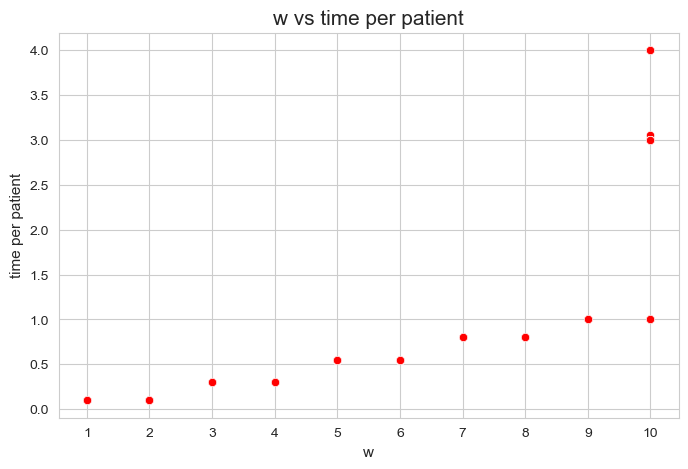

In [20]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=w, y=total_times_per_patient, color='red')
plt.title('w vs time per patient', size=15)
ax.set_ylabel('time per patient', size=11)
ax.set_xlabel('w', size=11)
plt.xticks(np.unique(w))
plt.show()

It's important to realize that the points are overlapped, since there are $500$ patients and only $13$ points are visible.

## **Analysis of sensitivity**

In this section we are going to carry out a sensitivity analysis.

Typically, sensitivity analysis is done in `Pyomo` using the dual version of the problem and analyzing the output of `model.pprint()`. But this output is too large in this case, what make impossible any fruitful interpretation. Besides, this output only tell us about how the optimal value of the objective function varies when the parameter of an specific constraints varies in one unit (marginally).


However, in this project we are going to assume a broad concept of sensitivity analysis. Specifically what we understand on sensitivity analysis is, basically, an analysis on the influence of the model parameters, that is, how they affect to some important metric of the problem, such as whether it is feasible or not, the objective function, the average time spent per patients, and so on.

In [ ]:
model.pprint()
# too massive output, so it will not be displayed.

### **Analysis of individual parameters** 

In this section we make a sensitivity analysis of some of the parameters of the problem, following an individual approach, in the sense that each parameter will be analyzed separately.

This analysis is essentially carried out using the function `get_results1` and `get_results2`.

In [22]:
params = dict()

In [23]:
def get_results1(x, parameter_list, params, model):
    """
    To get the first type results individual for the hospital model.

    Parameters (inputs)
    ----------
    x: a string with the name of the parameter to by analyzed.
       The possible names are: 'n', 'p', 'w', 'h1', 'h2', 'h4', 'h3_1_2', 'h3_3_4', 'h3_5_6', 'h3_7_8', 'h3_9_10'
    parameter_list: a list with the values of the parameter x to analyze.
    params: a dictionary with the values of the rest of model parameters, setting x as None.
    model: an string indicating what type of hospital model to use, 'linear' or 'integer'.

    Returns (outputs)
    -------
    results1_LM: a dictionary with the first type results obtained.
    """

    def time_seeing_patient(j, t_optimal, params):
        return np.sum([t_optimal[i, j] for i in range(0, params['n'])])

    results1 = dict()
    results1[x] = dict()

    for y in parameter_list :

        params[x] = y

        if model == 'linear' :

            model_, t_optimal, f_optimal = hospital_linear_model(n=params['n'], p=params['p'], w=params['w'], h1=params['h1'], h2=params['h2'], 
                                                                 h3_1_2=params['h3_1_2'], h3_3_4=params['h3_3_4'], h3_5_6=params['h3_5_6'], 
                                                                 h3_7_8=params['h3_7_8'], h3_9_10=params['h3_9_10'], h4=params['h4'])
    
        elif model == 'integer' :

            model_, t_optimal, y_optimal, f_optimal = hospital_integer_model(n=params['n'], p=params['p'], w=params['w'], h1=params['h1'], 
                                                                             h2=params['h2'], h3_1_2=params['h3_1_2'], h3_3_4=params['h3_3_4'],
                                                                             h3_5_6=params['h3_5_6'], h3_7_8=params['h3_7_8'], h3_9_10=params['h3_9_10'], 
                                                                             h4=params['h4'])


        if f_optimal == None :

            results1[x][params[x]] = {'type': 'not_feasible'}

        else :

            total_times_per_patient = np.array([time_seeing_patient(j, t_optimal, params) for j in range(0, params['p'])])

            results1[x][params[x]] = {'type': 'feasible', 't_optimal': t_optimal, 'f_optimal': f_optimal,  
                                         'total_times_per_patient': total_times_per_patient}
            
    return results1

In [24]:
def get_results2(x, parameter_list, results1) :
    """
    To get the second type results for the hospital linear model.

    Parameters (inputs)
    ----------
    x: a string with the name of the parameter to by analyzed.
       The possible names are: 'n', 'p', 'w', 'h1', 'h2', 'h4', 'h3_1_2', 'h3_3_4', 'h3_5_6', 'h3_7_8', 'h3_9_10'
    parameter_list: a list with the values of the parameter x to analyze.
    results1_LM: results returned as output of the function get_results1_LM

    Returns (outputs)
    -------
    results2_LM: a dictionary with the second type results obtained.
    """

    results2 = dict()
    results2[x] = dict()
    results2[x]['feasible'] = [i for i in results1[x].keys() if results1[x][i]['type'] == 'feasible']
    results2[x]['not_feasible'] = [i for i in results1[x].keys() if results1[x][i]['type'] == 'not_feasible']
    results2[x]['f_optimal_feasible'] = {i: results1[x][i]['f_optimal'] for i in results2[x]['feasible']}
    results2[x]['type'] = [results1[x][i]['type'] for i in parameter_list]
    results2[x]['avg_time_per_patient'] = {i: np.mean(results1[x][i]['total_times_per_patient']) for i in results2[x]['feasible']}
    results2[x]['median_time_per_patient'] = {i: np.median(results1[x][i]['total_times_per_patient']) for i in results2[x]['feasible']}
    results2[x]['median_time_per_patient'] = {i: np.median(results1[x][i]['total_times_per_patient']) for i in results2[x]['feasible']}
    results2[x]['Q75_time_per_patient'] = {i: np.quantile(results1[x][i]['total_times_per_patient'], 0.75) for i in results2[x]['feasible']}
    results2[x]['Q25_time_per_patient'] = {i: np.quantile(results1[x][i]['total_times_per_patient'], 0.25) for i in results2[x]['feasible']}
    results2[x]['num_patients_seen'] = {i: np.sum(results1[x][i]['total_times_per_patient'] > 0) for i in results2[x]['feasible']}
    results2[x]['w_time_patient_df'] = {i: pl.DataFrame({'w': w, 'time_patient': results1[x][i]['total_times_per_patient']}) 
                                           for i in results2[x]['feasible']}
    results2[x]['avg_time_patient_per_w'] = {i: {w_value: round(results2[x]['w_time_patient_df'][i].filter(pl.col('w') == w_value)['time_patient'].mean(), 3) 
                                                    for w_value in np.unique(w)} for i in results2[x]['feasible']}

    return results2

#### **Analysis of h_1 parameter**

   - $h_1 :=$ maximum time seeing patients per nurse-doctor tandem in a given day.


In [25]:
# Defining the values of the rest of parameters and setting h1 as None.
params['n'] = 50 ; params['p']=500 ; params['h1']=None ; params['h2']=1 ; params['h4']=4
params['h3_1_2'] = 0.10 
params['h3_3_4'] = 0.30 
params['h3_5_6'] = 0.55  
params['h3_7_8'] = 0.80 
params['h3_9_10'] = 1 

np.random.seed(123)
params['w'] = np.random.randint(1, 11, params['p']) 

# Defining the parameter values list.
parameter_list = np.arange(2, 13)

In [26]:
results1 = get_results1('h1', parameter_list, params, model='linear')

In [27]:
results2 = get_results2('h1', parameter_list, results1)

Now we are going to use te results stored in `results1_LM` and `results2_LM` to make some valuable plots, in order to analyze the influence of the $h_1$ parameter in the hospital linear model.

- **Problem type (feasible - not feasible) vs $h_1$**

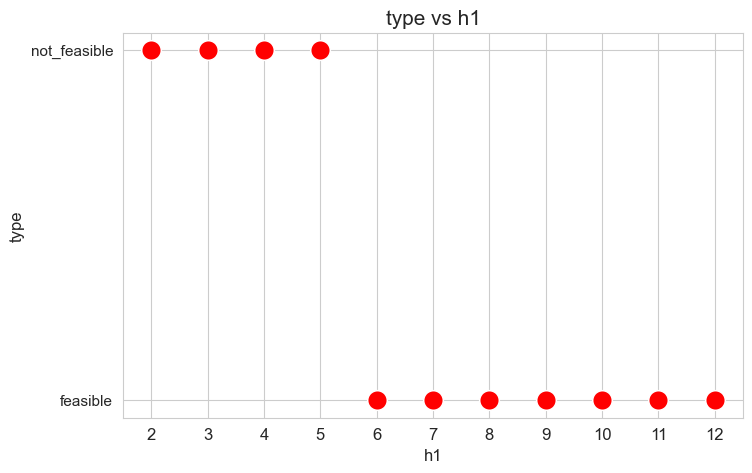

In [28]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(y=results2['h1']['type'], x=parameter_list, color='red', s=200)
plt.title('type vs h1', size=15)
ax.set_ylabel('type', size=12)
ax.set_xlabel('h1', size=12)
plt.xticks(parameter_list, fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

When the value of $h_1$, that is, the maximum time that nurse-doctor tandems can spent seeing patients in a given day  is small enough (lower than 6), the problem is not feasible, given the values set for the rest of the parameters. But, when this parameter is large enough (greater or equal to 6), the problems becomes feasible.

These results can be interpreted as when the nurse-doctor tandems are allowed to work a lot of time over the patients, they can satisfy the amount of work required by the constraints, namely by $h_3$ constraints, that are the ones that impose a minimum work over the nurse-doctor tandems.

The next plots will only take into account the feasible values of $h_1$, since for the non feasible ones, any problem metric cannot be computed, since the problem itself cannot be solved.

- **Number of patients seen vs $h_1$**

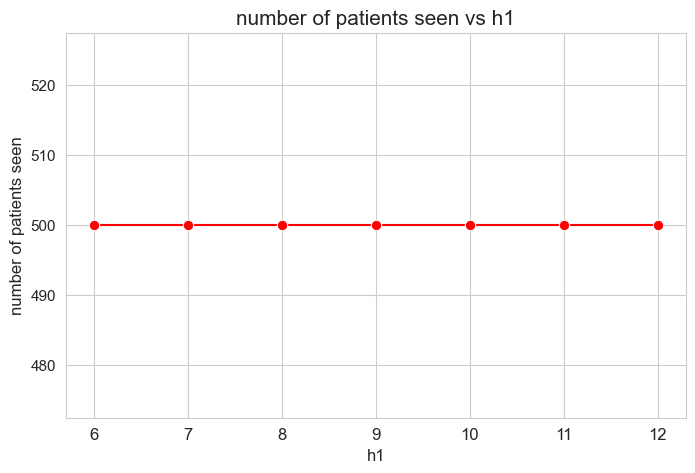

In [29]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h1']['num_patients_seen'].values(), x=results2['h1']['feasible'], 
                  marker='o', markersize=7.5, color='red')
plt.title('number of patients seen vs h1', size=15)
ax.set_ylabel('number of patients seen', size=12)
ax.set_xlabel('h1', size=12)
plt.xticks(results2['h1']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The number of patients seen is not affected by $h_1$ parameter, since it is the same regardless the $h_1$ values.

This is trivial because of the values set for $h_3$ parameters, that are all of them positive $(>0)$, so that, if the problem is feasible $(h_1 \in [6, 12]\subset \mathbb{Z})$, the number of patient seen is enforced to be the maximum $(=p).$

We will relax the  $h_3 > 0$ condition later. 


- **Optimal value of the objective function vs $h_1$**

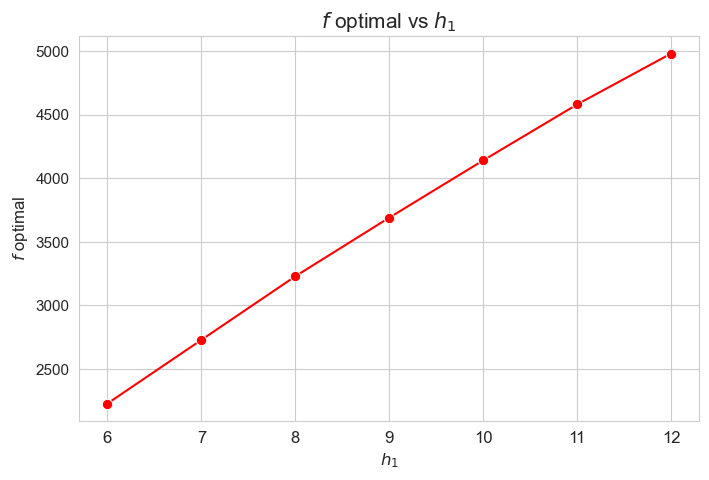

In [30]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h1']['f_optimal_feasible'].values(), x=results2['h1']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('$f$ optimal vs $h_1$', size=15)
ax.set_ylabel('$f$ optimal', size=12)
ax.set_xlabel('$h_1$', size=12)
plt.xticks(results2['h1']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The greater $h_1$, the higher optimal value of the objective function. (At least, given the set of $h_1$ values tested).

Considering that the values of $w$ are fixed since the beginning, and the objective function is defined as ${p} \sum_{i=1}^{n} \hspace{0.1cm} t_{ij} \cdot w_j$, the fact that the optimal value of the objective function increases when $h_1$ increases means that the time spent in patients must increase as well. This fact can be seen in the nex plot.




- **Average time spent per patient vs $h_1$**

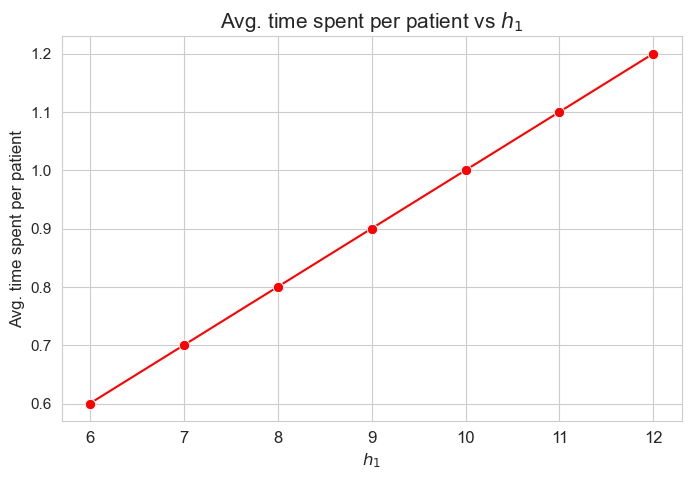

In [31]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h1']['avg_time_per_patient'].values(), x=results2['h1']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Avg. time spent per patient vs $h_1$', size=15)
ax.set_ylabel('Avg. time spent per patient', size=12)
ax.set_xlabel('$h_1$', size=12)
plt.xticks(results2['h1']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The greater $h_1$, the higher average time spent per patient. (At least, given the set of $h_1$ values tested).

Considering that the values of $w$ are fixed since the beginning, and the objective function is defined as ${p} \sum_{i=1}^{n} \hspace{0.1cm} t_{ij} \cdot w_j$, the fact that the optimal value of the objective function increases when $h_1$ increases means that the time spent in patients must increase as well. This fact can be seen in both the next and last plot of this section.



- **Median time spent per patient vs $h_1$**

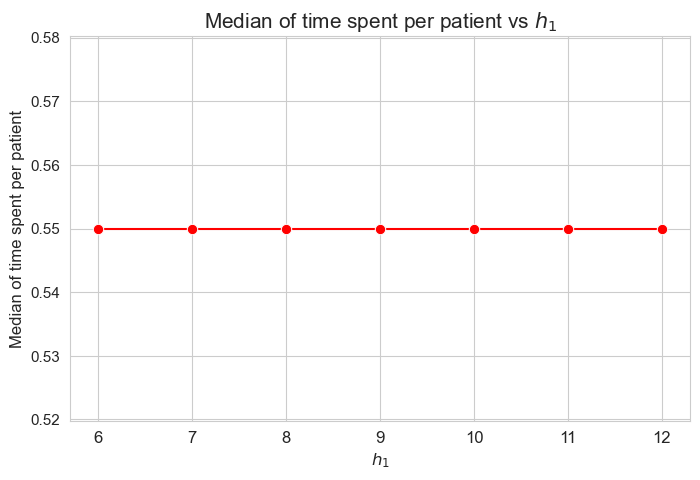

In [32]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h1']['median_time_per_patient'].values(), x=results2['h1']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Median of time spent per patient vs $h_1$', size=15)
ax.set_ylabel('Median of time spent per patient', size=12)
ax.set_xlabel('$h_1$', size=12)
plt.xticks(results2['h1']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The median of the time spent per patient is not affected by $h_1$ parameter, since it is the same regardless the $h_1$ values. This shows a clear different behavior in respect to the average.

We can see that the median time is $0.55$ in all the cases, that is just the value set for $h_3^{56}$ parameter. We will analyzed later whether this is a coincidence or not.

- **$75$-quantile time spent per patient vs $h_1$**

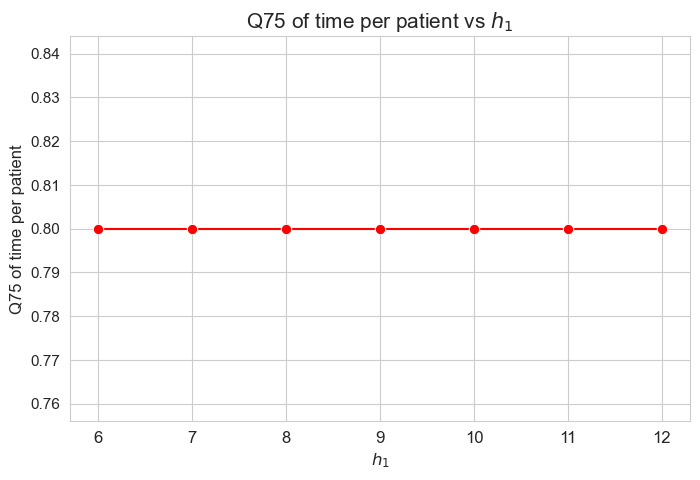

In [33]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h1']['Q75_time_per_patient'].values(), x=results2['h1']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q75 of time per patient vs $h_1$', size=15)
ax.set_ylabel('Q75 of time per patient', size=12)
ax.set_xlabel('$h_1$', size=12)
plt.xticks(results2['h1']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The $75$-quantile of the time spent per patient is not affected by $h_1$ parameter, since it is the same regardless the $h_1$ values. 

We can see that the median time is $0.80$ in all the cases, that is just the value set for $h_3^{78}$ parameter. We will analyzed later whether this is a coincidence or not.

- **$25$-quantile time spent per patient vs $h_1$**

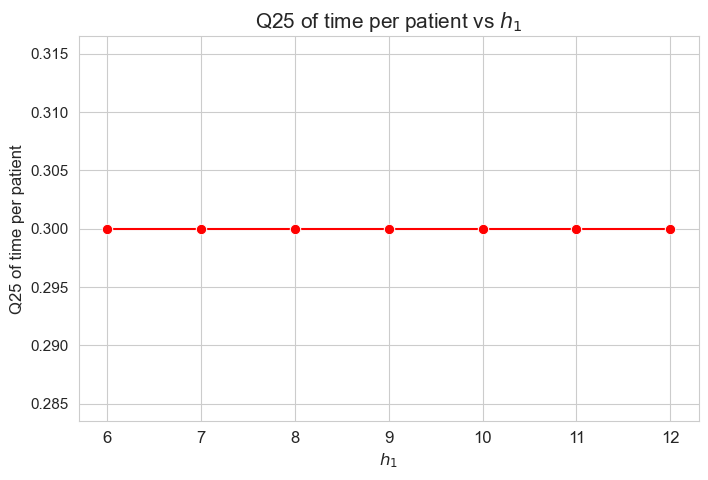

In [34]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h1']['Q25_time_per_patient'].values(), x=results2['h1']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q25 of time per patient vs $h_1$', size=15)
ax.set_ylabel('Q25 of time per patient', size=12)
ax.set_xlabel('$h_1$', size=12)
plt.xticks(results2['h1']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The $25$-quantile of the time spent per patient is not affected by $h_1$ parameter, since it is the same regardless the $h_1$ values. 

We can see that the median time is $0.30$ in all the cases, that is just the value set for $h_3^{34}$ parameter. We will analyzed later whether this is a coincidence or not.

- **Average time spent per patient vs $w$ vs $h_1$**

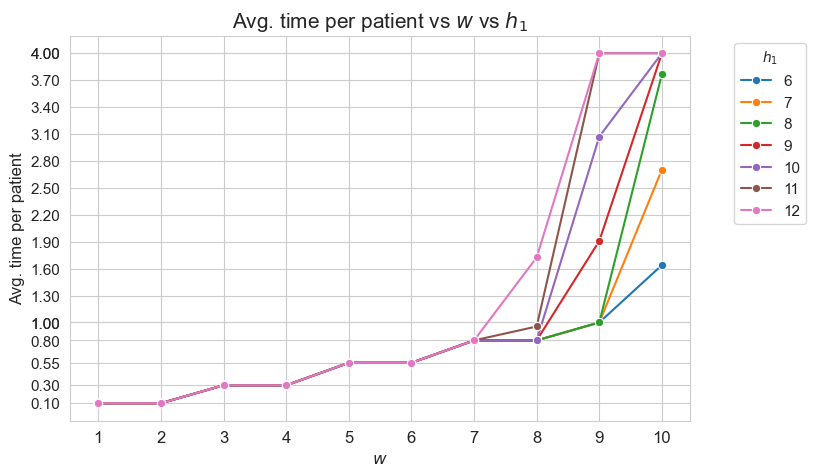

In [35]:
plt.figure(figsize=(8, 5))
for i, h1 in zip(results2['h1']['avg_time_patient_per_w'].keys(), results2['h1']['feasible']) :
    ax = sns.lineplot(y=results2['h1']['avg_time_patient_per_w'][i].values(), x=results2['h1']['avg_time_patient_per_w'][i].keys(), 
                      label=h1, marker='o', markersize=6)
plt.title('Avg. time per patient vs $w$ vs $h_1$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$w$', size=12)
plt.xticks(list(results2['h1']['avg_time_patient_per_w'][i].keys()), fontsize=12)
y_ticks_list = [0.1, 0.3, 0.55, 0.80, 1, 4] + list(np.arange(1, 4.3, 0.3))
plt.yticks(y_ticks_list, fontsize=11)
plt.legend(title='$h_1$', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=11)
plt.show()

**Interpretation of the results:**

This plot shows the average time spent per patient depending on both $w$ and $h_1$.

- We can see that for the patients with $w_j \in [1,7] \subset \mathbf{Z}$, the the average time spent per patient doesn't depend on $h_1$ (it is the same for all the values tested).

   - For type 3-4 patients $(w_j\in \lbrace 3, 4\rbrace)$, the average time spent per patient is $0.3$, that is the value fixed for $h_3^{34}$, regardless of $h_1$.

   - For type 5-6 patients $(w_j\in \lbrace 5, 6\rbrace)$, the average time spent per patient is $0.55$, that is the value fixed for $h_3^{56}$, regardless of $h_1$.

   - For type 7 patients $(w_j = 7)$, the average time spent per patient is $0.80$, that is the value fixed for $h_3^{78}$, regardless of $h_1$.

- However, for the patients with $w_j \in [8,10]\subset \mathbf{Z}$, the average time spent in patients depends on $h_1$.

   - For type 8 patients $(w_j =8)$, the average time spent in patients is $0.80$, that is, the value fixed for $h_3^{78}$, for $h_1 \in \lbrace 6,7,8,9,10\rbrace$, but it increases up to almost $1$ for $h_1=11$ and up to $1.70$ for $h_1 = 12$.

     This means that, in the case of type 8 patients, that are severe, when the nurse-doctor tandems are allowed to work enough $(h_1 = \lbrace 11, 12\rbrace)$, the average time spent in this type of patients is greater that the minimum required by $h_3^{78}$ constraint, that is $0.80$   (specially when $h_1 = 12$) .

   - For type 9 patients $(w_j =9)$, the average time spent in patients is $1$, that is, the value fixed for $h_3^{910}$, for $h_1 \in \lbrace 6,7,8\rbrace$, but it increases up to $1.90$ for $h_1=9$, up to $3.10$ for $h_1 = 10$, and up to $4$ for $h_1 \in \lbrace 11, 12\rbrace.$

      Notice that $h_4$, i.e. the maximum time that can be spent in a single patient, has been fixed to $4$. This implies the average time spent per patient cannot be greater that $4$, since the maximum of  time per patient variable is $h_4$, that is $4$ , in this case.

      This means that, in the case of type 9 patients, that are quite severe, when the nurse-doctor tandems are allowed to work enough $(h_1 \in \lbrace 9, 10, 11, 12\rbrace)$, the average time spent in this type of patients is greater that the minimum required by $h_3^{910}$ constraint, that is $1$   (specially when $h_1 \in \lbrace 10, 11, 12\rbrace$) .

   - For type 10 patients $(w_j =10)$, the average time spent in patients is $1.60$ for $h_1=6$, $2.7$ for $h_1=7$, a little more than $3.70$ for $h_1=8$, and $4$ for $h_1 \in \lbrace 9, 10, 11, 12\rbrace$.

      This means that, in the case of type 10 patients, that are the most severe ones, when the nurse-doctor tandems are allowed to work enough $(h_1 \in \lbrace 9, 10, 11, 12\rbrace)$, the average time spent in this type of patients is the maximum possible, namely $h_4 = 4$, and in the rest of cases $(h_1 \in \lbrace 6,7,8\rbrace)$ it is much more than the minimum required $h_3^{910} = 1.$

#### **Analysis of $h_2$ parameter**

   - $h_2 :=$ maximum time spent by nurse-doctor tandem $i$ seeing the patient $j$, for all $i,j$.


In [36]:
# Defining the values of the rest of parameters and setting h2 as None.

params['n'] = 50 ; params['p']=500 ; params['h1']=6 ; params['h2']=None ; params['h4']=4
params['h3_1_2'] = 0.10 
params['h3_3_4'] = 0.30 
params['h3_5_6'] = 0.55  
params['h3_7_8'] = 0.80 
params['h3_9_10'] = 1 

np.random.seed(123)
params['w'] = np.random.randint(1, 11, params['p']) 

# Defining the parameter values list.
parameter_list = np.round(np.arange(0.4, 2.2, 0.2), 2)

In [37]:
results1 = get_results1('h2', parameter_list, params, model='linear')

In [38]:
results2 = get_results2('h2', parameter_list, results1)

Now we are going to use te results stored in `results1_LM` and `results2_LM` to make some valuable plots, in order to analyze the influence of the $h_2$ parameter in the hospital linear model.

- **Problem type (feasible - not feasible) vs $h_2$**

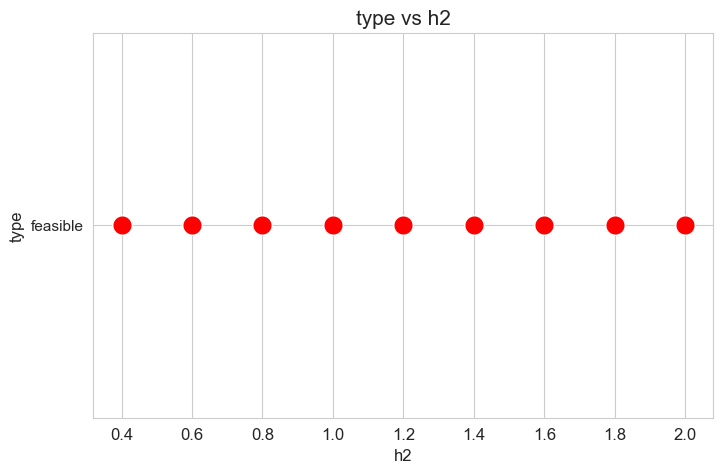

In [39]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(y=results2['h2']['type'], x=parameter_list, color='red', s=200)
plt.title('type vs h2', size=15)
ax.set_ylabel('type', size=12)
ax.set_xlabel('h2', size=12)
plt.xticks(parameter_list, fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The problem is feasible regardless the $h_2$ parameter, given the set of values fixed for the rest of parameters.

This means that this parameter is not important to determine whether the problem will be feasible or not, at least in this case.

- **Number of patients seen vs $h_2$**

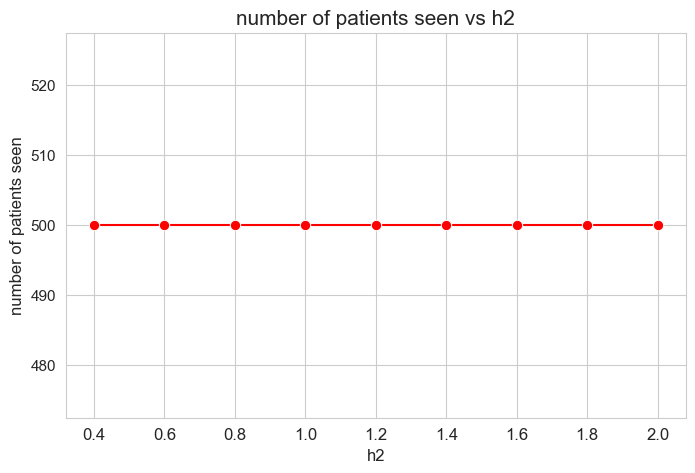

In [40]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h2']['num_patients_seen'].values(), x=results2['h2']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('number of patients seen vs h2', size=15)
ax.set_ylabel('number of patients seen', size=12)
ax.set_xlabel('h2', size=12)
plt.xticks(results2['h2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Same interpretation as the one made for $h_1$ parameter.

- **Optimal value of the objective function vs $h_2$**

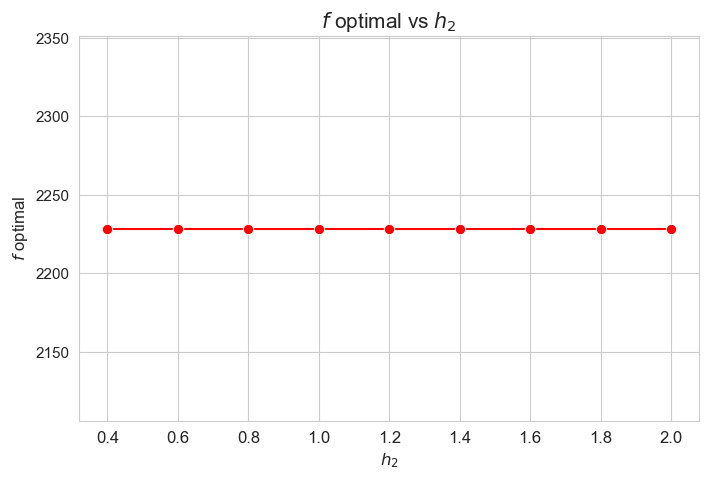

In [41]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=np.round(list(results2['h2']['f_optimal_feasible'].values()), 3), x=results2['h2']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('$f$ optimal vs $h_2$', size=15)
ax.set_ylabel('$f$ optimal', size=12)
ax.set_xlabel('$h_2$', size=12)
plt.xticks(results2['h2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The optimal value of the objective function is the same regardless of $h_2$ parameter, given the set of values fixed for the rest of parameters.

This means that this parameter is not important to determine the optimal value of the objective, at least in this case.

- **Average time spent per patient vs $h_2$**

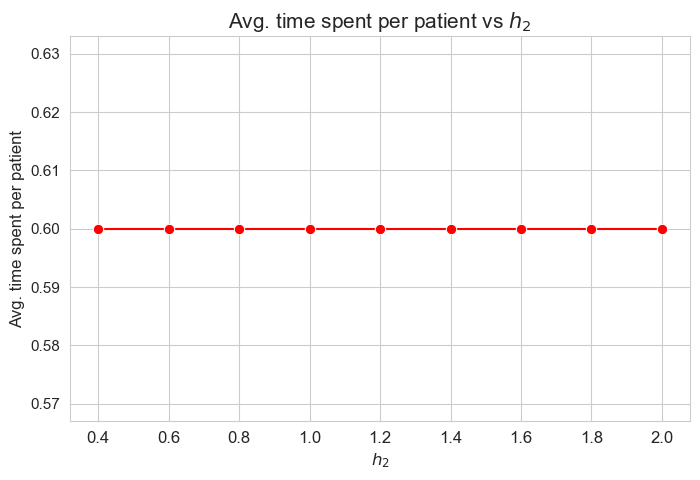

In [42]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h2']['avg_time_per_patient'].values(), x=results2['h2']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Avg. time spent per patient vs $h_2$', size=15)
ax.set_ylabel('Avg. time spent per patient', size=12)
ax.set_xlabel('$h_2$', size=12)
plt.xticks(results2['h2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

$h_2$ doesn't affect to the average time spent per patient, given the set of values fixed initially for the rest of parameters.

- **Median time spent per patient vs $h_2$**

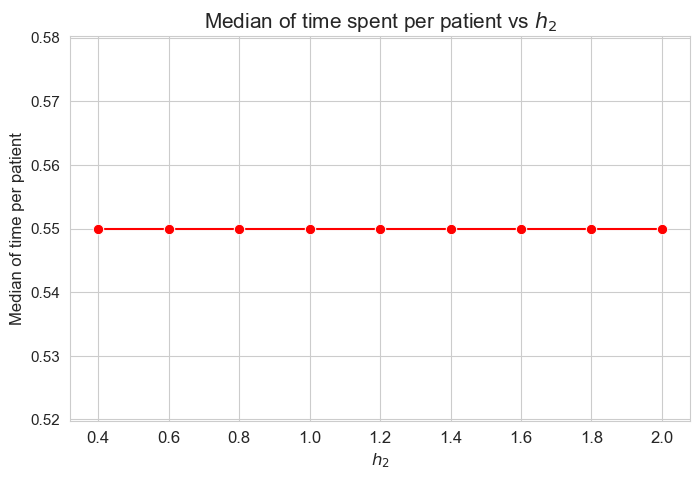

In [43]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h2']['median_time_per_patient'].values(), x=results2['h2']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Median of time spent per patient vs $h_2$', size=15)
ax.set_ylabel('Median of time per patient', size=12)
ax.set_xlabel('$h_2$', size=12)
plt.xticks(results2['h2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

$h_2$ doesn't affect to the average time spent per patient, given the set of values fixed initially for the rest of parameters.

- **$75$-quantile of time spent per patient vs $h_2$**

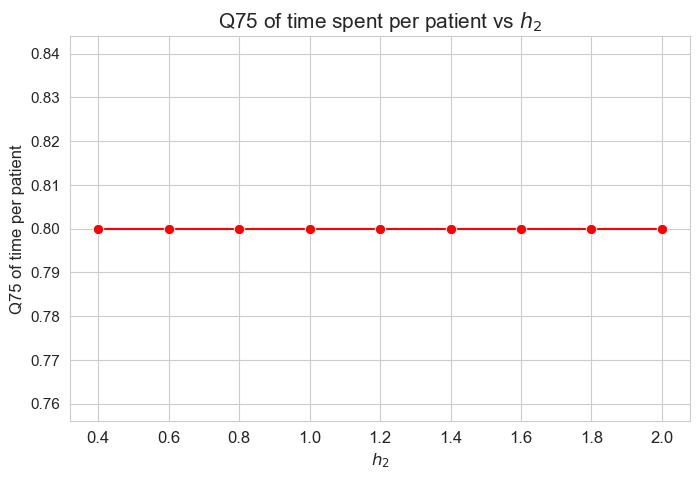

In [44]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h2']['Q75_time_per_patient'].values(), x=results2['h2']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q75 of time spent per patient vs $h_2$', size=15)
ax.set_ylabel('Q75 of time per patient', size=12)
ax.set_xlabel('$h_2$', size=12)
plt.xticks(results2['h2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

$h_2$ doesn't affect to the $75$-quantile of the time spent per patient, given the set of values fixed initially for the rest of parameters.

- **$25$-quantile of time spent per patient vs $h_2$**

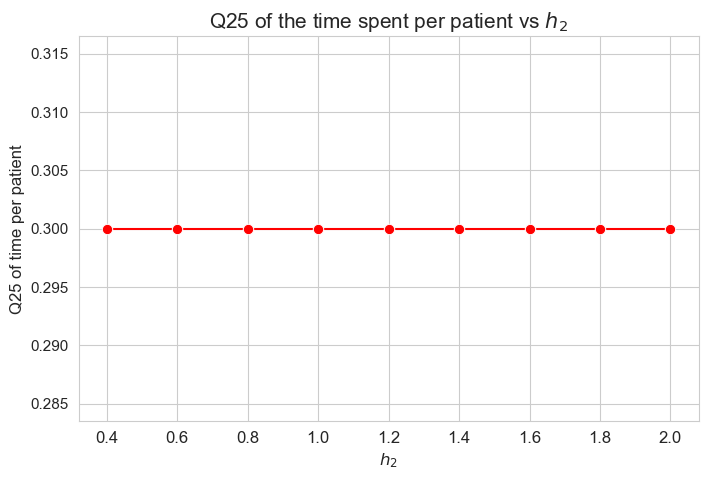

In [45]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h2']['Q25_time_per_patient'].values(), x=results2['h2']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q25 of the time spent per patient vs $h_2$', size=15)
ax.set_ylabel('Q25 of time per patient', size=12)
ax.set_xlabel('$h_2$', size=12)
plt.xticks(results2['h2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

$h_2$ doesn't affect to the $25$-quantile of the time spent per patient, given the set of values fixed initially for the rest of parameters.

- **Average time spent per patient vs $w$ vs $h_2$**

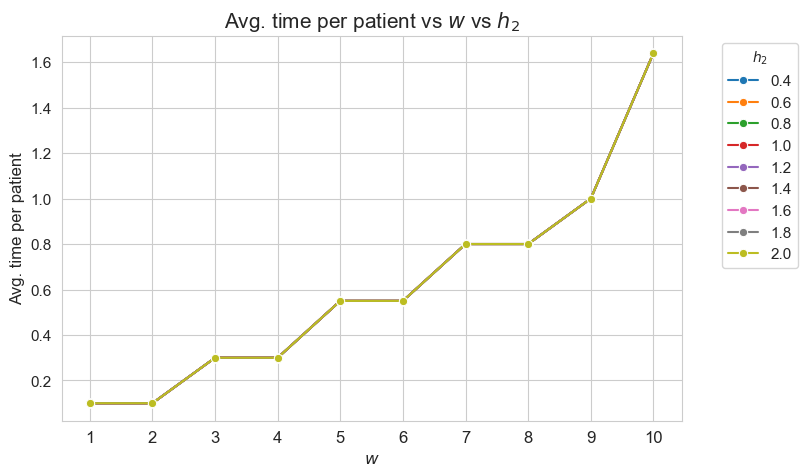

In [46]:
plt.figure(figsize=(8, 5))
for i, h2 in zip(results2['h2']['avg_time_patient_per_w'].keys(), results2['h2']['feasible']) :
    ax = sns.lineplot(y=results2['h2']['avg_time_patient_per_w'][i].values(), x=results2['h2']['avg_time_patient_per_w'][i].keys(), 
                      label=h2, marker='o', markersize=6)
plt.title('Avg. time per patient vs $w$ vs $h_2$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$w$', size=12)
plt.xticks(list(results2['h2']['avg_time_patient_per_w'][i].keys()), fontsize=12)
plt.yticks(fontsize=11)
plt.legend(title='$h_2$', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=11)
plt.show()

**Interpretation of the results:**

$h_2$ doesn't affect to the average time spent per patients depending on their severity $(w)$, since this quantity is the same regardless the value taken by $h_2$.

As final conclusion we can say that $h_2$ is not an important parameter, at least considering the values defined for the rest of parameters.  

#### **Analysis of $h_3$ parameter**



$h_3 :=$  minimum time time spent in each patient, taking into account their severity/importance (this quantity depends on $w_j$).


**Analysis of $h_3^{12}$ parameter**


$h_3^{12} :=$  minimum time time spent in patients with $w_j \in \lbrace 1, 2 \rbrace$

In [47]:
params['n'] = 50 ; params['p']=500 ; params['h1']=6 ; params['h2']=1 ; params['h4']=4
params['h3_1_2'] = None 
params['h3_3_4'] = 0.30 
params['h3_5_6'] = 0.55  
params['h3_7_8'] = 0.80 
params['h3_9_10'] = 1 

np.random.seed(123)
params['w'] = np.random.randint(1, 11, params['p']) 

parameter_list = np.arange(0, 0.50, 0.05)

In [48]:
results1 = get_results1('h3_1_2', parameter_list, params, model='linear')

In [49]:
results2 = get_results2('h3_1_2', parameter_list, results1)

- **Problem type (feasible - not feasible) vs $h_3^{12}$**

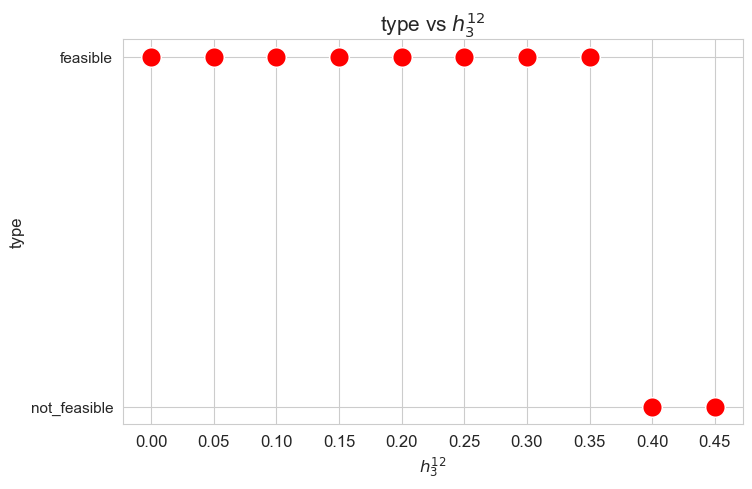

In [50]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(y=results2['h3_1_2']['type'], x=parameter_list, color='red', s=200)
plt.title('type vs $h_3^{12}$', size=15)
ax.set_ylabel('type', size=12)
ax.set_xlabel('$h_3^{12}$', size=12)
plt.xticks(parameter_list, fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

When the value of $h_3^{12}$, that is, the minimum time time spent in a patient with severity 1 or 2 $(w_j \in \lbrace 1,2\rbrace)$ in a given day,  is small enough (lower than 0.40), the problem is feasible, given the values set for the rest of the parameters. But, when this parameter is large enough (greater or equal to 0.40), the problems becomes infeasible.

These results can be interpreted as when the nurse-doctor tandems are forced to work too much on type 1-2 patients $(h_3^{12}\in \lbrace 0.40, 0.45 \rbrace )$, the good work conditions given by ,$h_1, h_2$ and $h_4$ constraints  cannot be fulfilled, and the problem becomes infeasible. Otherwise, when the nurse-doctor tandems don't have to work too much on this kind of patients $(h_3^{12}\in \lbrace 0, 0.05,\dots,0.35 \rbrace )$, the good working conditions are satisfy, and the problem is feasible.


Only feasible values of $h_3^{12}$8 will be taken into account in the next plots, since for the non feasible ones, any problem metric cannot be computed, since the problem itself cannot be solved.

- **Number of patients seen vs $h_3^{12}$**

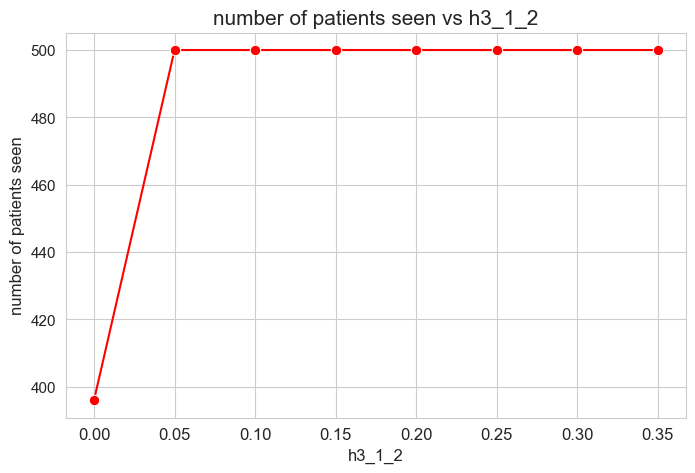

In [51]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_1_2']['num_patients_seen'].values(), x=results2['h3_1_2']['feasible'], 
                  marker='o', markersize=7.5, color='red')
plt.title('number of patients seen vs h3_1_2', size=15)
ax.set_ylabel('number of patients seen', size=12)
ax.set_xlabel('h3_1_2', size=12)
plt.xticks(results2['h3_1_2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The number of patients seen is not affected by $h_1^{12}$ parameter, as long as it is greater than zero $(h_1^{12} > 0).$

When $h_1^{12} > 0$, the number of patient seen is them maximum possible, that is, $p$, since whe have set $h_1^{12} > h_1^{12} > \dots > h_1^{12} > 0$, so, the constraints associated to this parameters are enforcing the number of patient seen to be maximum $(=p)$.

However, when $h_1^{12} = 0$, any constraint is enforcing the number of patient seen to be maximum, so the result is that it is different to $p=500$, approximately $400$, so, all the patients are not seen in this case.


- **Optimal value of the objective function vs $h_3^{12}$**

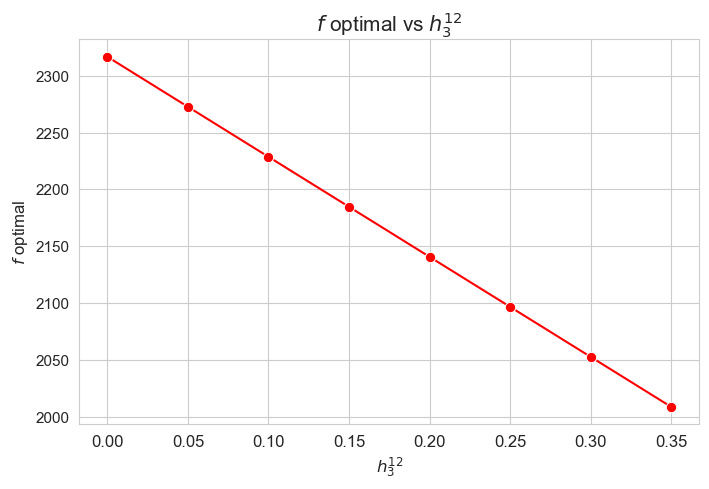

In [52]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_1_2']['f_optimal_feasible'].values(), x=results2['h3_1_2']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('$f$ optimal vs $h_3^{12}$', size=15)
ax.set_ylabel('$f$ optimal', size=12)
ax.set_xlabel('$h_3^{12}$', size=12)
plt.xticks(results2['h3_1_2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The greater $h_3^{12}$, the lower optimal value of the objective function. 

Considering that the values of $w$ are fixed since the beginning, and the objective function is defined as ${p} \sum_{i=1}^{n} \hspace{0.1cm} t_{ij} \cdot w_j$, the fact that the optimal value of the objective function decreases when $h_3^{12}$ increases means that the time spent in patients must decreases as well in some sense. This fact can be seen in the last plot of this section.

- **Average time spent per patient vs $h_3^{12}$**

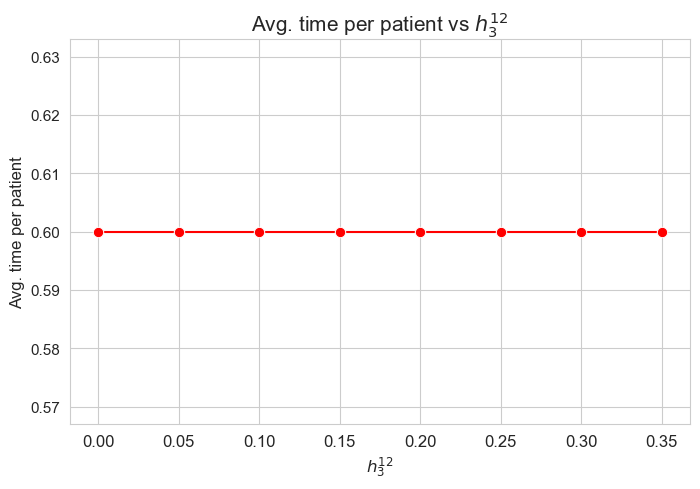

In [53]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_1_2']['avg_time_per_patient'].values(), x=results2['h3_1_2']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Avg. time per patient vs $h_3^{12}$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$h_3^{12}$', size=12)
plt.xticks(results2['h3_1_2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The average time spent per patient is not affected by $h_3^{12}$ parameter, since it is the same regardless the $h_3^{12}$ values.

- **Median time spent per patient vs $h_3^{12}$**

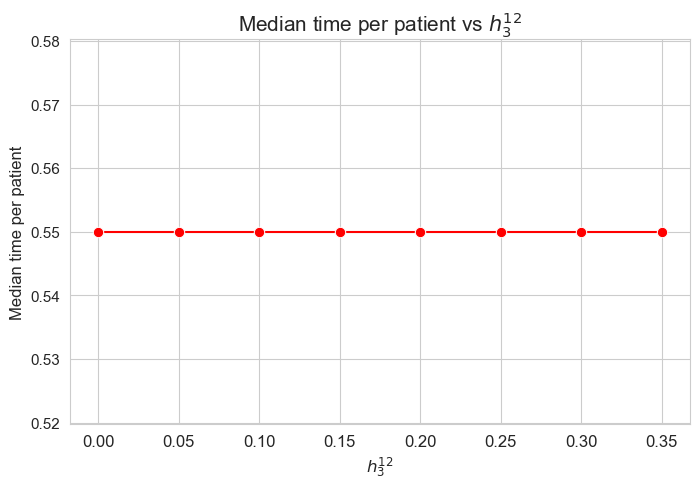

In [54]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_1_2']['median_time_per_patient'].values(), x=results2['h3_1_2']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Median time per patient vs $h_3^{12}$', size=15)
ax.set_ylabel('Median time per patient', size=12)
ax.set_xlabel('$h_3^{12}$', size=12)
plt.xticks(results2['h3_1_2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The median of the time spent per patient is not affected by $h_3^{12}$ parameter, since it is the same regardless the $h_3^{12}$ values.

- **$75$-quantile time spent per patient vs $h_3^{12}$**

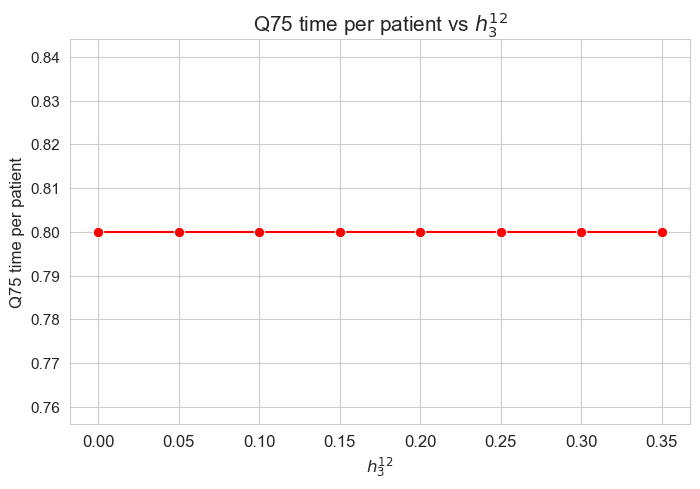

In [55]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_1_2']['Q75_time_per_patient'].values(), x=results2['h3_1_2']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q75 time per patient vs $h_3^{12}$', size=15)
ax.set_ylabel('Q75 time per patient', size=12)
ax.set_xlabel('$h_3^{12}$', size=12)
plt.xticks(results2['h3_1_2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The $75$-quantile of the time spent per patient is not affected by $h_3^{12}$ parameter, since it is the same regardless the $h_3^{12}$ values.

- **$25$-quantile time spent per patient vs $h_3^{12}$**

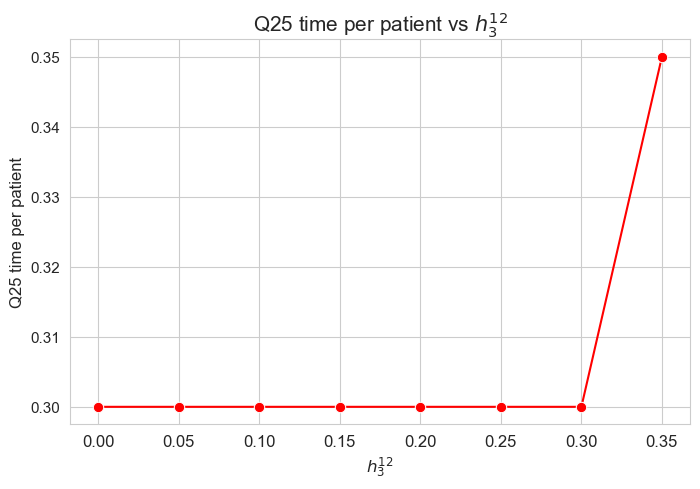

In [56]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_1_2']['Q25_time_per_patient'].values(), x=results2['h3_1_2']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q25 time per patient vs $h_3^{12}$', size=15)
ax.set_ylabel('Q25 time per patient', size=12)
ax.set_xlabel('$h_3^{12}$', size=12)
plt.xticks(results2['h3_1_2']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

The $25$-quantile of the time spent per patient is not affected by $h_3^{12}$ when it is lower or equal to $0.30$. 

We can see that for $h_3^{12}=0.35$, the $25$-quantile is $0.35$, and when $h_3^{12}\in \lbrace 0, 0.05, \dots, 0.30 \rbrace$ it becomes $0.30$.

So, the behavior seems to be the following:

When $h_3^{12} \geq 0.30$ the $25$-quantile is $h_3^{12}$. but, when $h_3^{12} < 0.30$, it is $0.30$.

It's important to notice that $h_3^{34}=0.30$.

- **Average time spent per patient vs $w$ vs $h_3^{12}$**

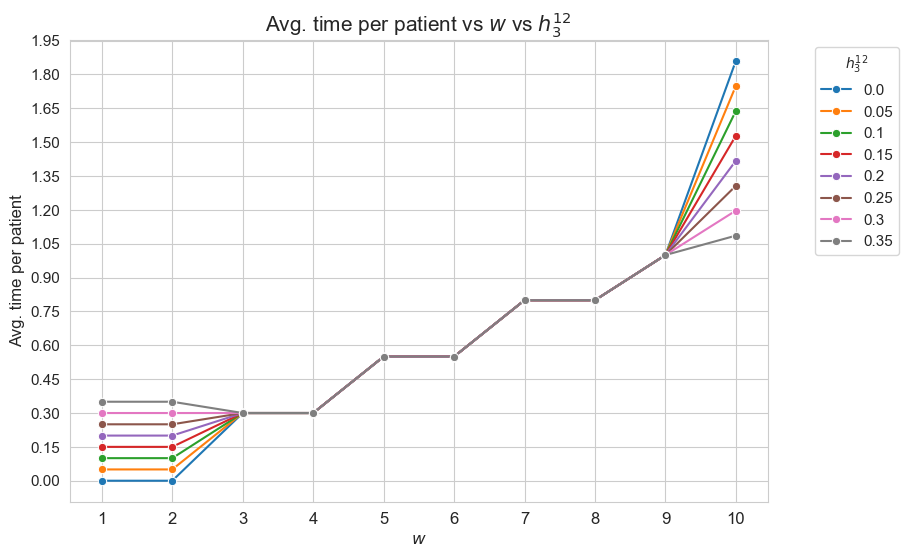

In [57]:
plt.figure(figsize=(9, 6))
for i, h3_1_2 in zip(results2['h3_1_2']['avg_time_patient_per_w'].keys(), results2['h3_1_2']['feasible']) :
    ax = sns.lineplot(y=results2['h3_1_2']['avg_time_patient_per_w'][i].values(), x=results2['h3_1_2']['avg_time_patient_per_w'][i].keys(), 
                      label=round(h3_1_2,2), marker='o', markersize=6)
plt.title('Avg. time per patient vs $w$ vs $h_3^{12}$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$w$', size=12)
plt.xticks(list(results2['h3_1_2']['avg_time_patient_per_w'][i].keys()), fontsize=12)
plt.yticks(np.arange(0,2, 0.15), fontsize=11)
plt.legend(title='$h_3^{12}$', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=11)
plt.show()

**Interpretation of the results:**

This plot shows the average time spent per patient depending on both $w$ and $h_3^{12}$.

First of all, we can observe that for patients with severity between 3 and 9 $(w_j \in [3,9]\subset \mathbf{Z})$ don't have differences en the average time spent generated by $h_3^{12}$ parameter. In other words the average time spent on patients with $w_j \in  \in [3,9]\subset \mathbf{Z}$ is independent of $h_3^{12}$, although we can see different average times between this groups, according with their differences in severity. In particular, the more severity, the more average time spent in them, what makes much sense. But is important to notice that the time spent in this patients is the minimum established by the problem constraints, and not more.

On the other hand, we can observe differences in terms of $h_3^{12}$ for type 1,2 and 10 patients.

Concretely, the average time spent on type 1-2 patients with $(w_j in \lbrace 1,2 \rbrace)$ is different depending on $h_3^{12}$ value. When $h_3^{12}=0$, that is, when the nurse-doctor tandems are not forced to spent time in type 1-2 patients, they actually don't spend time on them. And, $h_3^{12}$ increases, the time spent in this kind of patient increase, being this just the same of $h_3^{12}$, so, this patients are seen the minimum fixed by the problem constraint, and not more.

In addition, the average time spent on type 10 patients $(w_j=10)$, the most severe ones, is also affected by $h_3^{12}$.
The result that we find at this point has a beauty interpretation. As we have seen the basic interpretation is that the nurse-doctor tandems spent the minimum possible time in each type of patients so that to fulfilled the $h_3$ constraints, but they do them not for all the patients types, but for type from 1 to 9, but they don't behave in the same way with type 10 patients, that are the most important. 
Therefore, there is an extra time that nurse-doctors can spent in type 10-patients, in order to spend more time in this kind of patient that the minimum one established by $h_3^{910}$ constraint, that is $1$.
And what we can see is that, indeed, the nurse-doctor tandems invest this extra time in type-10 patients. But this extra time is different depending on $h_1^{12}$. The lower $h_3^{12}$, the more extra time. So, as result, the lower $h_3^{12}$, the more time spent in type-10 patients, as we can see in the plot.


**Analysis of $h_3^{34}$ parameter**


$h_3^{34} :=$  minimum time time spent in patients with $w_j \in \lbrace 3, 4 \rbrace$

In [58]:
params['n'] = 50 ; params['p']=500 ; params['h1']=6 ; params['h2']=1 ; params['h4']=4
params['h3_1_2'] = 0.10 
params['h3_3_4'] = None
params['h3_5_6'] = 0.55  
params['h3_7_8'] = 0.80 
params['h3_9_10'] = 1 

np.random.seed(123)
params['w'] = np.random.randint(1, 11, params['p']) 

parameter_list = np.arange(0, 0.8, 0.1)

In [59]:
results1 = get_results1('h3_3_4', parameter_list, params, model='linear')

In [60]:
results2 = get_results2('h3_3_4', parameter_list, results1)

- **Problem type (feasible - not feasible) vs $h_3^{34}$**

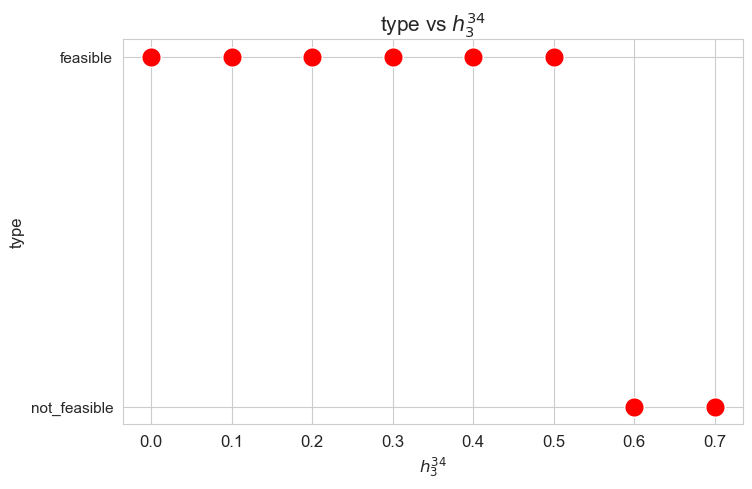

In [61]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(y=results2['h3_3_4']['type'], x=parameter_list, color='red', s=200)
plt.title('type vs $h_3^{34}$', size=15)
ax.set_ylabel('type', size=12)
ax.set_xlabel('$h_3^{34}$', size=12)
plt.xticks(parameter_list, fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **Number of patients seen vs $h_3^{34}$**

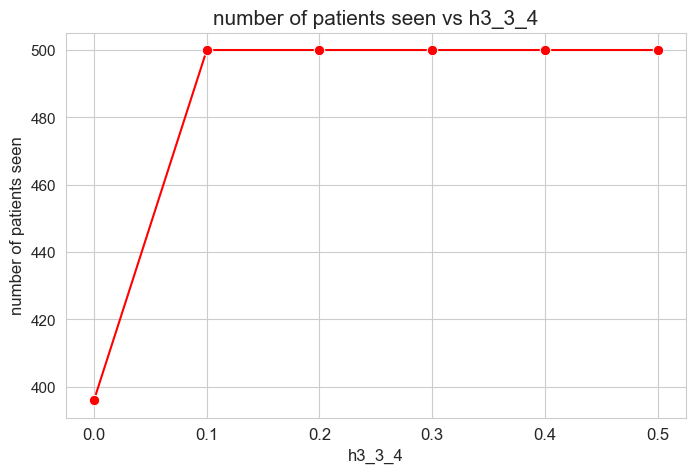

In [62]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_3_4']['num_patients_seen'].values(), x=results2['h3_3_4']['feasible'], 
                  marker='o', markersize=7.5, color='red')
plt.title('number of patients seen vs h3_3_4', size=15)
ax.set_ylabel('number of patients seen', size=12)
ax.set_xlabel('h3_3_4', size=12)
plt.xticks(results2['h3_3_4']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **Optimal value of the objective function vs $h_3^{34}$**

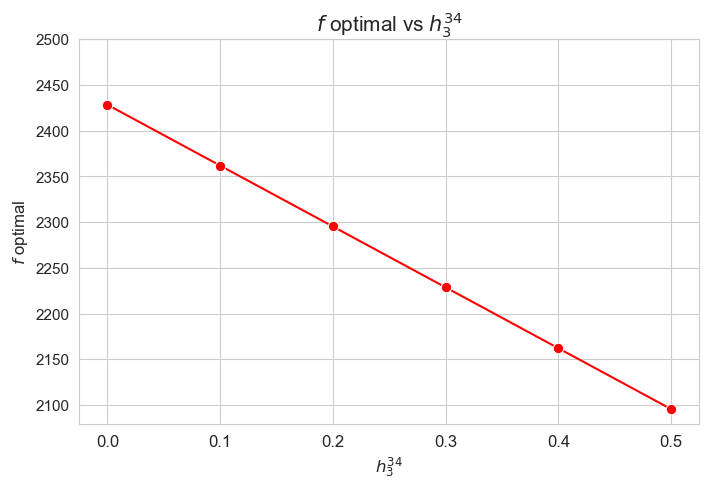

In [63]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_3_4']['f_optimal_feasible'].values(), x=results2['h3_3_4']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('$f$ optimal vs $h_3^{34}$', size=15)
ax.set_ylabel('$f$ optimal', size=12)
ax.set_xlabel('$h_3^{34}$', size=12)
plt.xticks(results2['h3_3_4']['feasible'], fontsize=12)
plt.yticks(np.arange(2100, 2550, 50), fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **Average time spent per patient vs $h_3^{34}$**

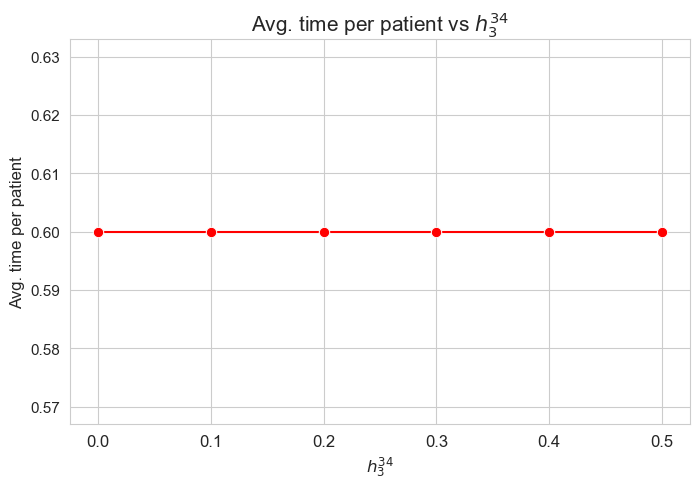

In [64]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_3_4']['avg_time_per_patient'].values(), x=results2['h3_3_4']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Avg. time per patient vs $h_3^{34}$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$h_3^{34}$', size=12)
plt.xticks(results2['h3_3_4']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **Median time spent per patient vs $h_3^{34}$**

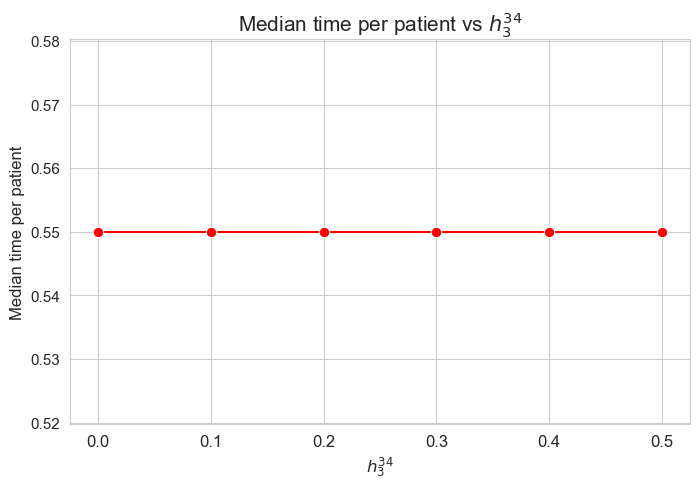

In [65]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_3_4']['median_time_per_patient'].values(), x=results2['h3_3_4']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Median time per patient vs $h_3^{34}$', size=15)
ax.set_ylabel('Median time per patient', size=12)
ax.set_xlabel('$h_3^{34}$', size=12)
plt.xticks(results2['h3_3_4']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **$75$-quantile time spent per patient vs $h_3^{34}$**

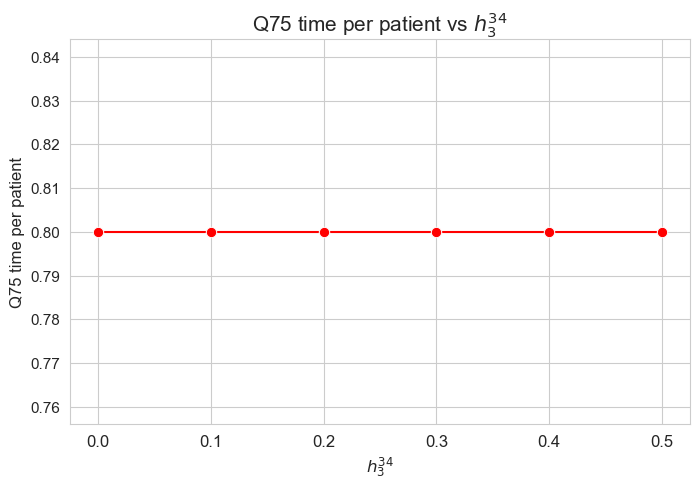

In [66]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_3_4']['Q75_time_per_patient'].values(), x=results2['h3_3_4']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q75 time per patient vs $h_3^{34}$', size=15)
ax.set_ylabel('Q75 time per patient', size=12)
ax.set_xlabel('$h_3^{34}$', size=12)
plt.xticks(results2['h3_3_4']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **$25$-quantile time spent per patient vs $h_3^{34}$**

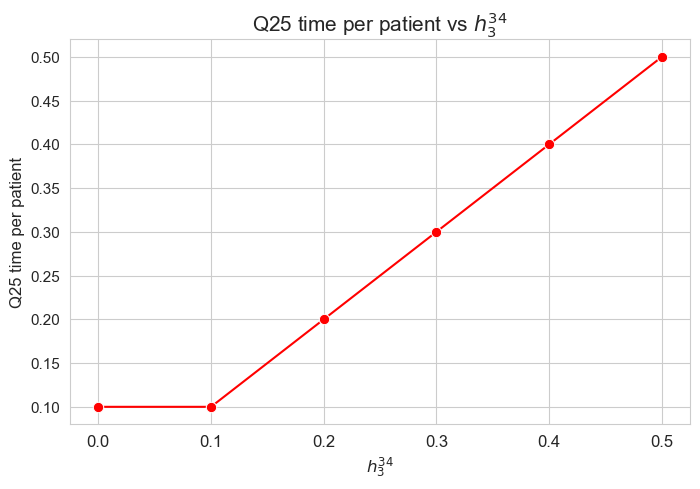

In [67]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_3_4']['Q25_time_per_patient'].values(), x=results2['h3_3_4']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q25 time per patient vs $h_3^{34}$', size=15)
ax.set_ylabel('Q25 time per patient', size=12)
ax.set_xlabel('$h_3^{34}$', size=12)
plt.xticks(results2['h3_3_4']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

When $h_3^{34} > 0$, the $25$-quantile seems to be just $h_3^{34}$. So, this parameter seems to define what the $25$-quantile of the time spent per patient will be, in those cases.

- **Average time spent per patient vs $w$ vs $h_3^{34}$**

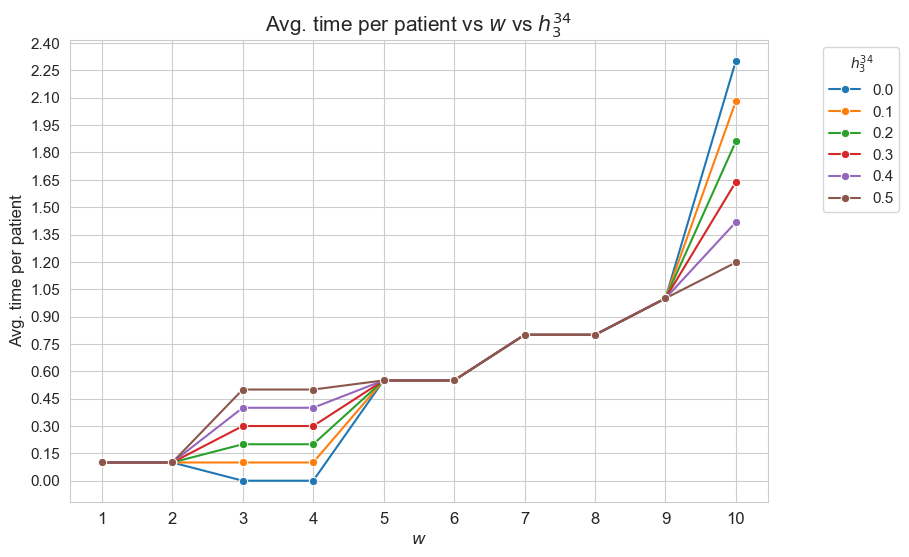

In [68]:
plt.figure(figsize=(9, 6))
for i, h3_3_4 in zip(results2['h3_3_4']['avg_time_patient_per_w'].keys(), results2['h3_3_4']['feasible']) :
    ax = sns.lineplot(y=results2['h3_3_4']['avg_time_patient_per_w'][i].values(), x=results2['h3_3_4']['avg_time_patient_per_w'][i].keys(), 
                      label=round(h3_3_4, 2), marker='o', markersize=6)
plt.title('Avg. time per patient vs $w$ vs $h_3^{34}$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$w$', size=12)
plt.xticks(list(results2['h3_3_4']['avg_time_patient_per_w'][i].keys()), fontsize=12)
plt.yticks(np.arange(0, 2.45, 0.15), fontsize=11)
plt.legend(title='$h_3^{34}$', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation to the one made for $h_3^{12}$ parameter, but adapting the conclusions to $h_3^{34}$, of course.

**Analysis of $h_3^{56}$ parameter**


$h_3^{56} :=$  minimum time time spent in patients with $w_j \in \lbrace 5, 6 \rbrace$

In [69]:
params['n'] = 50 ; params['p']=500 ; params['h1']=6 ; params['h2']=1 ; params['h4']=4
params['h3_1_2'] = 0.10 
params['h3_3_4'] = 0.30
params['h3_5_6'] = None  
params['h3_7_8'] = 0.80 
params['h3_9_10'] = 1 

np.random.seed(123)
params['w'] = np.random.randint(1, 11, params['p']) 

parameter_list = np.arange(0, 1.1, 0.1)

In [70]:
results1 = get_results1('h3_5_6', parameter_list, params, model='linear')

In [71]:
results2 = get_results2('h3_5_6', parameter_list, results1)

- **Problem type (feasible - not feasible) vs $h_3^{56}$**

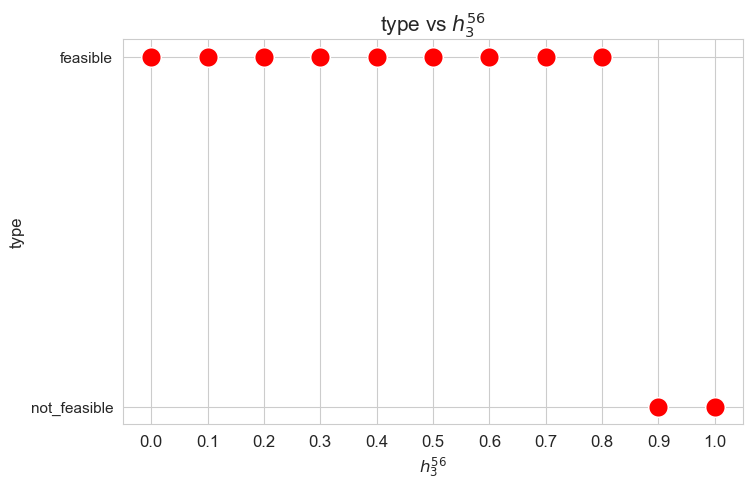

In [72]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(y=results2['h3_5_6']['type'], x=parameter_list, color='red', s=200)
plt.title('type vs $h_3^{56}$', size=15)
ax.set_ylabel('type', size=12)
ax.set_xlabel('$h_3^{56}$', size=12)
plt.xticks(parameter_list, fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **Number of patients seen vs $h_3^{56}$**

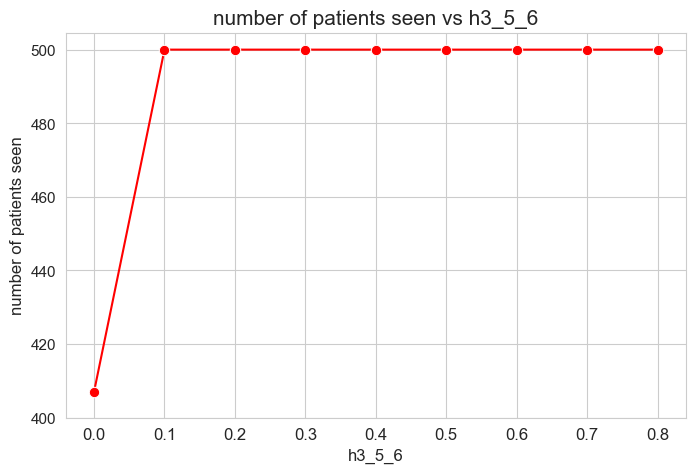

In [73]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_5_6']['num_patients_seen'].values(), x=results2['h3_5_6']['feasible'], 
                  marker='o', markersize=7.5, color='red')
plt.title('number of patients seen vs h3_5_6', size=15)
ax.set_ylabel('number of patients seen', size=12)
ax.set_xlabel('h3_5_6', size=12)
plt.xticks(results2['h3_5_6']['feasible'], fontsize=12)
plt.yticks(np.arange(400, 520, 20), fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **Optimal value of the objective function vs $h_3^{56}$**

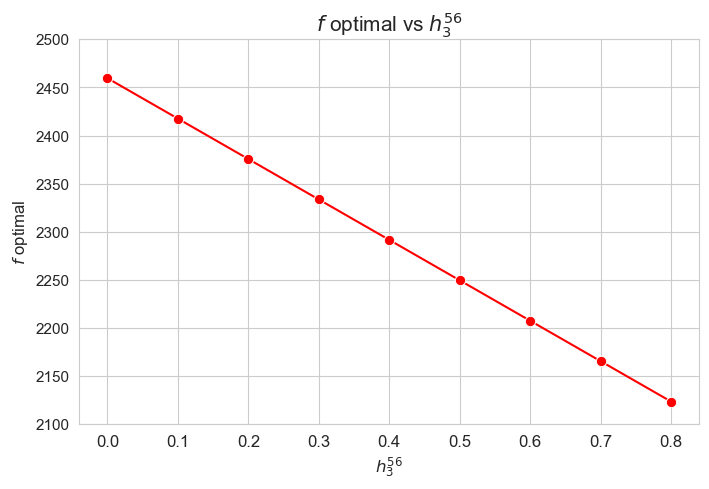

In [74]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_5_6']['f_optimal_feasible'].values(), x=results2['h3_5_6']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('$f$ optimal vs $h_3^{56}$', size=15)
ax.set_ylabel('$f$ optimal', size=12)
ax.set_xlabel('$h_3^{56}$', size=12)
plt.xticks(results2['h3_5_6']['feasible'], fontsize=12)
plt.yticks(np.arange(2100, 2550, 50), fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation to the one made for $h_3^{12}$ parameter.

- **Average time spent per patient vs $h_3^{56}$**

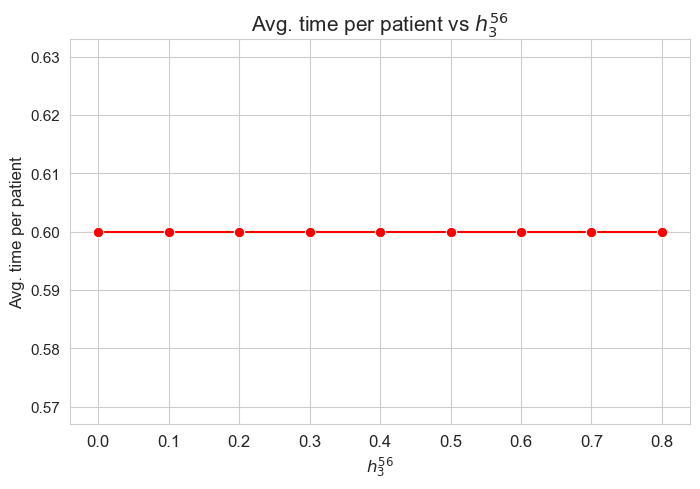

In [75]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_5_6']['avg_time_per_patient'].values(), x=results2['h3_5_6']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Avg. time per patient vs $h_3^{56}$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$h_3^{56}$', size=12)
plt.xticks(results2['h3_5_6']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation to the one made for $h_3^{12}$ parameter.

- **Median time spent per patient vs $h_3^{56}$**

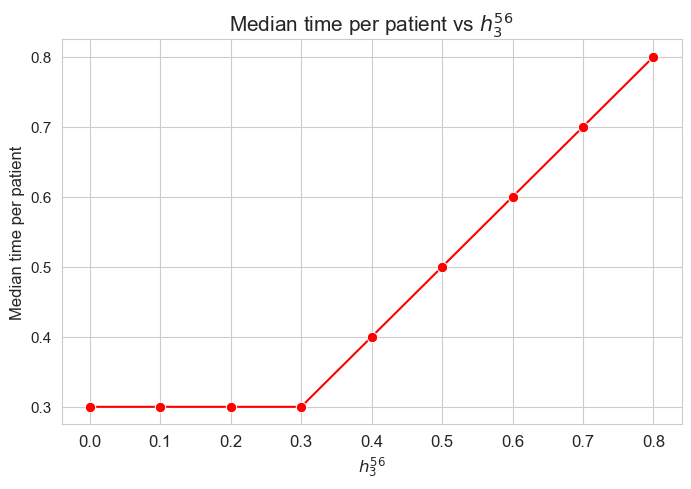

In [76]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_5_6']['median_time_per_patient'].values(), x=results2['h3_5_6']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Median time per patient vs $h_3^{56}$', size=15)
ax.set_ylabel('Median time per patient', size=12)
ax.set_xlabel('$h_3^{56}$', size=12)
plt.xticks(results2['h3_5_6']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

When $h_3^{56} \geq 0.3$, the median seems to be just $h_3^{56}$. So, this parameter seems to define what the median of the time spent per patient will be, in those cases.
But, when $h_3^{56}< 0.3$, the median is just $0.3$.

- **$75$-quantile time spent per patient vs $h_3^{56}$**

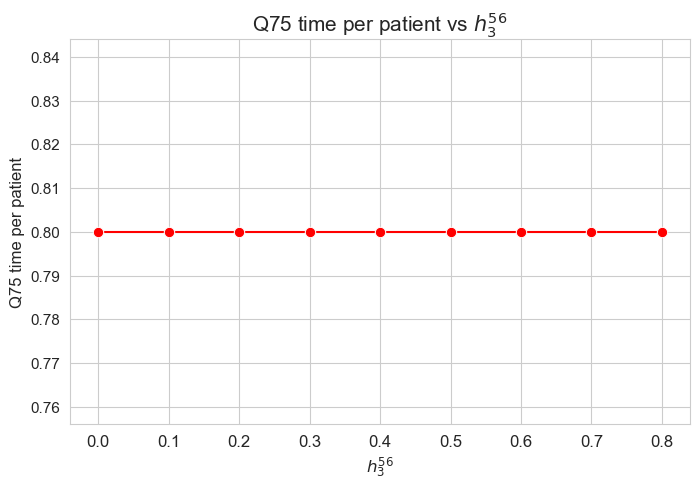

In [77]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_5_6']['Q75_time_per_patient'].values(), x=results2['h3_5_6']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q75 time per patient vs $h_3^{56}$', size=15)
ax.set_ylabel('Q75 time per patient', size=12)
ax.set_xlabel('$h_3^{56}$', size=12)
plt.xticks(results2['h3_5_6']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **$25$-quantile time spent per patient vs $h_3^{34}$**

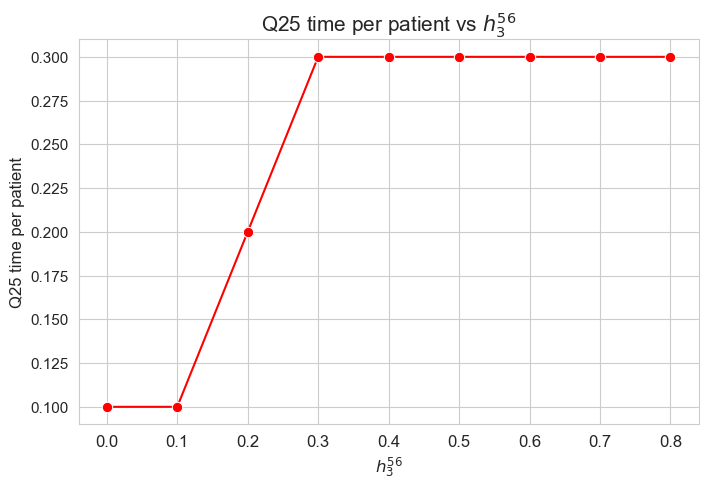

In [78]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_5_6']['Q25_time_per_patient'].values(), x=results2['h3_5_6']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q25 time per patient vs $h_3^{56}$', size=15)
ax.set_ylabel('Q25 time per patient', size=12)
ax.set_xlabel('$h_3^{56}$', size=12)
plt.xticks(results2['h3_5_6']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

When $h_3^{56} \in \lbrace 0.1, 0.2, 0.3\rbrace$, the $25$-quantile seems to be just $h_3^{56}$, but when $h_3^{56} > 0.3$ the $25$-quantile is $0.3$, and when $h_3^{56}< 0.1$, it is $0.1$. 

It's important to notice that $h_3^{12}=0.1$ and $h_3^{23} = 0.3$.

- **Average time spent per patient vs $w$ vs $h_3^{56}$**

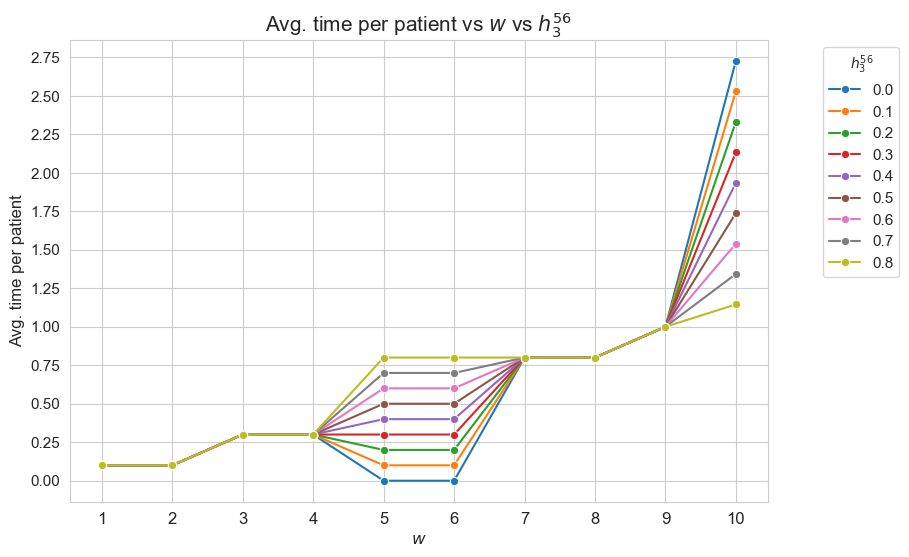

In [79]:
plt.figure(figsize=(9, 6))
for i, h3_5_6 in zip(results2['h3_5_6']['avg_time_patient_per_w'].keys(), results2['h3_5_6']['feasible']) :
    ax = sns.lineplot(y=results2['h3_5_6']['avg_time_patient_per_w'][i].values(), x=results2['h3_5_6']['avg_time_patient_per_w'][i].keys(), 
                      label=round(h3_5_6, 2), marker='o', markersize=6)
plt.title('Avg. time per patient vs $w$ vs $h_3^{56}$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$w$', size=12)
plt.xticks(list(results2['h3_5_6']['avg_time_patient_per_w'][i].keys()), fontsize=12)
plt.yticks(np.arange(0,3, 0.25), fontsize=11)
plt.legend(title='$h_3^{56}$', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation to the one made for $h_3^{12}$ parameter, but adapting the conclusions to $h_3^{56}$, of course.

**Analysis of $h_3^{78}$ parameter**


$h_3^{78} :=$  minimum time time spent in patients with $w_j \in \lbrace 7, 8 \rbrace$

In [80]:
params['n'] = 50 ; params['p']=500 ; params['h1']=6 ; params['h2']=1 ; params['h4']=4
params['h3_1_2'] = 0.10 
params['h3_3_4'] = 0.30
params['h3_5_6'] = 0.55  
params['h3_7_8'] = None 
params['h3_9_10'] = 1 

np.random.seed(123)
params['w'] = np.random.randint(1, 11, params['p']) 

parameter_list = np.arange(0, 1.3, 0.1)

In [81]:
results1 = get_results1('h3_7_8', parameter_list, params, model='linear')

In [82]:
results2 = get_results2('h3_7_8', parameter_list, results1)

- **Problem type (feasible - not feasible) vs $h_3^{78}$**

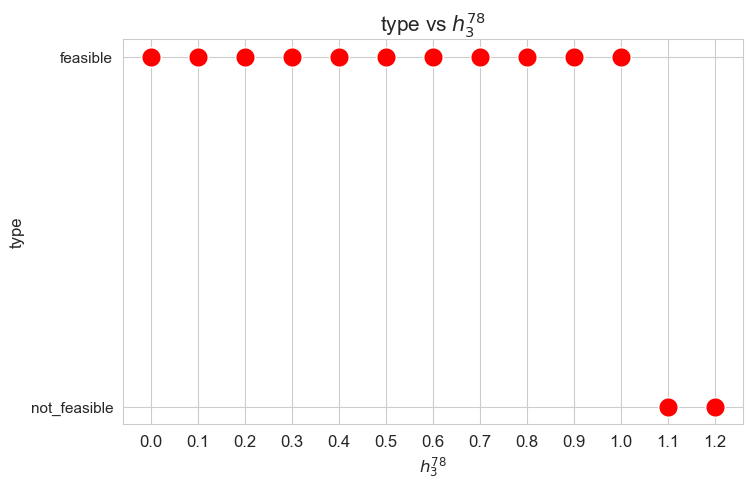

In [83]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(y=results2['h3_7_8']['type'], x=parameter_list, color='red', s=200)
plt.title('type vs $h_3^{78}$', size=15)
ax.set_ylabel('type', size=12)
ax.set_xlabel('$h_3^{78}$', size=12)
plt.xticks(parameter_list, fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **Number of patients seen vs $h_3^{78}$**

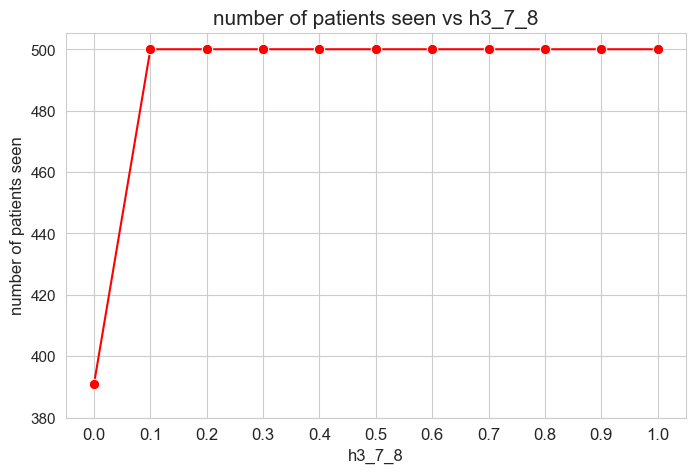

In [84]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_7_8']['num_patients_seen'].values(), x=results2['h3_7_8']['feasible'], 
                  marker='o', markersize=7.5, color='red')
plt.title('number of patients seen vs h3_7_8', size=15)
ax.set_ylabel('number of patients seen', size=12)
ax.set_xlabel('h3_7_8', size=12)
plt.xticks(results2['h3_7_8']['feasible'], fontsize=12)
plt.yticks(np.arange(380, 520, 20), fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **Optimal value of the objective function vs $h_3^{78}$**

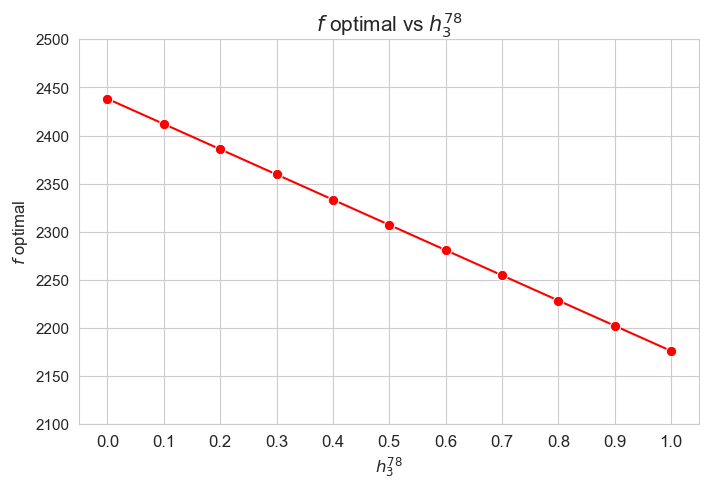

In [85]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_7_8']['f_optimal_feasible'].values(), x=results2['h3_7_8']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('$f$ optimal vs $h_3^{78}$', size=15)
ax.set_ylabel('$f$ optimal', size=12)
ax.set_xlabel('$h_3^{78}$', size=12)
plt.xticks(results2['h3_7_8']['feasible'], fontsize=12)
plt.yticks(np.arange(2100, 2550, 50), fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation to the one made for $h_3^{12}$ parameter.

- **Average time spent per patient vs $h_3^{78}$**

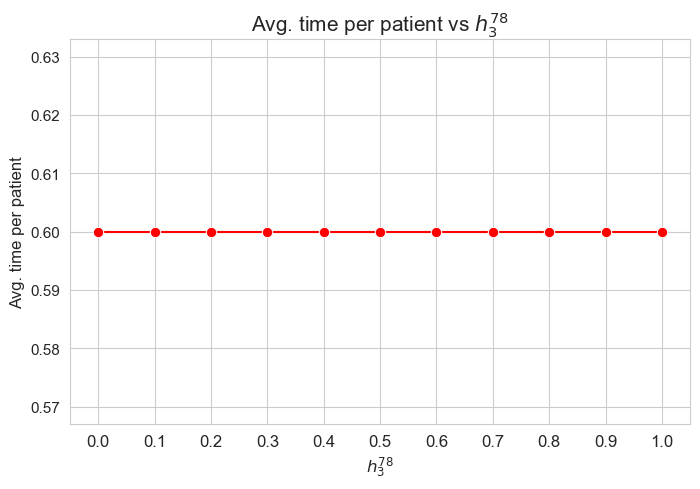

In [86]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_7_8']['avg_time_per_patient'].values(), x=results2['h3_7_8']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Avg. time per patient vs $h_3^{78}$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$h_3^{78}$', size=12)
plt.xticks(results2['h3_7_8']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation to the one made for $h_3^{12}$ parameter.

- **Median time spent per patient vs $h_3^{78}$**

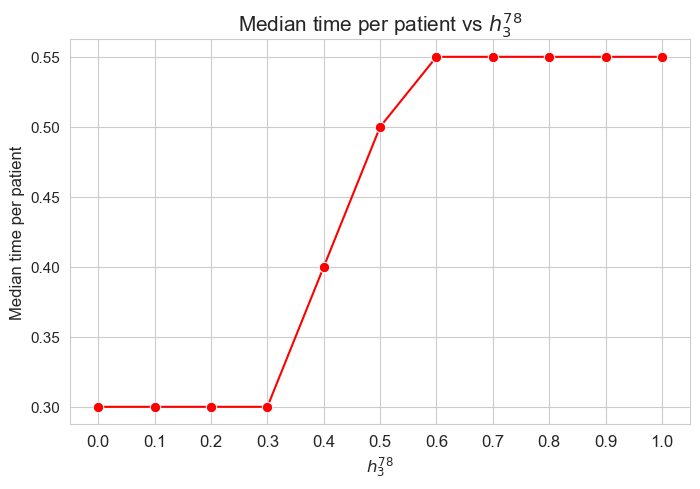

In [87]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_7_8']['median_time_per_patient'].values(), x=results2['h3_7_8']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Median time per patient vs $h_3^{78}$', size=15)
ax.set_ylabel('Median time per patient', size=12)
ax.set_xlabel('$h_3^{78}$', size=12)
plt.xticks(results2['h3_7_8']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

When $h_3^{78} \in \lbrace 0.3, 0.4, 0.5\rbrace$, the median seems to be just $h_3^{78}$. 
But, when $h_3^{78}< 0.3$, the median is just $0.3$. And, it seems that when $h_3^{78}\geq 0.55$, the median is $0.55$.

- **$75$-quantile time spent per patient vs $h_3^{78}$**

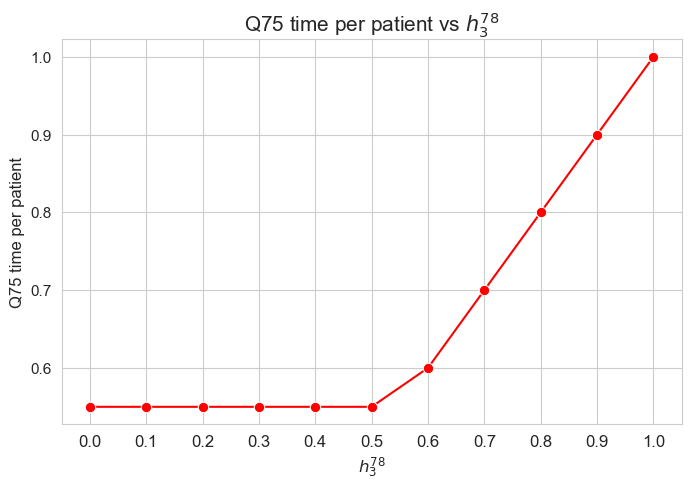

In [88]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_7_8']['Q75_time_per_patient'].values(), x=results2['h3_7_8']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q75 time per patient vs $h_3^{78}$', size=15)
ax.set_ylabel('Q75 time per patient', size=12)
ax.set_xlabel('$h_3^{78}$', size=12)
plt.xticks(results2['h3_7_8']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

it seems that, when $h_3^{78} \geq 0.6\rbrace$, the median seems to be just $h_3^{78}$. 
But, it seems that, when $h_3^{78}< 0.55$, the median is just $0.55$. 

It's important to notice that $h_3^{56} = 0.55$. 

- **$25$-quantile time spent per patient vs $h_3^{78}$**

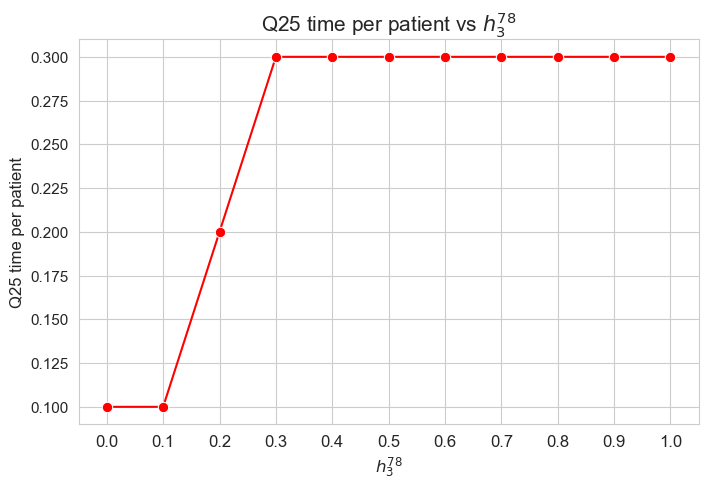

In [89]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_7_8']['Q25_time_per_patient'].values(), x=results2['h3_7_8']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q25 time per patient vs $h_3^{78}$', size=15)
ax.set_ylabel('Q25 time per patient', size=12)
ax.set_xlabel('$h_3^{78}$', size=12)
plt.xticks(results2['h3_7_8']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

When $h_3^{78} \in \lbrace 0.1, 0.2, 0.3\rbrace$, the $25$-quantile seems to be just $h_3^{78}$, but when $h_3^{78} > 0.3$ the $25$-quantile is $0.3$, and when $h_3^{56}< 0.1$, it is $0.1$. 

It's important to notice that $h_3^{12}=0.1$ and $h_3^{23} = 0.3$.

- **Average time spent per patient vs $w$ vs $h_3^{78}$**

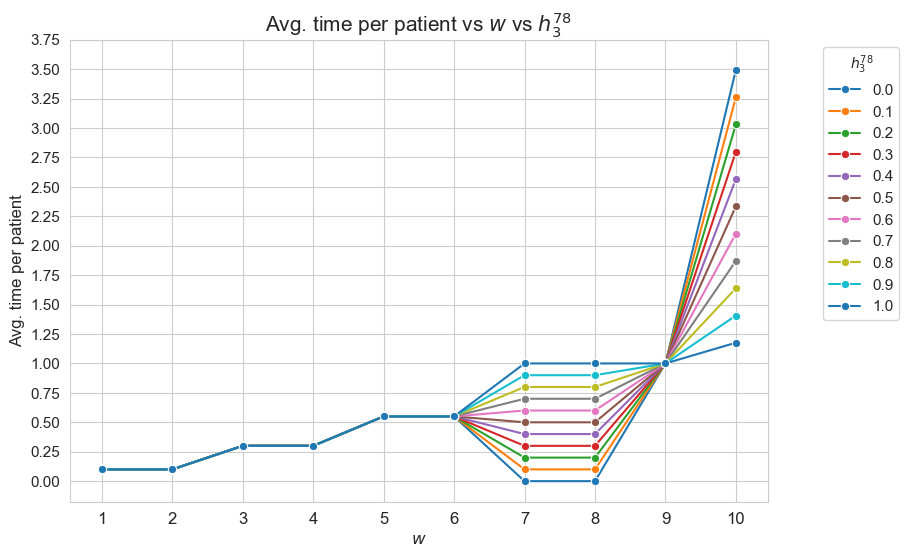

In [90]:
plt.figure(figsize=(9, 6))
for i, h3_7_8 in zip(results2['h3_7_8']['avg_time_patient_per_w'].keys(), results2['h3_7_8']['feasible']) :
    ax = sns.lineplot(y=results2['h3_7_8']['avg_time_patient_per_w'][i].values(), x=results2['h3_7_8']['avg_time_patient_per_w'][i].keys(), 
                      label=round(h3_7_8, 2), marker='o', markersize=6)
plt.title('Avg. time per patient vs $w$ vs $h_3^{78}$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$w$', size=12)
plt.xticks(list(results2['h3_7_8']['avg_time_patient_per_w'][i].keys()), fontsize=12)
plt.yticks(np.arange(0,4, 0.25), fontsize=11)
plt.legend(title='$h_3^{78}$', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation to the one made for $h_3^{12}$ parameter, but adapting the conclusions to $h_3^{78}$, of course.

**Analysis of $h_3^{910}$ parameter**


$h_3^{910} :=$  minimum time time spent in patients with $w_j \in \lbrace 9, 10 \rbrace$

In [91]:
params['n'] = 50 ; params['p']=500 ; params['h1']=6 ; params['h2']=1 ; params['h4']=4
params['h3_1_2'] = 0.10 
params['h3_3_4'] = 0.30
params['h3_5_6'] = 0.55  
params['h3_7_8'] = 0.80 
params['h3_9_10'] = None 

np.random.seed(123)
params['w'] = np.random.randint(1, 11, params['p']) 

parameter_list = np.arange(0, 1.6, 0.1)

In [92]:
results1 = get_results1('h3_9_10', parameter_list, params, model='linear')

In [93]:
results2 = get_results2('h3_9_10', parameter_list, results1)

- **Problem type (feasible - not feasible) vs $h_3^{910}$**

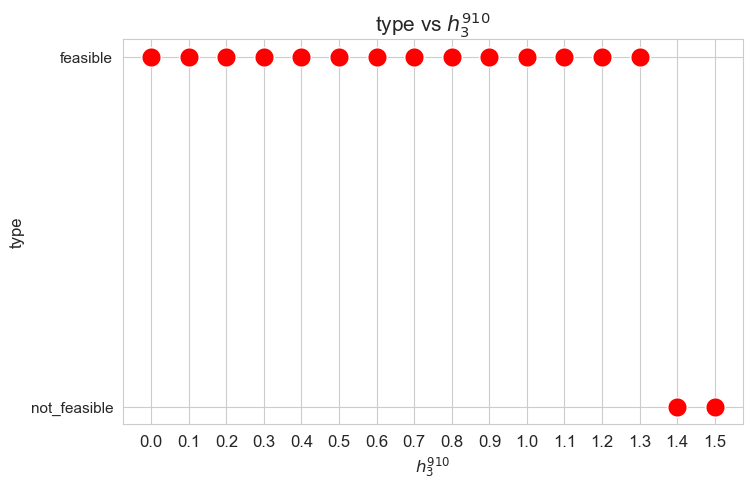

In [94]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(y=results2['h3_9_10']['type'], x=parameter_list, color='red', s=200)
plt.title('type vs $h_3^{910}$', size=15)
ax.set_ylabel('type', size=12)
ax.set_xlabel('$h_3^{910}$', size=12)
plt.xticks(parameter_list, fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **Number of patients seen vs $h_3^{910}$**

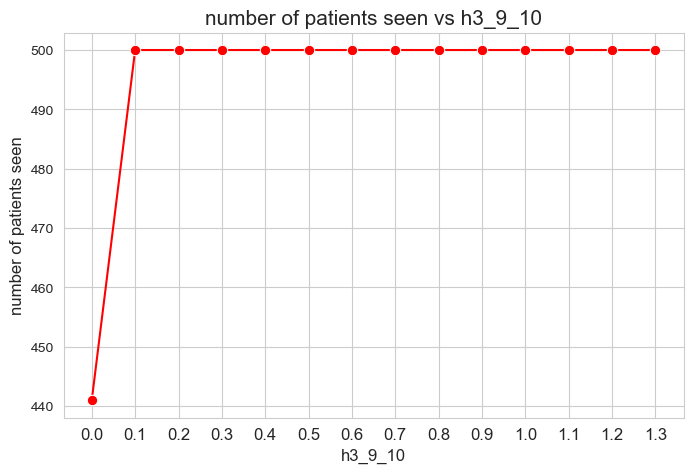

In [95]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_9_10']['num_patients_seen'].values(), x=results2['h3_9_10']['feasible'], 
                  marker='o', markersize=7.5, color='red')
plt.title('number of patients seen vs h3_9_10', size=15)
ax.set_ylabel('number of patients seen', size=12)
ax.set_xlabel('h3_9_10', size=12)
plt.xticks(results2['h3_9_10']['feasible'], fontsize=12)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **Optimal value of the objective function vs $h_3^{910}$**

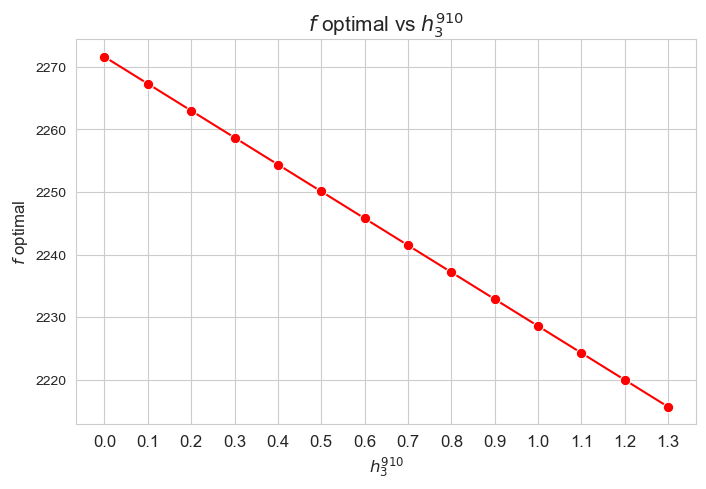

In [96]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_9_10']['f_optimal_feasible'].values(), x=results2['h3_9_10']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('$f$ optimal vs $h_3^{910}$', size=15)
ax.set_ylabel('$f$ optimal', size=12)
ax.set_xlabel('$h_3^{910}$', size=12)
plt.xticks(results2['h3_9_10']['feasible'], fontsize=12)
# plt.yticks(np.arange(2100, 2550, 50), fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation to the one made for $h_3^{12}$ parameter.

- **Average time spent per patient vs $h_3^{910}$**

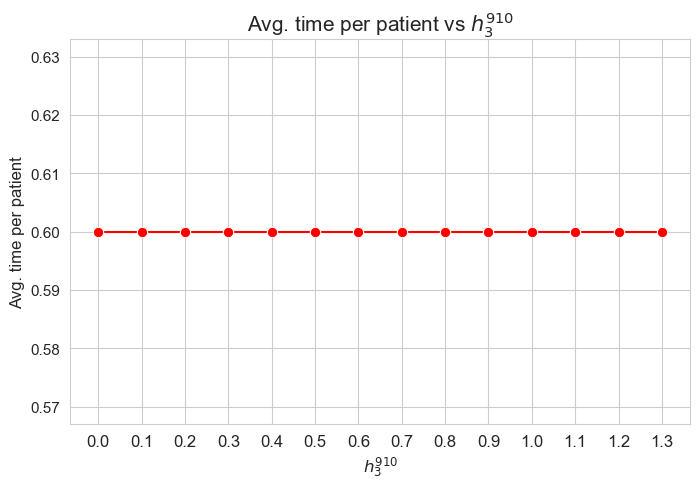

In [97]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_9_10']['avg_time_per_patient'].values(), x=results2['h3_9_10']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Avg. time per patient vs $h_3^{910}$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$h_3^{910}$', size=12)
plt.xticks(results2['h3_9_10']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation to the one made for $h_3^{12}$ parameter.

- **Median time spent per patient vs $h_3^{910}$**

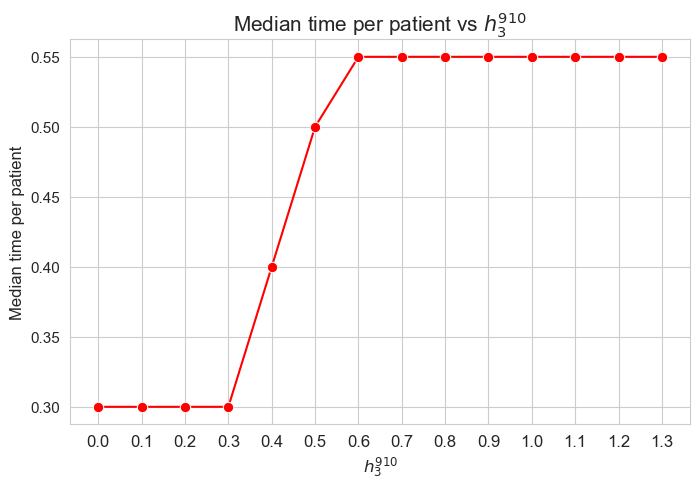

In [98]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_9_10']['median_time_per_patient'].values(), x=results2['h3_9_10']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Median time per patient vs $h_3^{910}$', size=15)
ax.set_ylabel('Median time per patient', size=12)
ax.set_xlabel('$h_3^{910}$', size=12)
plt.xticks(results2['h3_9_10']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation to the one made for $h_3^{78}$ parameter.

- **$75$-quantile time spent per patient vs $h_3^{910}$**

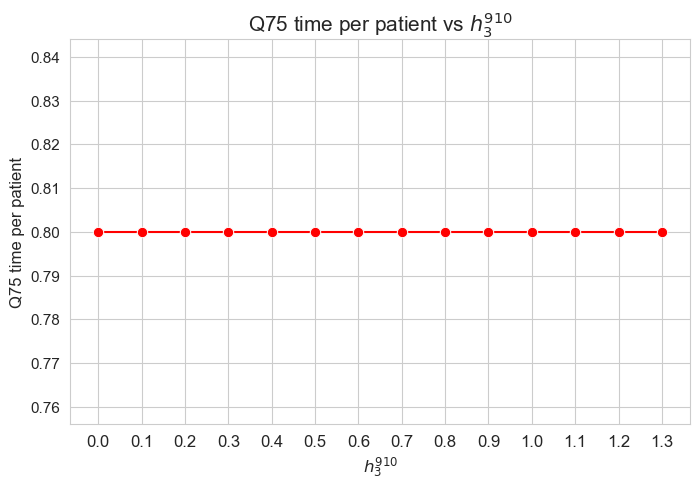

In [99]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_9_10']['Q75_time_per_patient'].values(), x=results2['h3_9_10']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q75 time per patient vs $h_3^{910}$', size=15)
ax.set_ylabel('Q75 time per patient', size=12)
ax.set_xlabel('$h_3^{910}$', size=12)
plt.xticks(results2['h3_9_10']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation as the one made for $h_3^{12}$ parameter.

- **$25$-quantile time spent per patient vs $h_3^{910}$**

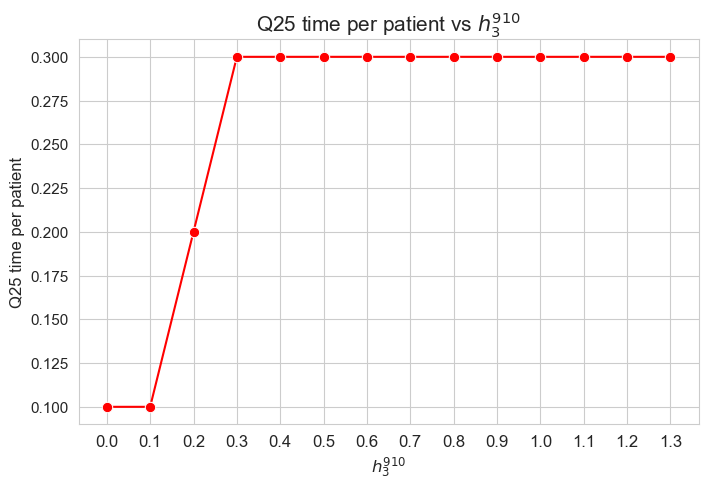

In [100]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(y=results2['h3_9_10']['Q25_time_per_patient'].values(), x=results2['h3_9_10']['feasible'], marker='o', markersize=7.5, color='red')
plt.title('Q25 time per patient vs $h_3^{910}$', size=15)
ax.set_ylabel('Q25 time per patient', size=12)
ax.set_xlabel('$h_3^{910}$', size=12)
plt.xticks(results2['h3_9_10']['feasible'], fontsize=12)
plt.yticks(fontsize=11)
plt.show()

**Interpretation of the results:**

Analogous interpretation to the one made for $h_3^{78}$ parameter.

- **Average time spent per patient vs $w$ vs $h_3^{910}$**

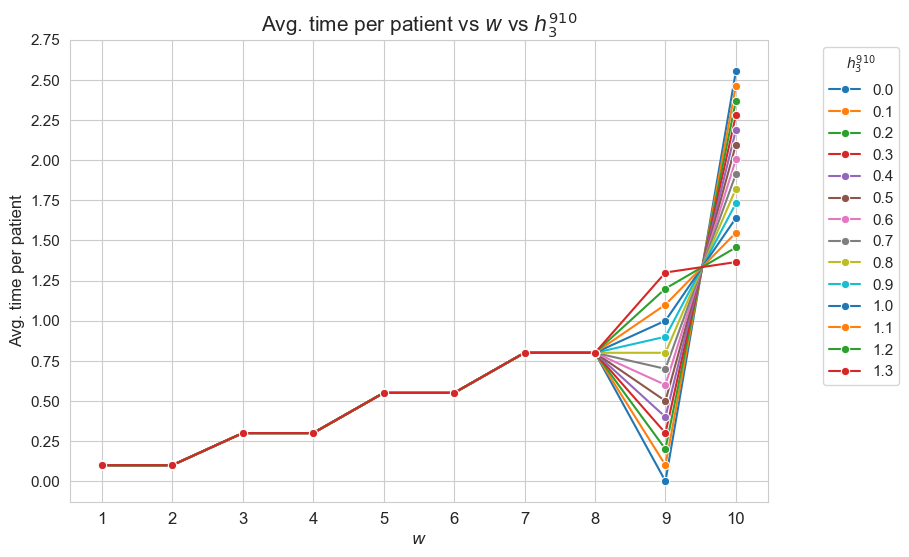

In [101]:
plt.figure(figsize=(9, 6))
for i, h3_9_10 in zip(results2['h3_9_10']['avg_time_patient_per_w'].keys(), results2['h3_9_10']['feasible']) :
    ax = sns.lineplot(y=results2['h3_9_10']['avg_time_patient_per_w'][i].values(), x=results2['h3_9_10']['avg_time_patient_per_w'][i].keys(), 
                      label=round(h3_9_10, 2), marker='o', markersize=6)
plt.title('Avg. time per patient vs $w$ vs $h_3^{910}$', size=15)
ax.set_ylabel('Avg. time per patient', size=12)
ax.set_xlabel('$w$', size=12)
plt.xticks(list(results2['h3_9_10']['avg_time_patient_per_w'][i].keys()), fontsize=12)
plt.yticks(np.arange(0,3, 0.25), fontsize=11)
plt.legend(title='$h_3^{910}$', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=11)
plt.show()

### **Analysis of multiple parameters** 

In this section we make a sensitivity analysis of some of the parameters of the problem, following an multiple  approach, in the sense that we analyzed several parameters at once.

This analysis is essentially carried out using the function `get_results1_multi` and `get_results2_multi`.

In [102]:
params = dict()

def time_seeing_patient(j, t_optimal, params):
    return np.sum([t_optimal[i, j] for i in range(0,params['n'])])

In [103]:
def get_results1_multi(param_names, param_combi_list, params, model) :
    """
    To get the first type multiple results for the hospital model.

    Parameters (inputs)
    ----------
    param_names: a tuple of string with the names of the parameters to by analyzed.
                 The possible names for the parameters are: 
                 'n', 'p', 'w', 'h1', 'h2', 'h4', 'h3_1_2', 'h3_3_4', 'h3_5_6', 'h3_7_8', 'h3_9_10'
    param_combi_list: a list with the combinations of values of the parameters param_names to analyze.
    params: a dictionary with the values of the rest of model parameters, 
            setting the parameters contained in param_names as None.

    Returns (outputs)
    -------
    results1_multi_LM: a dictionary with the first type multiple results obtained.
    """

    results1_multi = dict()
    results1_multi[param_names] = dict()

    for values in param_combi_list :

        for i in range(0, len(values)) :  
                 
            params[param_names[i]] = values[i]

        if model == 'linear' :


            start_time = time.time()
            model_, t_optimal, f_optimal = hospital_linear_model(n=params['n'], p=params['p'], w=params['w'], h1=params['h1'], 
                                                     h2=params['h2'], h3_1_2=params['h3_1_2'], h3_3_4=params['h3_3_4'], 
                                                     h3_5_6=params['h3_5_6'], h3_7_8=params['h3_7_8'], h3_9_10=params['h3_9_10'], 
                                                     h4=params['h4'])
            end_time = time.time()
            elapsed_time = end_time - start_time


        elif model == 'integer' :

            start_time = time.time()
            model_, t_optimal, y_optimal, f_optimal = hospital_integer_model(n=params['n'], p=params['p'], w=params['w'], h1=params['h1'], 
                                                     h2=params['h2'], h3_1_2=params['h3_1_2'], h3_3_4=params['h3_3_4'], 
                                                     h3_5_6=params['h3_5_6'], h3_7_8=params['h3_7_8'], h3_9_10=params['h3_9_10'], 
                                                     h4=params['h4'])
            end_time = time.time()
            elapsed_time = end_time - start_time


        values = tuple([x for x in values if not isinstance(x, (np.ndarray, list))])

        if f_optimal == None :

            results1_multi[param_names][values] = {'type': 'not_feasible', 'model_time': elapsed_time}

        else :

            total_times_per_patient = np.array([time_seeing_patient(j,  t_optimal, params) for j in range(0, params['p'])])

            results1_multi[param_names][values] = {'type': 'feasible', 't_optimal': t_optimal, 'f_optimal': f_optimal,  
                                                   'total_times_per_patient': total_times_per_patient, 'model': model_, 
                                                   'model_time': elapsed_time}
            
    return results1_multi

In [104]:
def get_results2_multi(param_names, results1_multi, n_p_analysis=False, w_dict=None) :
    """
    To get the second type multiple results for the hospital model.

    Parameters (inputs)
    ----------
    param_names: a tuple of string with the names of the parameters to by analyzed.
                 The possible names for the parameters are: 
                 'n', 'p', 'w', 'h1', 'h2', 'h4', 'h3_1_2', 'h3_3_4', 'h3_5_6', 'h3_7_8', 'h3_9_10'
    param_combi_list: a list with the combinations of values of the parameters param_names to analyze.

    Returns (outputs)
    -------
    results1_multi_LM: a dictionary with the second type multiple results obtained.
    """
    
    results2_multi = dict()
    results2_multi[param_names] = dict()
    results2_multi[param_names]['feasible'] = [i for i in results1_multi[param_names].keys() if results1_multi[param_names][i]['type'] == 'feasible']
    results2_multi[param_names]['not_feasible'] = [i for i in results1_multi[param_names].keys() if results1_multi[param_names][i]['type'] == 'not_feasible']
    results2_multi[param_names]['f_optimal_feasible'] = {i: results1_multi[param_names][i]['f_optimal'] for i in results2_multi[param_names]['feasible']}
    results2_multi[param_names]['type'] = [results1_multi[param_names][i]['type'] for i in results1_multi[param_names].keys()]
    results2_multi[param_names]['avg_time_per_patient'] = {i: np.mean(results1_multi[param_names][i]['total_times_per_patient']) for i in results2_multi[param_names]['feasible']}
    results2_multi[param_names]['median_time_per_patient'] = {i: np.median(results1_multi[param_names][i]['total_times_per_patient']) for i in results2_multi[param_names]['feasible']}
    results2_multi[param_names]['median_time_per_patient'] = {i: np.median(results1_multi[param_names][i]['total_times_per_patient']) for i in results2_multi[param_names]['feasible']}
    results2_multi[param_names]['Q75_time_per_patient'] = {i: np.quantile(results1_multi[param_names][i]['total_times_per_patient'], 0.75) for i in results2_multi[param_names]['feasible']}
    results2_multi[param_names]['Q25_time_per_patient'] = {i: np.quantile(results1_multi[param_names][i]['total_times_per_patient'], 0.25) for i in results2_multi[param_names]['feasible']}
    results2_multi[param_names]['num_patients_seen'] = {i: np.sum(results1_multi[param_names][i]['total_times_per_patient'] > 0) for i in results2_multi[param_names]['feasible']}

    if n_p_analysis == False :

        results2_multi[param_names]['w_time_patient_df'] = {i: pl.DataFrame({'w': params['w'], 'time_patient': results1_multi[param_names][i]['total_times_per_patient']}) for i in results2_multi[param_names]['feasible']}
        results2_multi[param_names]['avg_time_patient_per_w'] = {i: {w_value: round(results2_multi[param_names]['w_time_patient_df'][i].filter(pl.col('w') == w_value)['time_patient'].mean(), 3) 
                                                                     for w_value in np.unique(params['w'])} for i in results2_multi[param_names]['feasible']}
    else :

        results2_multi[param_names]['w_time_patient_df'] = {i: pl.DataFrame({'w': w_dict[i[1]], 'time_patient': results1_multi[param_names][i]['total_times_per_patient']}) for i in results2_multi[param_names]['feasible']}
        results2_multi[param_names]['avg_time_patient_per_w'] = {i: {w_value: round(results2_multi[param_names]['w_time_patient_df'][i].filter(pl.col('w') == w_value)['time_patient'].mean(), 3) 
                                                                     for w_value in np.unique( w_dict[i[1]])} for i in results2_multi[param_names]['feasible']}       

    return results2_multi

 **Analysis of $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$ combination of parameters**

- $h_3 :=$  minimum time time spent in each patient, taking into account their severity/importance (this quantity depends on $w_j$).


In [105]:
# Defining the values of the rest of parameters and setting h3_1_2, h3_3_4, h3_5_6, h3_7_8, h3_9_10 as None.

params['n'] = 50 ; params['p']=500 ; params['h1']=6 ; params['h2']=1 ; params['h4']=4
params['h3_1_2'] = None 
params['h3_3_4'] = None
params['h3_5_6'] = None  
params['h3_7_8'] = None 
params['h3_9_10'] = None 

np.random.seed(123)
params['w'] = np.random.randint(1, 11, params['p']) 

# Defining the parameter combination values as a list.
param_combi_list = product([0, 0.1, 0.4], [0, 0.2, 0.5], [0, 0.4, 0.8], [0, 0.6, 1], [0, 0.7, 1.2])
param_combi_list = list(param_combi_list)

# Defining the parameter names as a tuple.
param_names = ('h3_1_2', 'h3_3_4', 'h3_5_6', 'h3_7_8', 'h3_9_10')

The number of combination to analyze is $243$, which is pretty much. Due to the computational time needed to perform the analysis with these all combinations we have run the program one time and stored the result in pickle format. So, it is no longer necessary to run the code that is commented below, the only thing that we have to do is to open the stored results.

In [106]:
len(param_combi_list)

243

The next piece of code could be used in thi case we would like to work with a smaller number of combinations selected in a random way.


In [ ]:
# param_combi_list = random.sample(param_combi_list, 20)

Here the commented code that is no longer necessary to run, which is expensive in terms of time.

In [ ]:
# results1_multi = get_results1_multi(('h3_1_2', 'h3_3_4', 'h3_5_6', 'h3_7_8', 'h3_9_10'), param_combi_list, params, model='linear')
# results2_multi = get_results2_multi(('h3_1_2', 'h3_3_4', 'h3_5_6', 'h3_7_8', 'h3_9_10'), results1_multi)

The following commented code is the one we used to save the result as pickle.

In [ ]:
# save a dictionary as a pickle
#with open('results1_multi_LM.pickle', 'wb') as file:
    # Use pickle's dump function to write the dict to the opened file.
    #pickle.dump(results1_multi, file)

#with open('results2_multi_LM.pickle', 'wb') as file:
    # Use pickle's dump function to write the dict to the opened file.
    #pickle.dump(results2_multi, file)

Now, we open the stored results running the following code.

In [107]:
# Open a dictionary saved as a pickle
with open(r"C:\Users\fscielzo\Documents\Large-Data\Optimization\results1_multi_LM.pickle", 'rb') as file:
    # Read back the pickled file
    results1_multi = pickle.load(file)

# Open a dictionary saved as a pickle
with open(r"C:\Users\fscielzo\Documents\Large-Data\Optimization\results2_multi_LM.pickle", 'rb') as file:
    # Read back the pickled file
    results2_multi = pickle.load(file)
# Time: 2 mins

- **Problem type (feasible - not feasible) vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$**

In [108]:
def type_multi_plot(results2_multi, n_cols=2, figsize=(20, 20), interval_width=30) :

    param_combi_str = [str(x) for x in param_combi_list]

    limits = np.arange(0, len(results2_multi[param_names]['type']), interval_width)
    limits[len(limits)-1] = len(results2_multi[param_names]['type'])
    n_intervals = len(limits) - 1

    # Define the number of rows and columns for the matrix plot
    n_rows = int(np.ceil(n_intervals / n_cols))    

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()  

    # Defining a ecdf-plot for each variable considered.
    for i in  range(0, n_intervals) :
      
        ax = axes[i]  # Get the current axis
        sns.scatterplot(y=results2_multi[param_names]['type'][limits[i]:limits[i+1]], x=param_combi_str[limits[i]:limits[i+1]], color='red', s=100, ax=ax)
        ax.set_title(f'Combination {limits[i]}:{limits[i+1]}', fontsize=13)
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('$(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=12)
        ax.set_ylabel('type', fontsize=12)

    # Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
    for j in range(n_intervals, n_rows*n_cols):
        fig.delaxes(axes[j])

    # Establishing a general tittle for the plot.
    plt.suptitle('type vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=13, y=0.92)
    
    plt.subplots_adjust(hspace=1, wspace=0.2) 

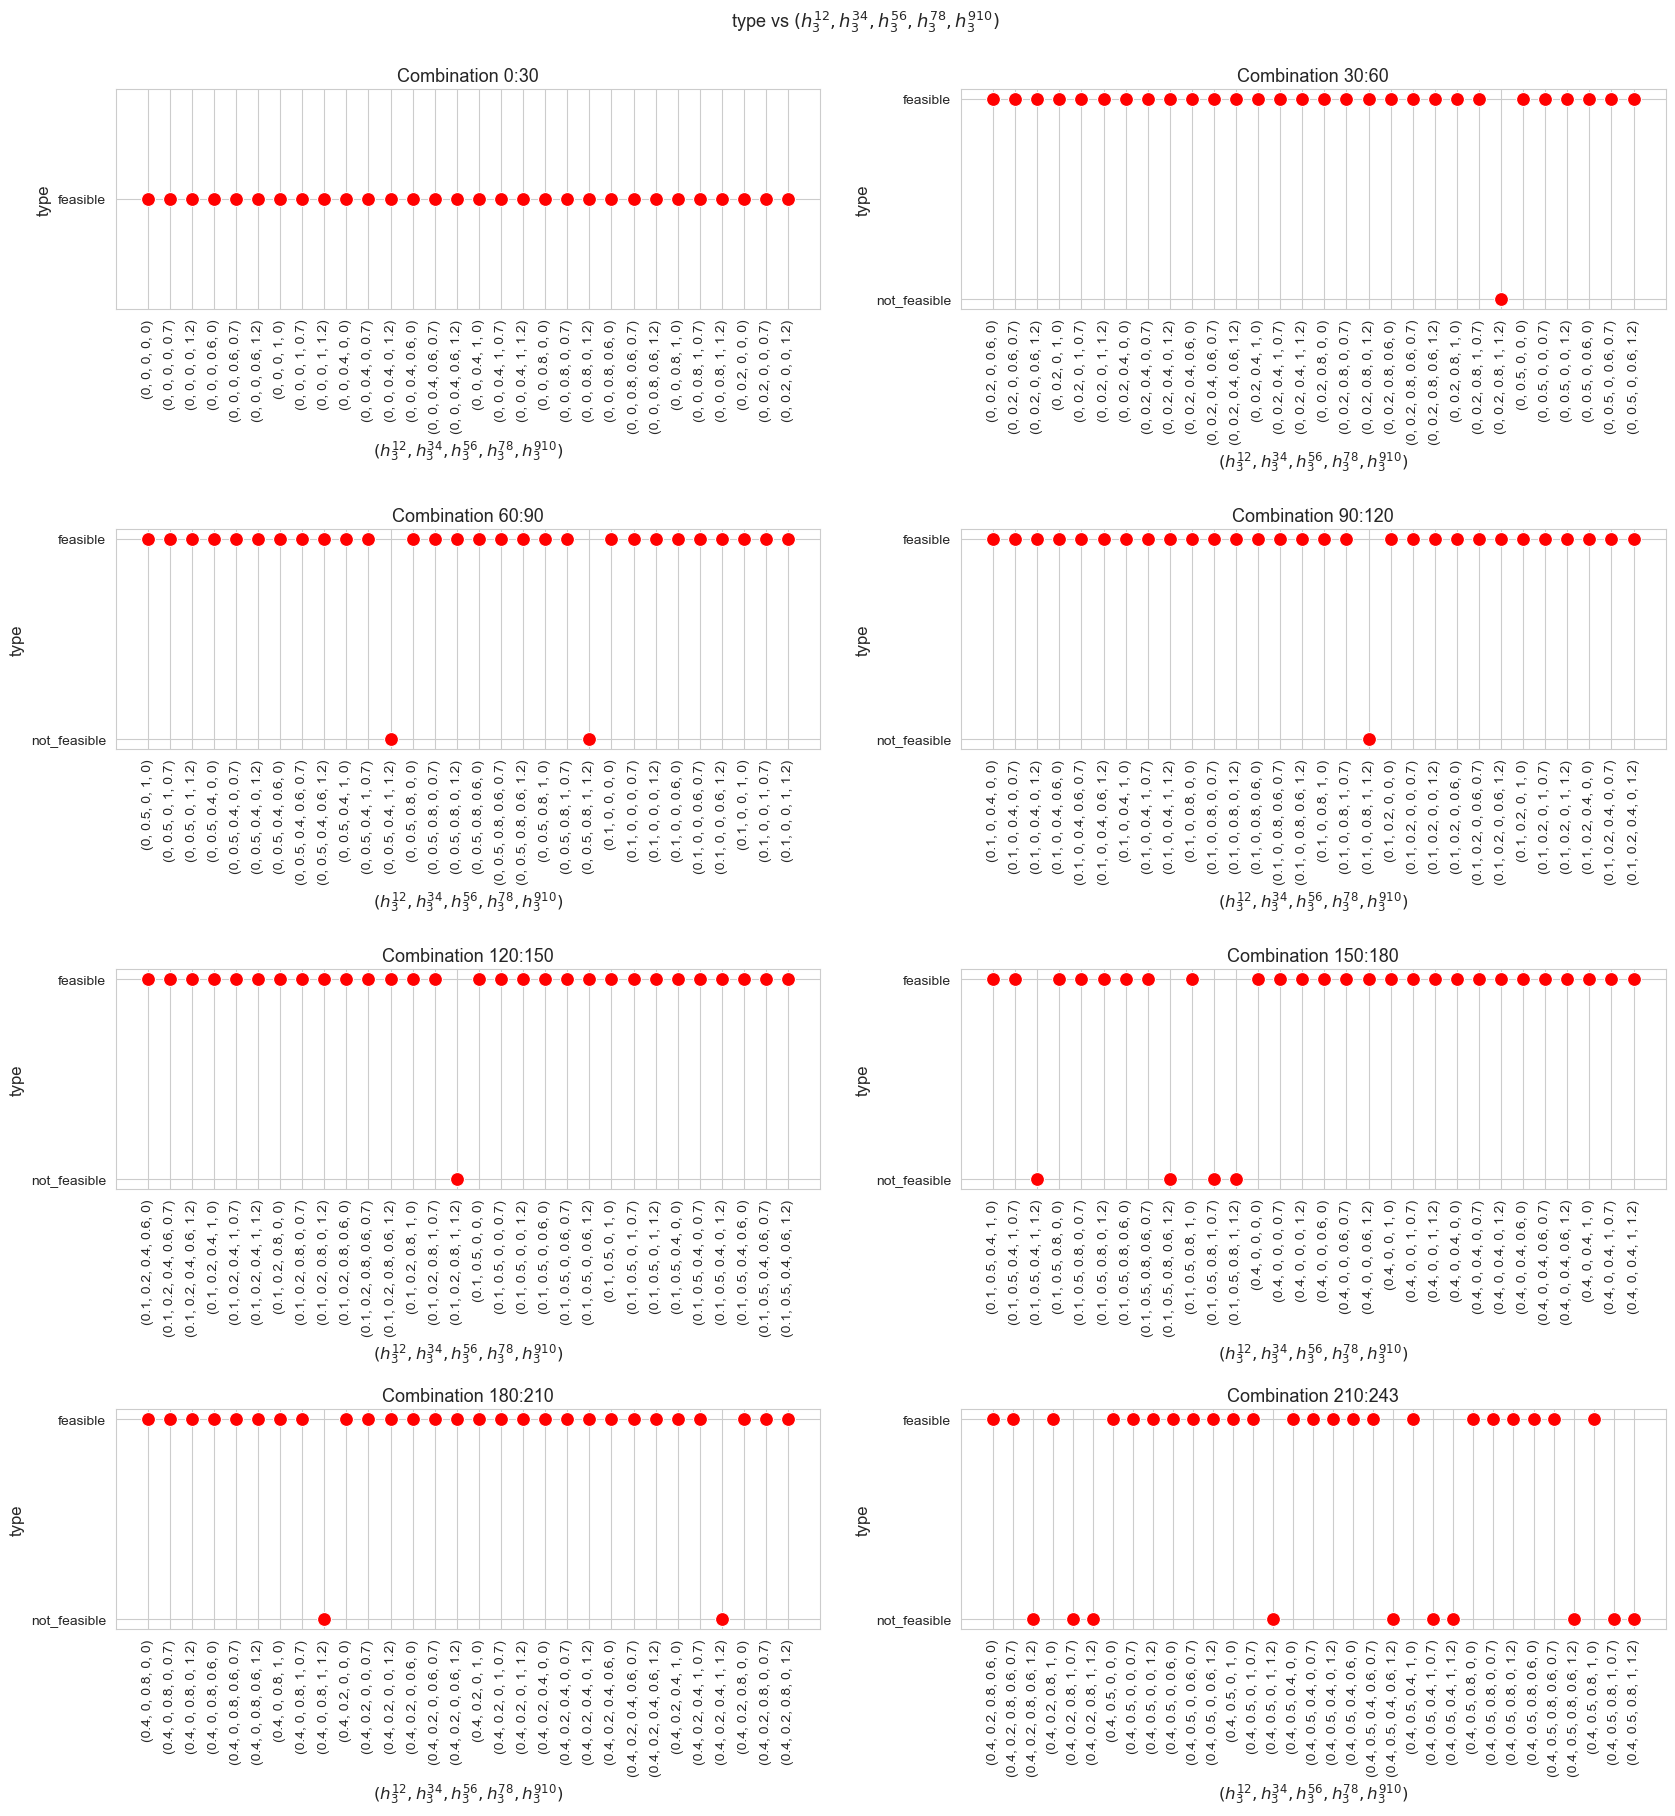

In [109]:
type_multi_plot(results2_multi=results2_multi, n_cols=2, figsize=(20, 20), interval_width=30)

**Interpretation of the results:**

In this analysis, since we have many results to interpret, we will only  focused  in the most interesting ones, from our point of view.

Only a few combinations lead to a non feasible problem. These ones are the following: 


- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0, 0.2, 0.8, 1, 1.2)$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0, 0.5, 0.4, 1, 1.2)$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0, 0.5, 0.8, 1, 1.2)$


- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.1, 0, 0.8, 1, 1.2)$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.1, 0.2, 0.8, 1, 1.2 )$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.1, 0.5, 0.4, 1, 1.2 )$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.1, 0.5, 0.8, 0.6, 1.2)$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.1, 0.5, 0.8, 1, 0.7)$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.1, 0.5, 0.8, 1, 1.2)$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4, 0, 0.8, 1, 1.2)$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4, 0.2, 0.4, 1, 1.2 )$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4, 0.2, 0.8, 0.6, 1.2 )$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4, 0.2, 0.8, 1, 0.7 )$


- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4, 0.2, 0.8, 1, 1.2 )$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4, 0.5, 0, 1, 1.2 )$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4, 0.5, 0.4, 0.6, 1.2 )$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = ( 0.4, 0.5, 0.4, 1, 0.7)$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4, 0.5, 0.4, 1, 1.2 )$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4, 0.5, 0.8, 1, 0)$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = ( 0.4, 0.5, 0.8, 1, 0.7 )$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4, 0.5, 0.8, 1, 0.7 )$

- $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = ( 0.4, 0.5, 0.8, 1, 1.2 )$

The common factor of the combination is that impose too much minimum work on the nurse-doctor tandems to satisfy the good work constraints, so that, the problem becomes non feasible.

On the other hand, when the amount of minimum work impose on the nurse-doctor tandem is not too much, and, therefore, the good working conditions ensure by the rest of constraints are fulfilled, the problem becomes feasible. 

Another thing to highlight that the null combination, that is  $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0,0,0,0,0)$, is feasible. 
This is an special combination because remove the minimum work constraints. 

- **Number of patients seen vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$**

In [110]:
def num_patients_seen_multi_plot(results2_multi, n_cols=2, figsize=(20, 20), interval_width=30) :

    param_combi_feasible_str = [str(x) for x in results2_multi[param_names]['feasible']]

    limits = np.arange(0, len(results2_multi[param_names]['feasible']), interval_width)
    limits[len(limits)-1] = len(results2_multi[param_names]['feasible'])
    n_intervals = len(limits) - 1

    # Define the number of rows and columns for the matrix plot
    n_rows = int(np.ceil(n_intervals / n_cols))
 

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()  

    # Defining a ecdf-plot for each variable considered.
    for i in range(0, n_intervals) :

        ax = axes[i]  # Get the current axis
        sns.lineplot(y=list(results2_multi[param_names]['num_patients_seen'].values())[limits[i]:limits[i+1]], 
                     x=param_combi_feasible_str[limits[i]:limits[i+1]], 
                     marker='o', markersize=7.5, color='red', ax=ax)
        ax.set_title(f'Combination {limits[i]}:{limits[i+1]}', fontsize=13)
        ax.set_yticks(np.arange(50, 600, 50)) 
        ax.tick_params(axis='y', rotation=0)
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('$(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=12)
        ax.set_ylabel('number of patients seen', fontsize=12)


    # Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
    for j in range(n_intervals, n_rows*n_cols):
        fig.delaxes(axes[j])

    # Establishing a general tittle for the plot.
    plt.suptitle('number of patients seen vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=13, y=0.92)
    
    plt.subplots_adjust(hspace=1, wspace=0.2) 

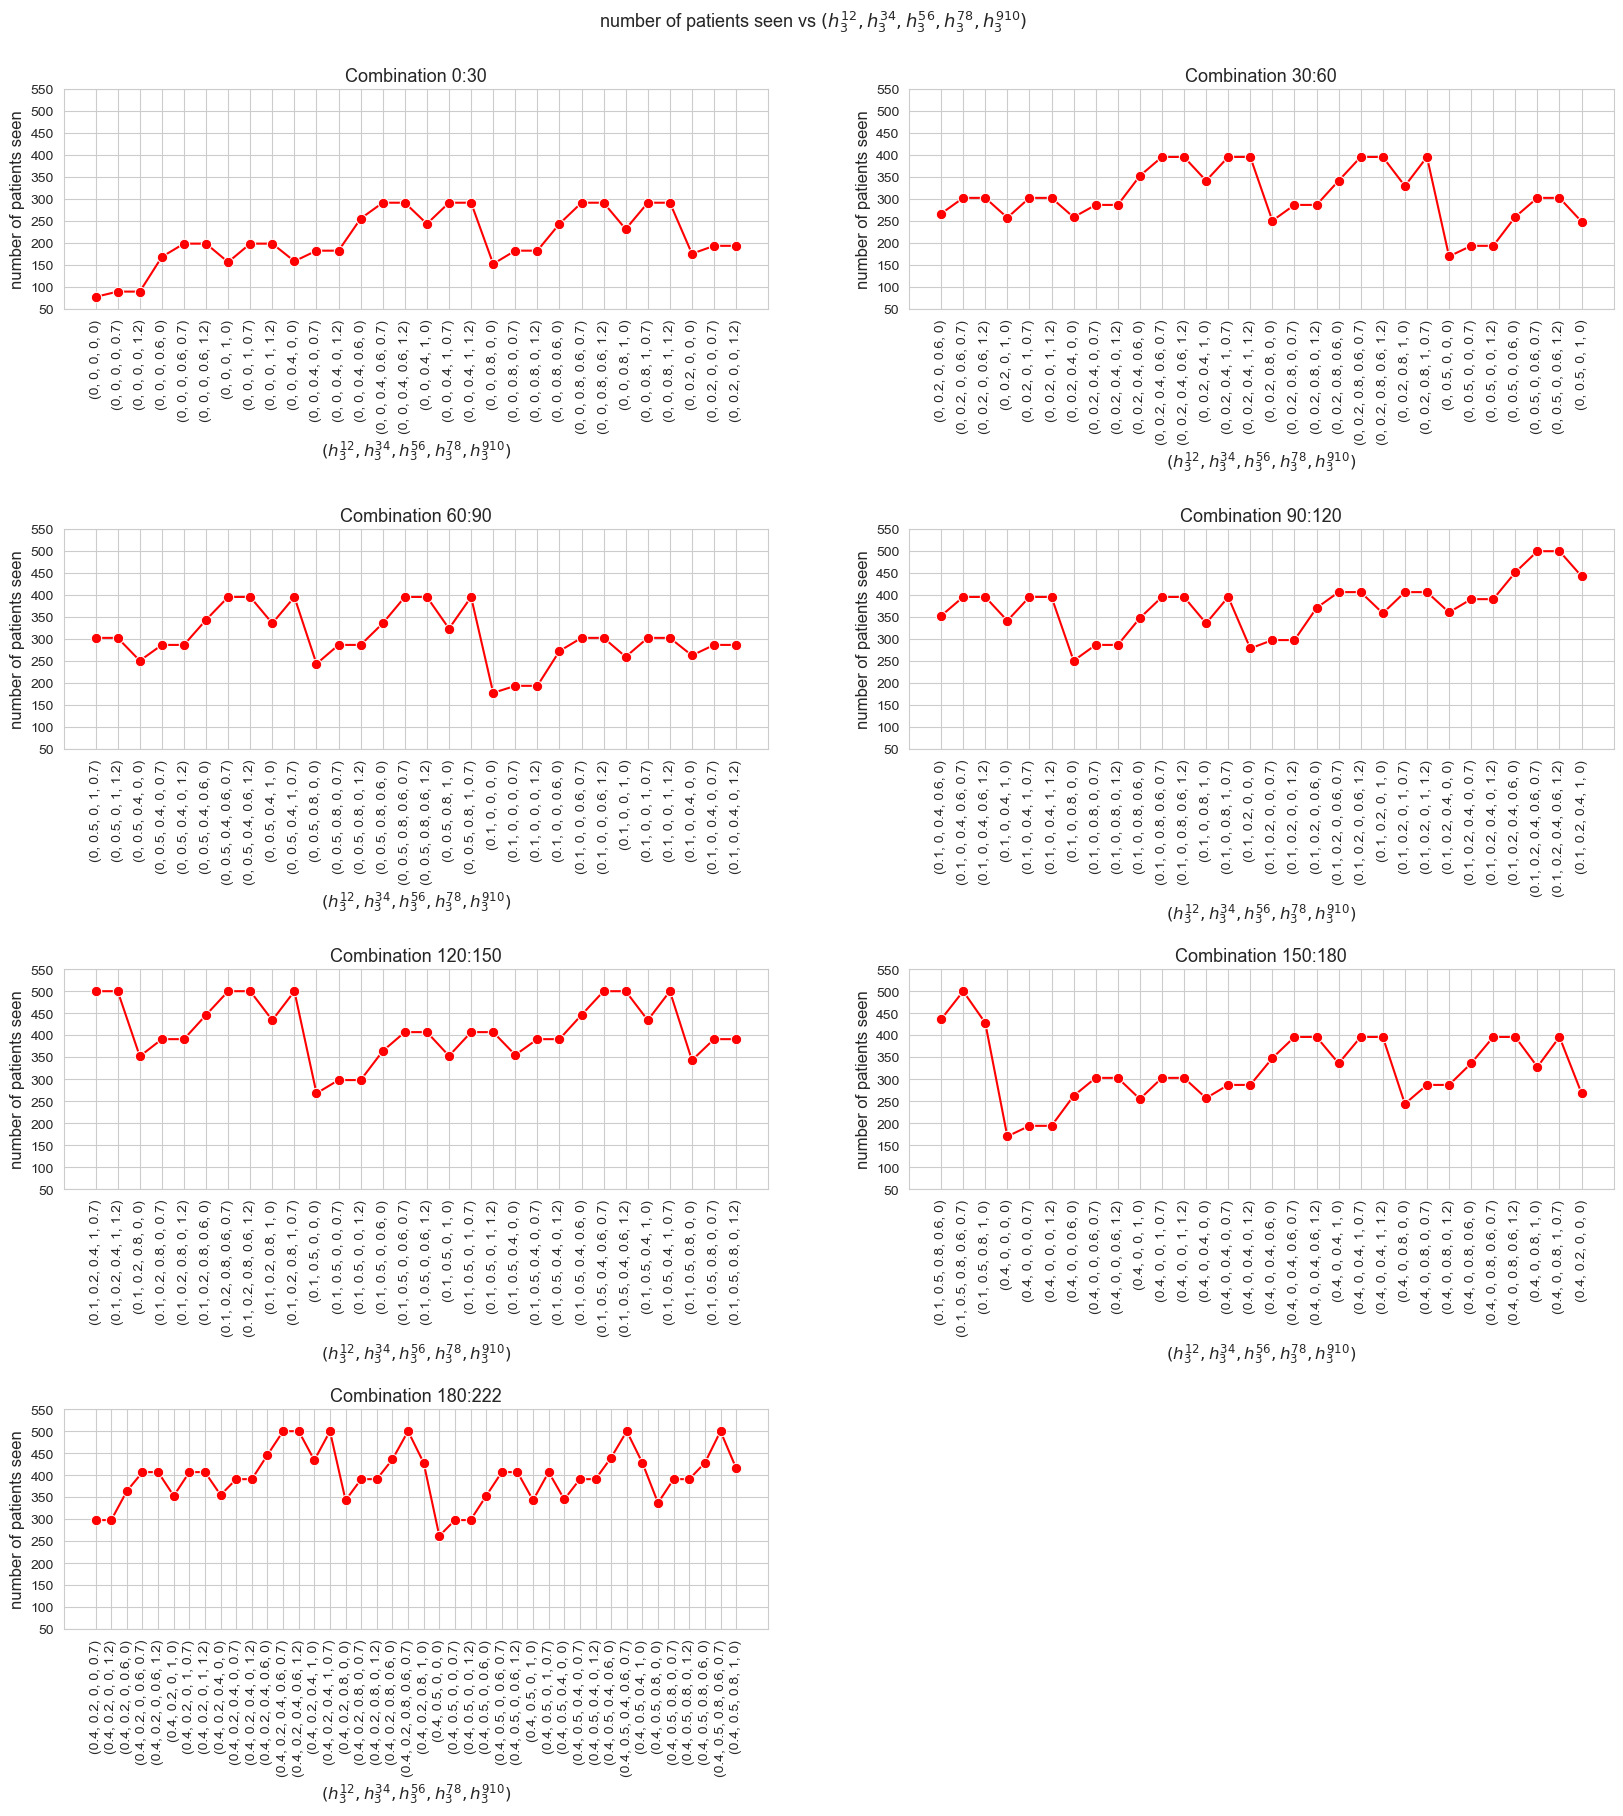

In [111]:
num_patients_seen_multi_plot(results2_multi=results2_multi, n_cols=2, figsize=(20, 20), interval_width=30)

**Interpretation of the results:**

From the plot we can extract some conclusions that seems to be fulfilled in general.

- Given two combinations of value parameters, the one with more zeros has a lower number of patients seen associated, in general.

- The more zeros a combination has, the lower number of patient seen, in general. 

This two conclusion can lead us to the next one:

- When the minimum work imposed on nurse-doctor tandems decreases, the number of patients seen decreases as well, and vice versa.



Let's check this last conclusion in a more accurate way. 

We can define the minimum work imposed on the tandems as $\sum_{i,j } h_3^{ij}$.

We are going to plot the minimum work imposed on tandems vs the number of patient seen in a scatter plot, in order to see if there is some positive relationship between these variables.

In [112]:
min_time_working_imposed = [np.round(np.sum(results2_multi[param_names]['feasible'][x]), 2) for x in range(0, len(results2_multi[param_names]['feasible']))]
num_patients_seen = list(results2_multi[param_names]['num_patients_seen'].values())

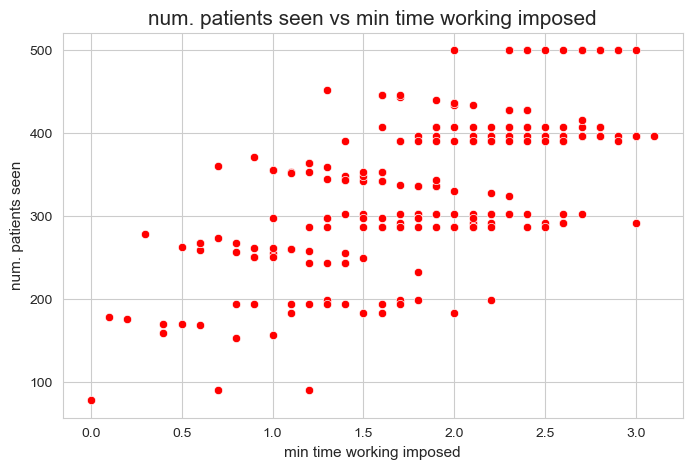

In [113]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=min_time_working_imposed, y=num_patients_seen, color='red')
plt.title('num. patients seen vs min time working imposed', size=15)
ax.set_ylabel('num. patients seen', size=11)
ax.set_xlabel('min time working imposed', size=11)
plt.show()

We can see that it seems to be a clear positive relationship between the minimum time of work imposed on the nurse-doctor tandems and the number of patient seen. As we conclude before, the more min time of work is imposed in nurse-doctor tandems, the higher number of patients are seen.

In [114]:
pearsonr(min_time_working_imposed, num_patients_seen)

PearsonRResult(statistic=0.6585501909917421, pvalue=5.562015054657519e-29)

- **Optimal value of the objective function vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$**

In [115]:
def f_optimal_multi_plot(results2_multi, n_cols=2, figsize=(20, 20), interval_width=30) :

    param_combi_feasible_str = [str(x) for x in results2_multi[param_names]['feasible']]

    limits = np.arange(0, len(results2_multi[param_names]['feasible']), interval_width)
    limits[len(limits)-1] = len(results2_multi[param_names]['feasible'])
    n_intervals = len(limits) - 1

    # Define the number of rows and columns for the matrix plot
    n_rows = int(np.ceil(n_intervals / n_cols))

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()  

    # Defining a ecdf-plot for each variable considered.
    for i in range(0, n_intervals) :

        ax = axes[i]  # Get the current axis
        sns.lineplot(y=list(results2_multi[param_names]['f_optimal_feasible'].values())[limits[i]:limits[i+1]], 
                     x=param_combi_feasible_str[limits[i]:limits[i+1]], 
                     marker='o', markersize=7.5, color='red', ax=ax)
        ax.set_title(f'Combination {limits[i]}:{limits[i+1]}', fontsize=13)
        ax.set_yticks(np.arange(1650, 3300, 300))
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('$(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=12)
        ax.set_ylabel('$f$ optimal', fontsize=12)

    # Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
    for j in range(n_intervals, n_rows*n_cols):
        fig.delaxes(axes[j])

    # Establishing a general tittle for the plot.
    plt.suptitle('$f$ optimal vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=13, y=0.92)
    
    plt.subplots_adjust(hspace=1, wspace=0.2) 

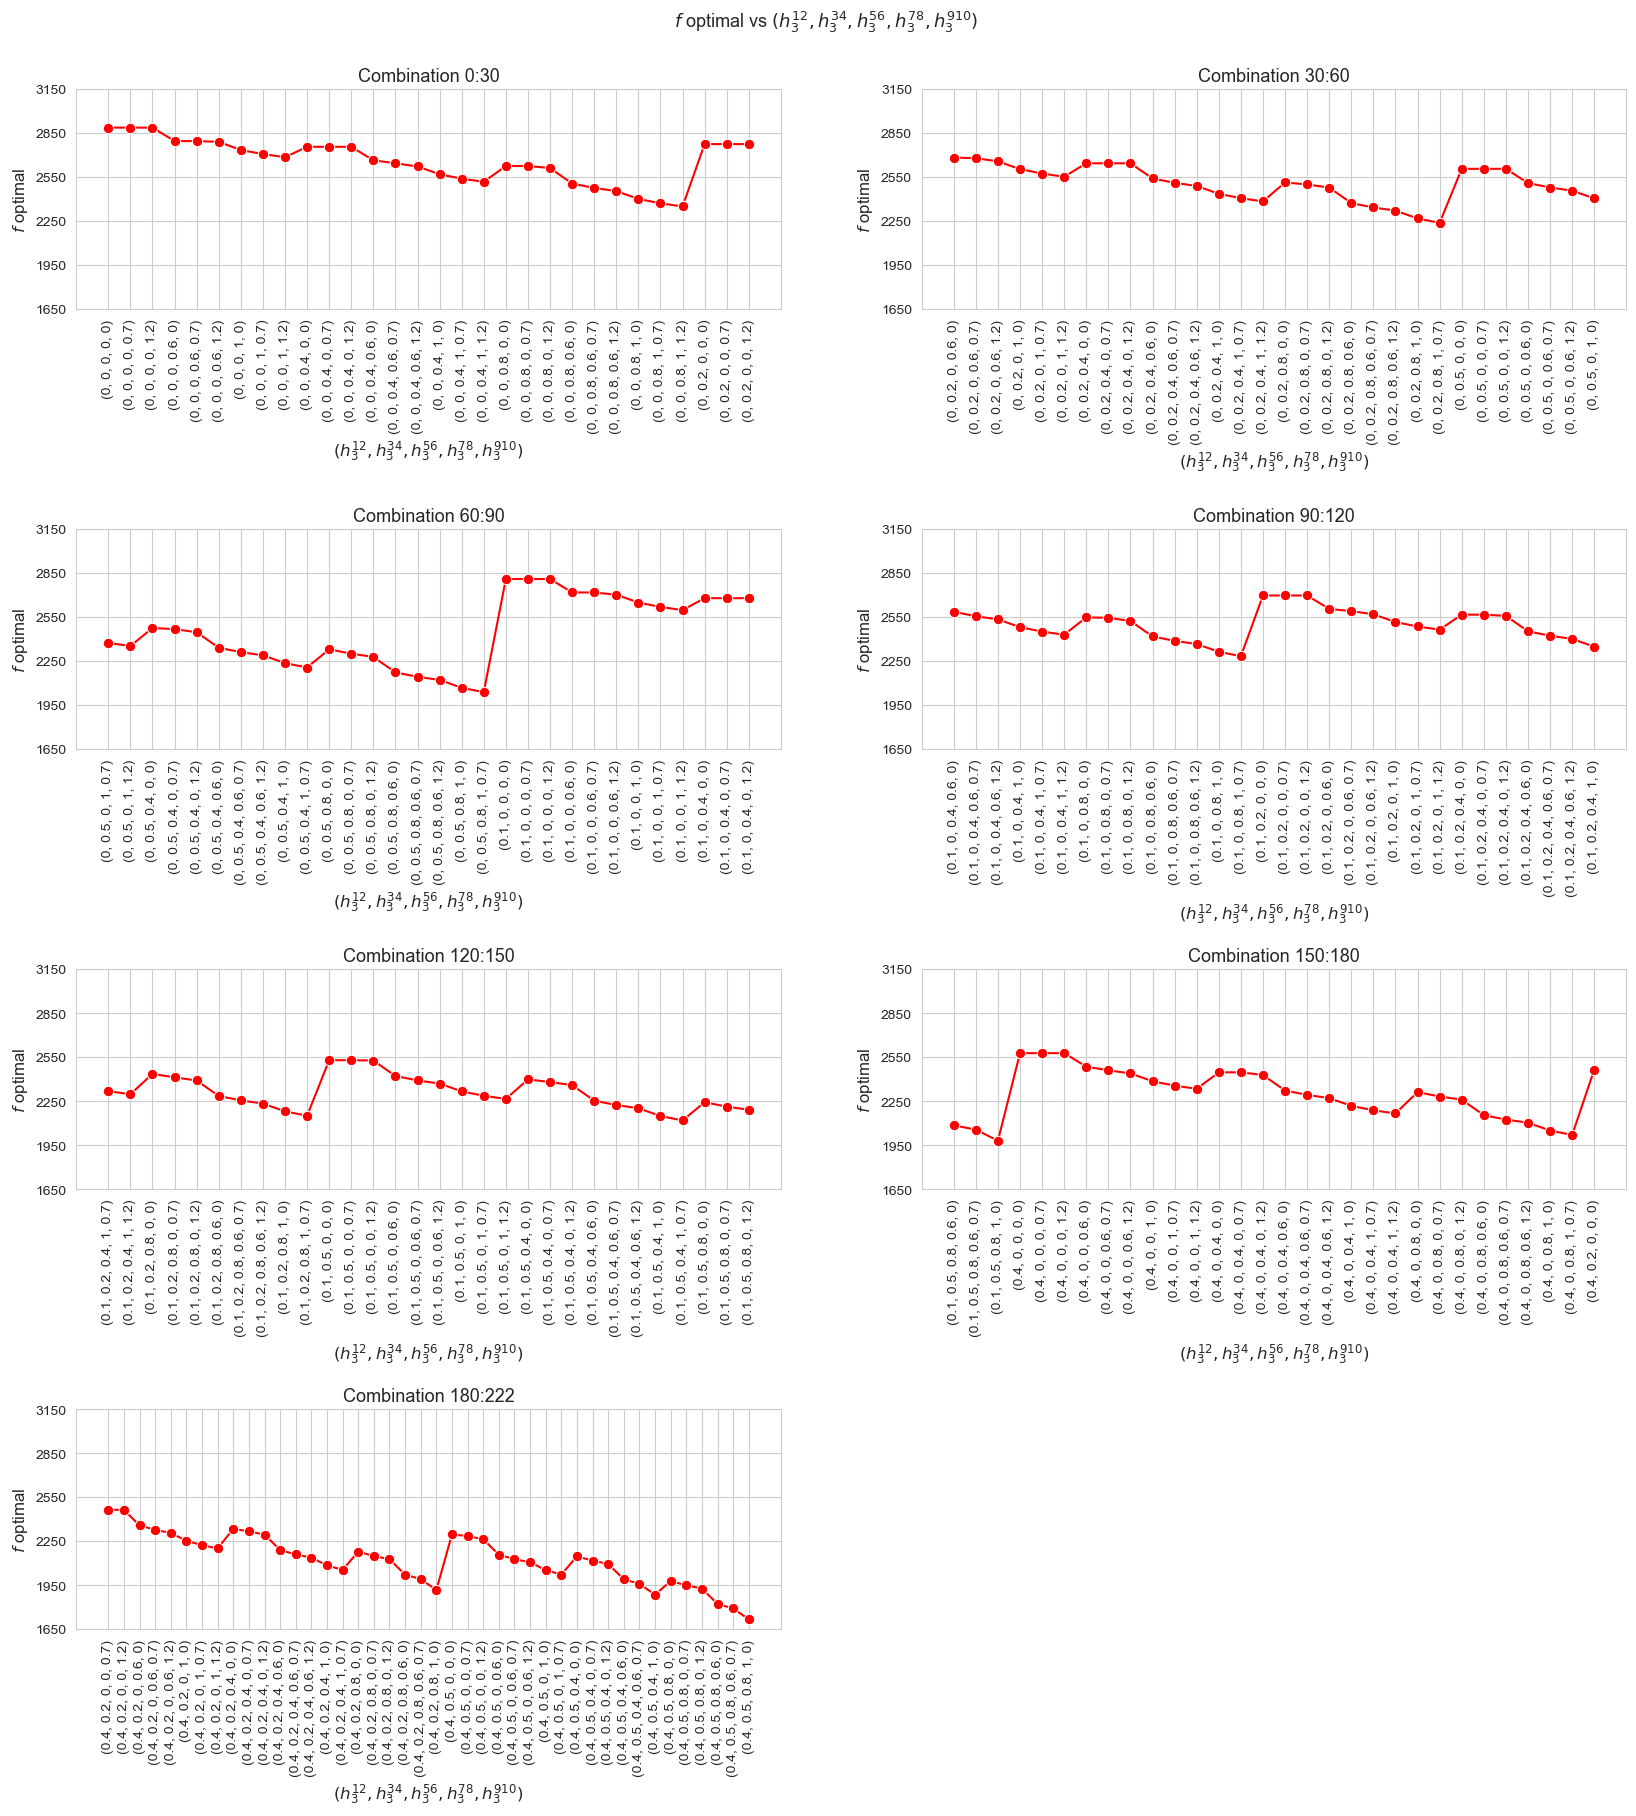

In [116]:
f_optimal_multi_plot(results2_multi=results2_multi, n_cols=2, figsize=(20, 20), interval_width=30)

**Interpretation of the results:**

From the plot we can extract some conclusions that seems to be fulfilled in general.

- The lower values a combination has, the higher optimal value of the objective function, and vice versa.

This conclusion can lead us to the next one:

- When the minimum work imposed on nurse-doctor tandems decreases, the the optimal value of the objective function increases, and vice versa.


In order to check this last conclusion in a more accurate way, 
we are going to plot the minimum work imposed on tandems vs the optimal values of the objective functio in a scatter plot, to see if there is some negative relationship between these variables.

In [117]:
f_optimal_values = list(results2_multi[param_names]['f_optimal_feasible'].values())

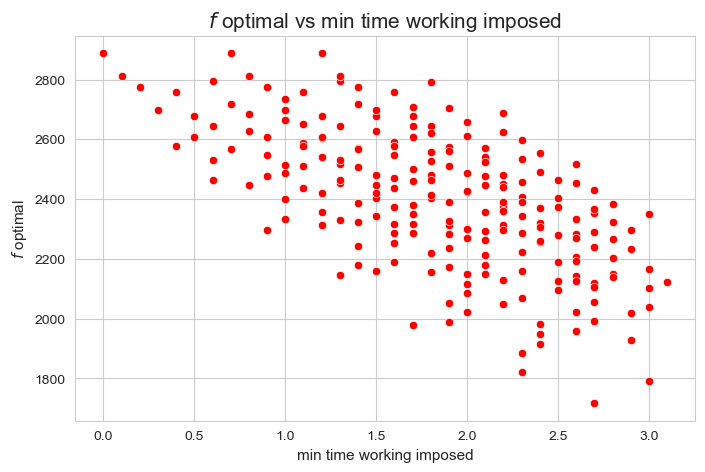

In [119]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=min_time_working_imposed, y=f_optimal_values, color='red')
plt.title('$f$ optimal vs min time working imposed', size=15)
ax.set_ylabel('$f$ optimal', size=11)
ax.set_xlabel('min time working imposed', size=11)
plt.show()

A strong negative relationship can be derived from the plot between the minimum time of work imposed on the tandems and the optimal values of the objective function.

In [120]:
pearsonr(min_time_working_imposed, f_optimal_values)

PearsonRResult(statistic=-0.6435556542037493, pvalue=2.367555517444791e-27)

- **Average time spent per patient vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$**

In [121]:
def avg_time_multi_plot(results2_multi, n_cols=2, figsize = (20, 20), interval_width=30) :

    param_combi_feasible_str = [str(x) for x in results2_multi[param_names]['feasible']]

    limits = np.arange(0, len(results2_multi[param_names]['feasible']), interval_width)
    limits[len(limits)-1] = len(results2_multi[param_names]['feasible'])
    n_intervals = len(limits) - 1

    # Define the number of rows and columns for the matrix plot
    n_rows = int(np.ceil(n_intervals / n_cols))

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()  

    # Defining a ecdf-plot for each variable considered.
    for i in range(0, n_intervals) :

        ax = axes[i]  # Get the current axis
        y = np.round(list(results2_multi[param_names]['avg_time_per_patient'].values())[limits[i]:limits[i+1]], 3)
        sns.lineplot(y=y, 
                     x=param_combi_feasible_str[limits[i]:limits[i+1]], 
                     marker='o', markersize=7.5, color='red', ax=ax)
        ax.set_title(f'Combination {limits[i]}:{limits[i+1]}', fontsize=13)
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('$(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=12)
        ax.set_ylabel('Avg. time per patient', fontsize=12)

    # Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
    for j in range(n_intervals, n_rows*n_cols):
        fig.delaxes(axes[j])

    # Establishing a general tittle for the plot.
    plt.suptitle('Avg. time per patient vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=13, y=0.92)
    
    plt.subplots_adjust(hspace=1, wspace=0.2) 

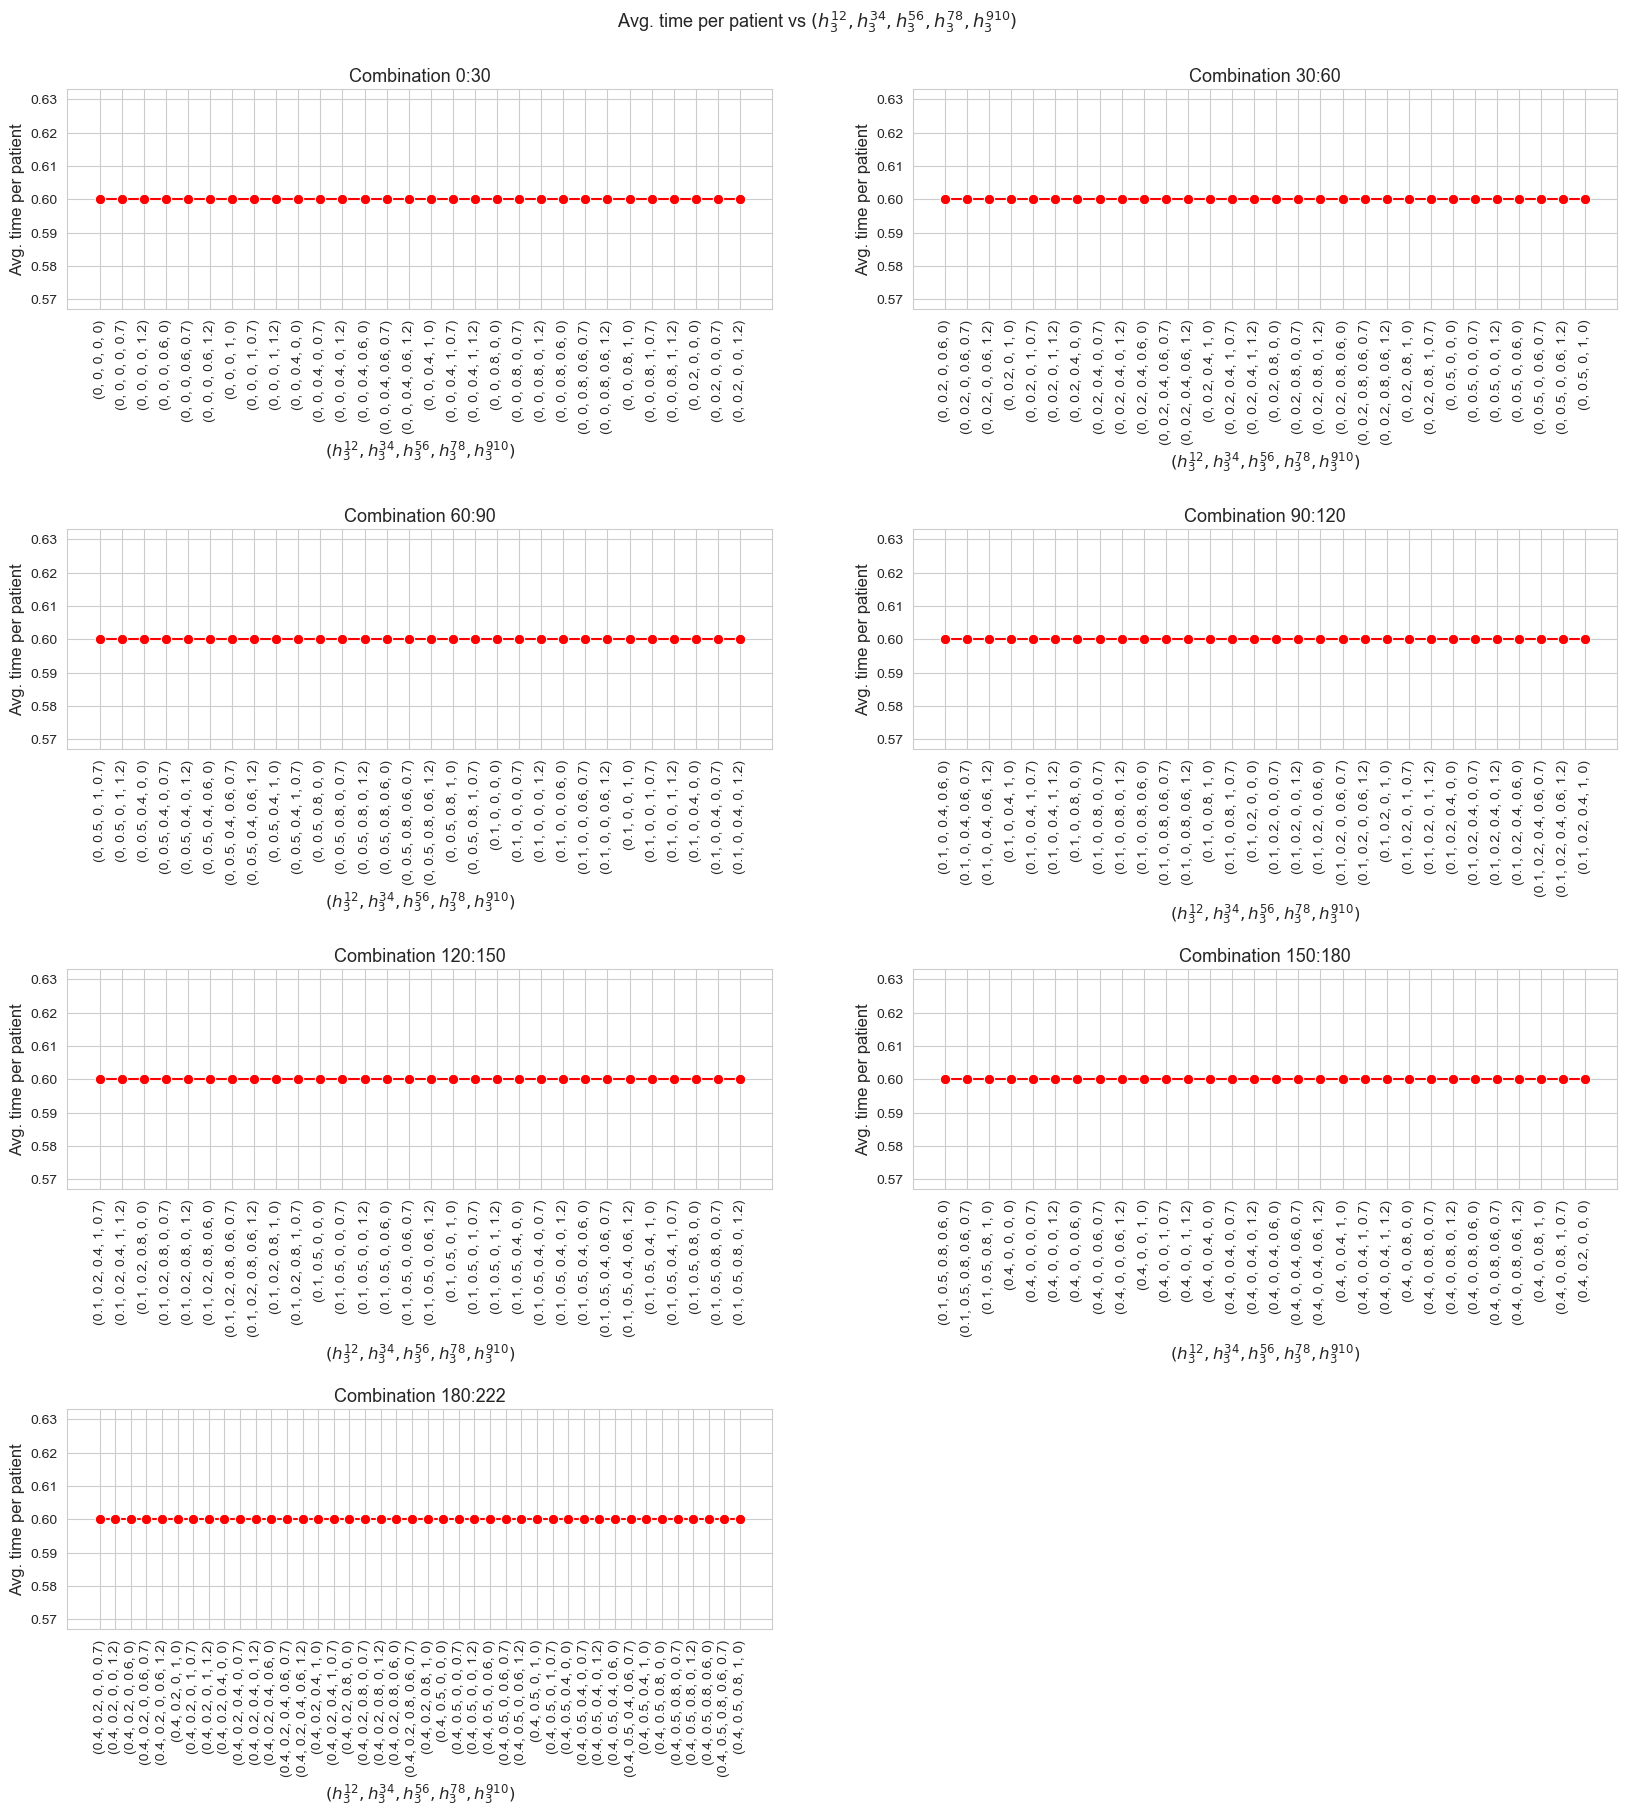

In [122]:
avg_time_multi_plot(results2_multi=results2_multi, n_cols=2, figsize = (20, 20), interval_width=30)

**Interpretation of the results:**

From the plot we can extract some conclusions that seems to be fulfilled in general.

- The combination of values of $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$ doesn't affect to the average time spent seeing patients.




- **Median time spent per patient vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$**

In [123]:
def median_time_multi_plot(results2_multi, n_cols=2, figsize = (20, 20), interval_width=30) :

    param_combi_feasible_str = [str(x) for x in results2_multi[param_names]['feasible']]

    limits = np.arange(0, len(results2_multi[param_names]['feasible']), interval_width)
    limits[len(limits)-1] = len(results2_multi[param_names]['feasible'])
    n_intervals = len(limits) - 1

    # Define the number of rows and columns for the matrix plot
    n_rows = int(np.ceil(n_intervals / n_cols))
    
    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()  

    # Defining a ecdf-plot for each variable considered.
    for i in range(0, n_intervals) :

        ax = axes[i]  # Get the current axis
        sns.lineplot(y=list(results2_multi[param_names]['median_time_per_patient'].values())[limits[i]:limits[i+1]], 
                     x=param_combi_feasible_str[limits[i]:limits[i+1]], 
                     marker='o', markersize=7.5, color='red', ax=ax)
        ax.set_yticks(np.round(np.arange(-0.2, 1.2, 0.2), 2))
        ax.set_title(f'Combination {limits[i]}:{limits[i+1]}', fontsize=13)
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('$(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=12)
        ax.set_ylabel('Median time per patient', fontsize=12)

    # Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
    for j in range(n_intervals, n_rows*n_cols):
        fig.delaxes(axes[j])

    # Establishing a general tittle for the plot.
    plt.suptitle('Median time per patient vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=13, y=0.92)
    
    plt.subplots_adjust(hspace=1, wspace=0.2) 

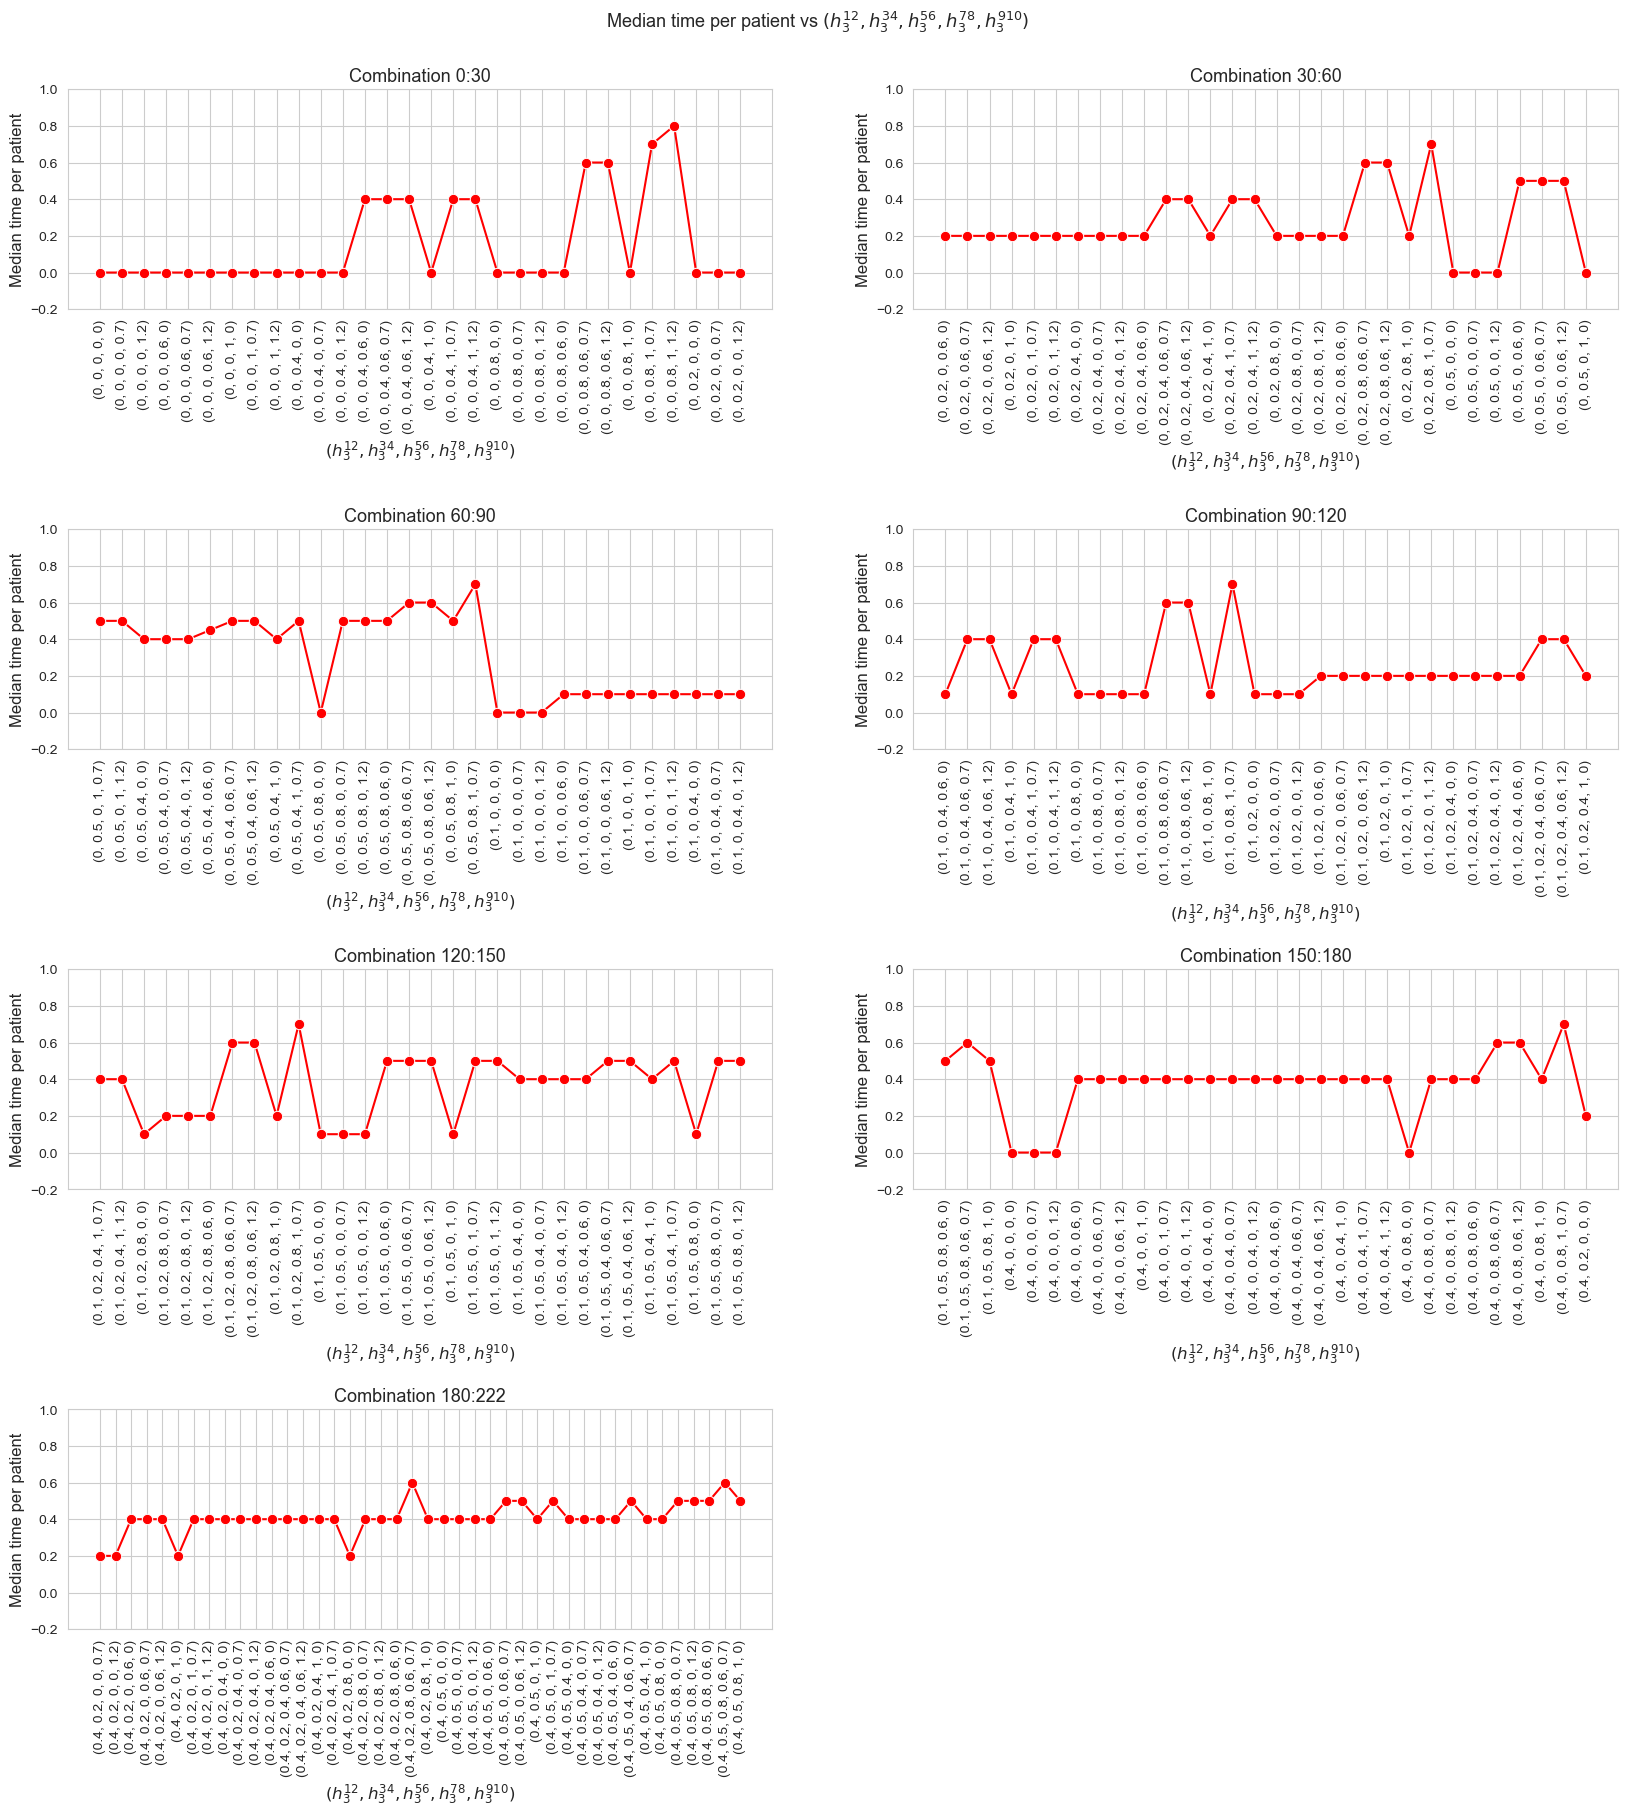

In [124]:
median_time_multi_plot(results2_multi=results2_multi, n_cols=2, figsize = (20, 20), interval_width=30)

**Interpretation of the results:**

From the plot we can extract some conclusions that seems to be fulfilled in general.

- The combination of values of $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$ indeed affect to the median of the time spent in patients. 

     But it is not easy at all to find out a clear pattern to explain the behavior seen in the plot.




- **$75$-quantile of time spent per patient vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$**

In [125]:
def Q75_time_multi_plot(results2_multi, n_cols=2, figsize = (20, 20), interval_width=30) :

    param_combi_feasible_str = [str(x) for x in results2_multi[param_names]['feasible']]

    limits = np.arange(0, len(results2_multi[param_names]['feasible']), interval_width)
    limits[len(limits)-1] = len(results2_multi[param_names]['feasible'])
    n_intervals = len(limits) - 1

    # Define the number of rows and columns for the matrix plot
    n_rows = int(np.ceil(n_intervals / n_cols))

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()  

    # Defining a ecdf-plot for each variable considered.
    for i in range(0, n_intervals) :

        ax = axes[i]  # Get the current axis
        sns.lineplot(y=list(results2_multi[param_names]['Q75_time_per_patient'].values())[limits[i]:limits[i+1]], 
                     x=param_combi_feasible_str[limits[i]:limits[i+1]], 
                     marker='o', markersize=7.5, color='red', ax=ax)
        ax.set_title(f'Combination {limits[i]}:{limits[i+1]}', fontsize=13)
        ax.set_yticks(np.round(np.arange(-0.2, 1.4, 0.2), 2))
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('$(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=12)
        ax.set_ylabel('Q75 time per patient', fontsize=12)

    # Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
    for j in range(n_intervals, n_rows*n_cols):
        fig.delaxes(axes[j])

    # Establishing a general tittle for the plot.
    plt.suptitle('Q75 time per patient vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=13, y=0.92)
    
    plt.subplots_adjust(hspace=1, wspace=0.2) 

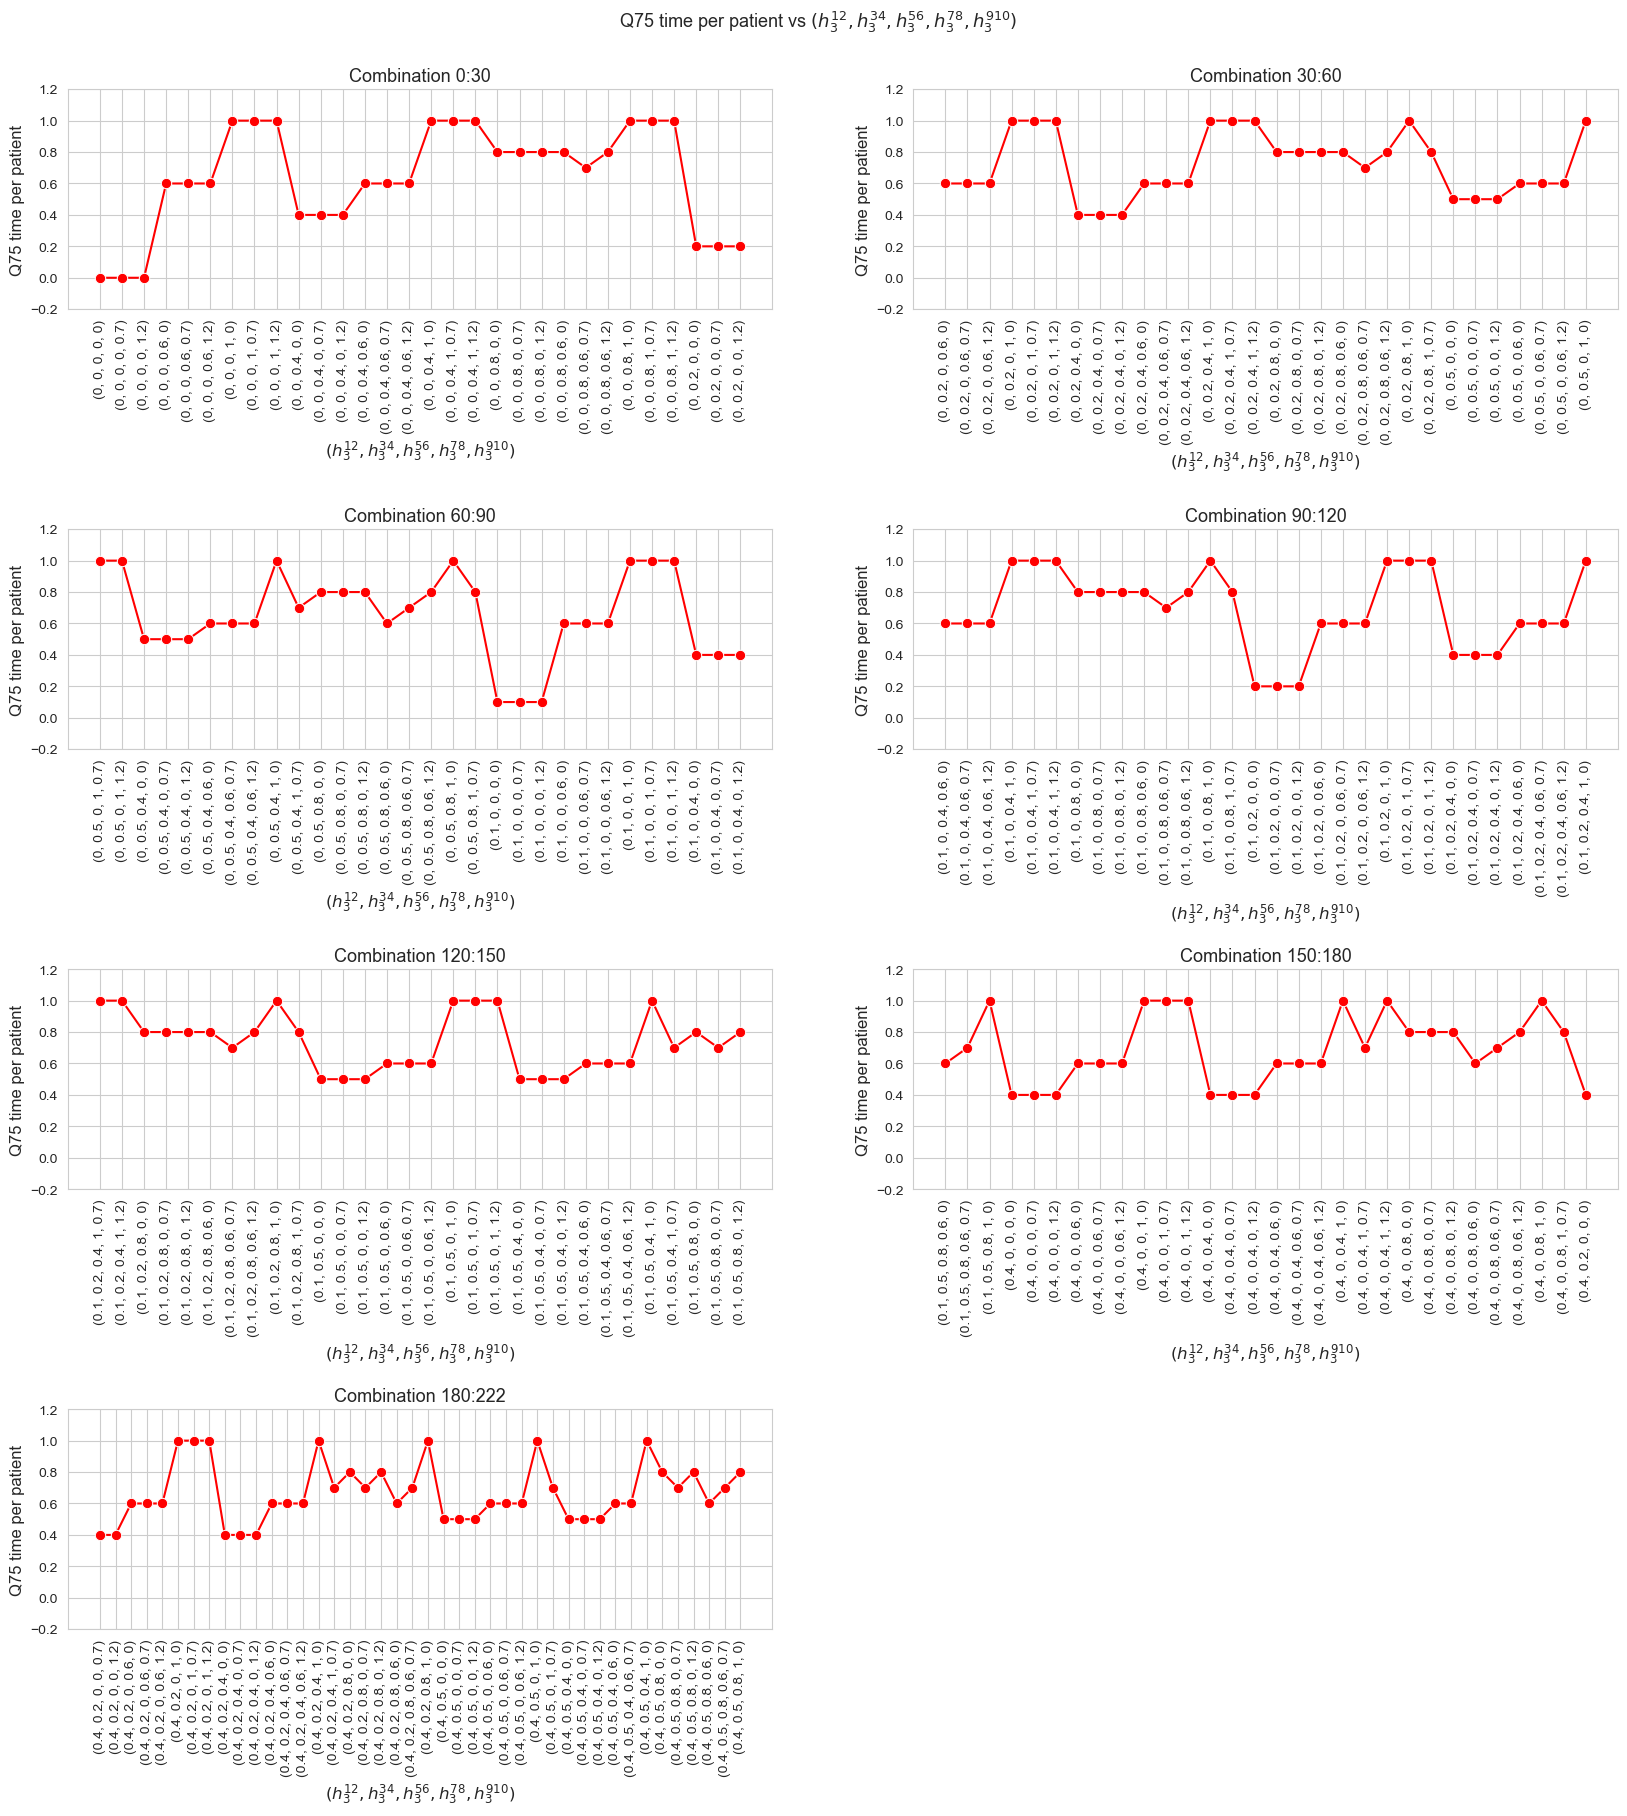

In [126]:
Q75_time_multi_plot(results2_multi=results2_multi, n_cols=2, figsize=(20, 20), interval_width=30)

**Interpretation of the results:**

From the plot we can extract some conclusions that seems to be fulfilled in general.

- The combination of values of $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$ indeed affect to the $75$-quantile of the time spent in patients. 

     But it is not easy at all to find out a clear pattern that explains the behavior seen in the plot.




- **$25$-quantile of time spent per patient vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$**

In [127]:
def Q25_time_multi_plot(results2_multi, n_cols=2, figsize=(20, 20), interval_width=30) :

    param_combi_feasible_str = [str(x) for x in results2_multi[param_names]['feasible']]

    limits = np.arange(0, len(results2_multi[param_names]['feasible']), interval_width)
    limits[len(limits)-1] = len(results2_multi[param_names]['feasible'])
    n_intervals = len(limits) - 1

    # Define the number of rows and columns for the matrix plot
    n_rows = int(np.ceil(n_intervals / n_cols))

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()  

    # Defining a ecdf-plot for each variable considered.
    for i in range(0, n_intervals) :

        ax = axes[i]  # Get the current axis
        sns.lineplot(y=list(results2_multi[param_names]['Q25_time_per_patient'].values())[limits[i]:limits[i+1]], 
                     x=param_combi_feasible_str[limits[i]:limits[i+1]], 
                     marker='o', markersize=7.5, color='red', ax=ax)
        ax.set_title(f'Combination {limits[i]}:{limits[i+1]}', fontsize=13)
        ax.set_yticks(np.round(np.arange(-0.1, 0.6, 0.1), 2))
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel(param_names, fontsize=12)
        ax.set_ylabel('Q25 time per patient', fontsize=12)

    # Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
    for j in range(n_intervals, n_rows*n_cols):
        fig.delaxes(axes[j])

    # Establishing a general tittle for the plot.
    plt.suptitle('Q25 time per patient vs (h3_1_2, h3_3_4, h3_5_6, h3_7_8, h3_9_10)', fontsize=13, y=0.92)
    
    plt.subplots_adjust(hspace=1, wspace=0.2) 

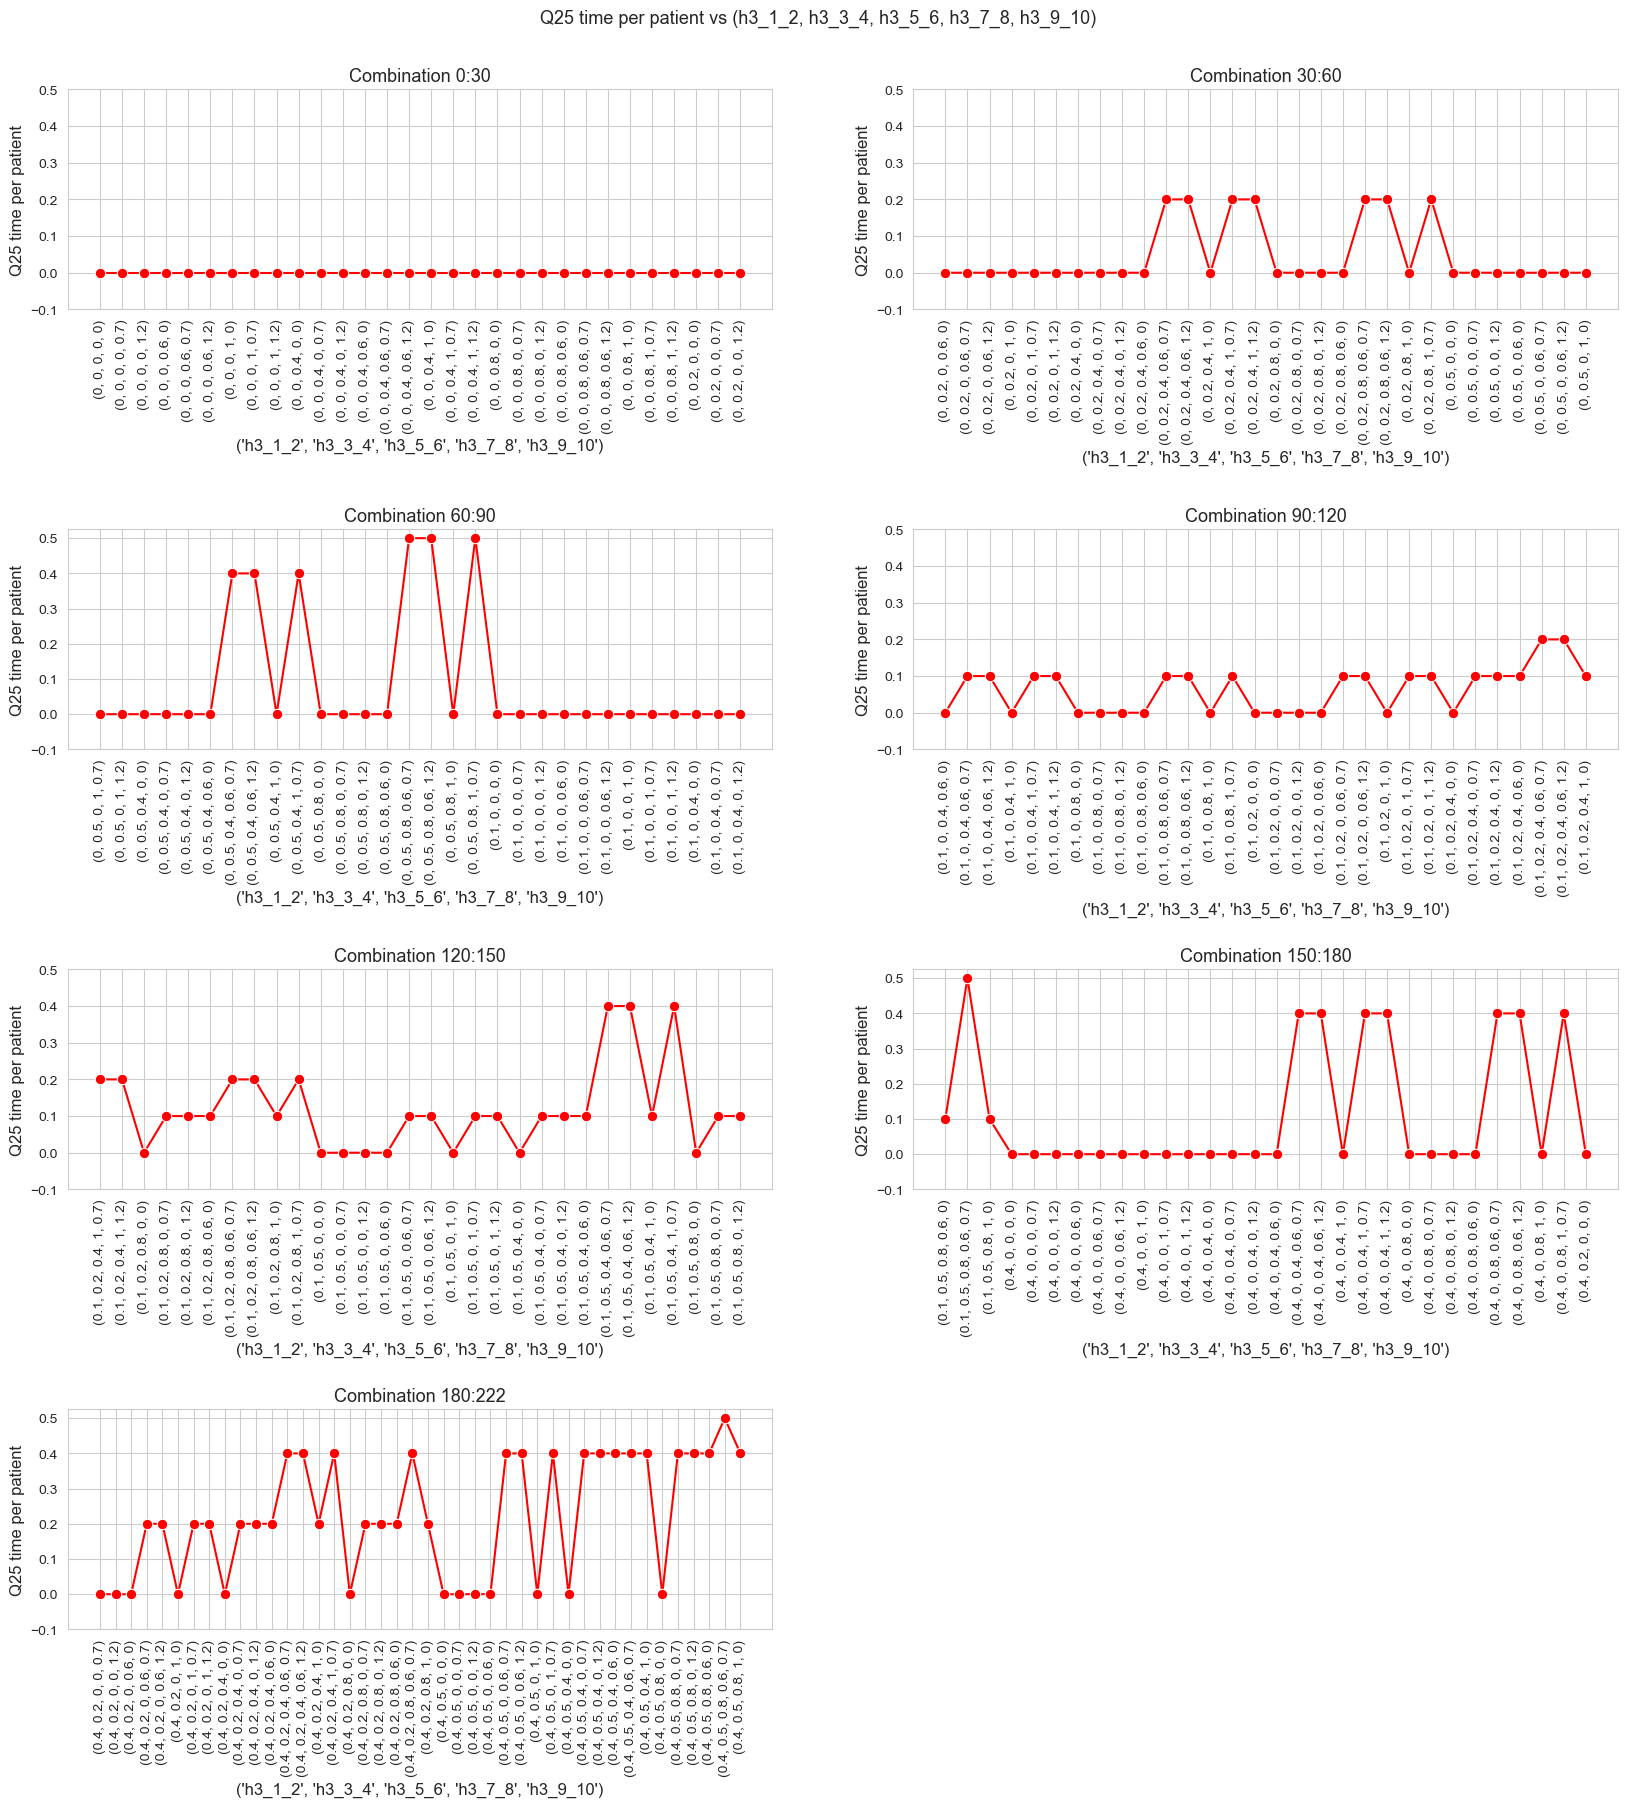

In [128]:
Q25_time_multi_plot(results2_multi=results2_multi, n_cols=2, figsize=(20, 20), interval_width=30)

**Interpretation of the results:**

From the plot we can extract some conclusions that seems to be fulfilled in general.

- The combination of values of $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$ indeed affect to the $25$-quantile of the time spent in patients. 

     But it is not easy at all to find out a clear pattern that explains the behavior seen in the plot.




- **Average time spent per patient vs $w$ vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$**

In [129]:
def avg_time_w_multi_plot(results2_multi, n_cols = 3, figsize = (22, 80), interval_width=5) :

    #param_combi_feasible_str = [str(x) for x in results2_multi_LM[param_names]['feasible']]

    limits = list(np.arange(0, len(results2_multi[param_names]['feasible']), interval_width))
    limits.append(len(results2_multi[param_names]['feasible']))
    n_intervals = len(limits) - 1

    # Define the number of rows and columns for the matrix plot
    n_rows = int(np.ceil(n_intervals / n_cols))

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()  

    # Defining a ecdf-plot for each variable considered.
    for i in range(0, n_intervals) :

        ax = axes[i]  # Get the current axis
        param_combinations = list(results2_multi[param_names]['feasible'])[limits[i]:limits[i+1]]
        #ax.figure(figsize=(20, 10))
        for param_combi in param_combinations :
            sns.lineplot(y=list(results2_multi[param_names]['avg_time_patient_per_w'][param_combi].values()), 
                         x=results2_multi[param_names]['avg_time_patient_per_w'][param_combi].keys(), 
                         label=param_combi, marker='o', markersize=6, ax=ax)
        ax.set_title(f'$h_3$ combination {limits[i]}:{limits[i+1]}', fontsize=13)
        ax.tick_params(axis='x', rotation=0)
        ax.set_yticks(range(0,5))
        ax.set_xlabel('w', fontsize=12)
        ax.set_ylabel('Avg. time per patient', fontsize=12)
        ax.legend(title='$h_3$ combination', loc='upper right', bbox_to_anchor=(1.37, 1), fontsize=8, ncol=1)

    # Remove any unused subplots in case the number of 'geo' values is less than num_rows * num_cols
    for j in range(n_intervals, n_rows*n_cols):
        fig.delaxes(axes[j])

    # Establishing a general tittle for the plot.
    plt.suptitle('Avg. time per patient vs $w$ vs $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910})$', fontsize=13, y=0.89)
    
    plt.subplots_adjust(hspace=0.4, wspace=0.5) 


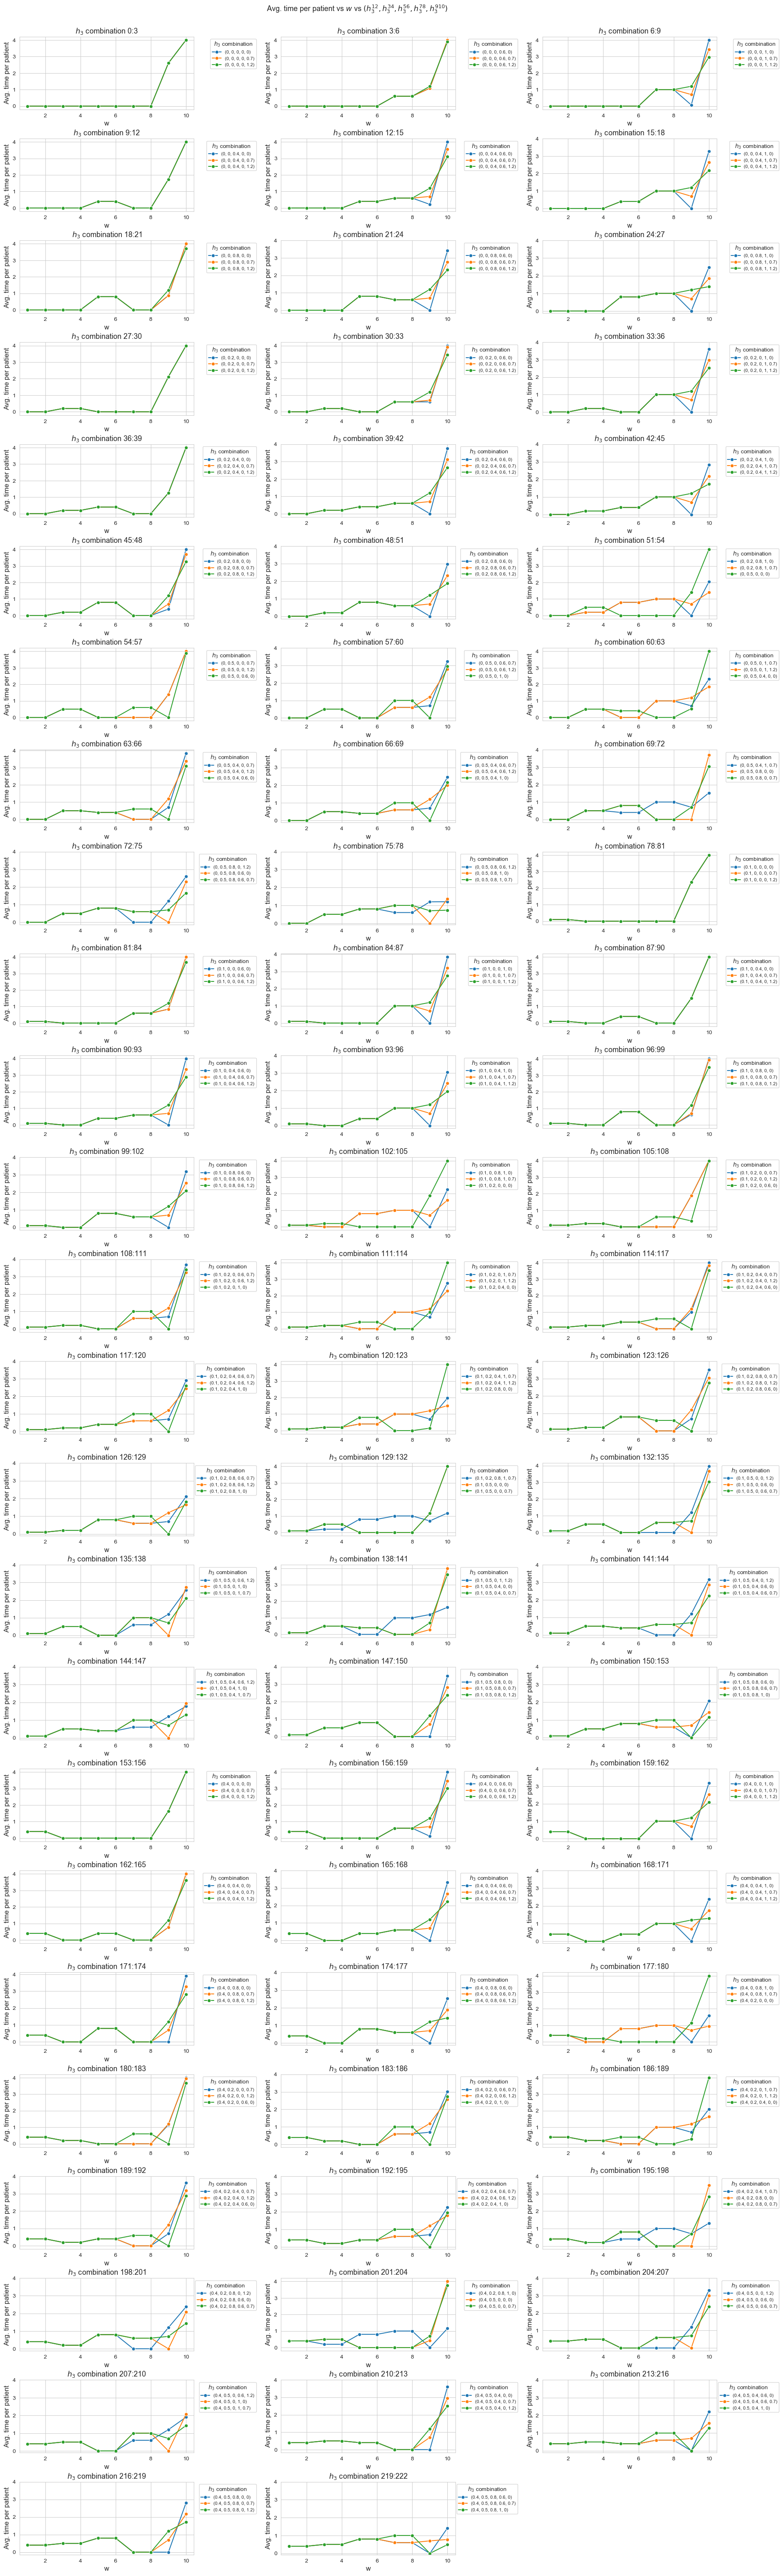

In [130]:
avg_time_w_multi_plot(results2_multi=results2_multi, n_cols = 3, figsize = (22, 80), interval_width=3)

**Interpretation of the results:**

Since there are many results to interpret, we will only focus  in few of them. 

- Combination 0:3: 

    - $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0,0,0,0,0)$
    - $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0,0,0,0,0.7)$
    - $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0,0,0,0,1.2)$

       - The average time spent in patients for $w_j = 1,2,\dots,8$ is $0$, for $w_j=9$ is $2.75$ and for $w_j=10$ is $4$, that is the value set for $h_4$.
    There are no differences depending on the combination.



- Combination 6:9: 

    - $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0,0,0,0.1,0) \quad (1)$
    - $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0,0,0,0.1,0.7) \quad (2)$
    - $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0,0,0,0.1,1.2) \quad (3)$

       - The average time spent in patients for $w_j = 1,2,\dots,6$ is $0$, for $w_j=7,8$ is $1$.
    
       - For $w_j=9$ is $0$ for combination $(1)$, $0.7$ for $(2)$ and $1.2$ for $(3)$, since the only difference between the combinations is $h_3^{910}$, we can see that, the greater $h_3^{910}$, the greater avg. time spent in type-9 patients.

       - For $w_j=10$ is $4$ for combination $(1)$, $3.5$ for $(2)$ and $3$ for $(3)$, since the only difference between the combinations is $h_3^{910}$, we can see that, the greater $h_3^{910}$, the lower avg. time spent in type-10 patients.

       - These last two results lead to a conclusion that was already posed in previous sections. The remaining working time is invested in type-10 patients, since are the most severe, and since the time spent in type-9 patients decreases when $h_3^{910}$ decreases, the lower $h_3^{910}$, the more extra time to spent in type-10 patients.



- Combination 6:9: 

    - $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4,0.5,0.8,0,0) \quad (1)$
    - $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4,0.5,0.8,0,0.7) \quad (2)$
    - $(h_3^{12}, h_3^{34}, h_3^{56}, h_3^{78}, h_3^{910}) = (0.4,0.5,0.8,0,1.2) \quad (3)$

       - The average time spent in patients for $w_j = 1,2$ is $0 = h_3^{12}$, for $w_j=3,4$ is $0.5=h_3^{34}$, for $w_j=5,6$ is $0.8=h_3^{56}$, for $w_j=7.8$ is $0=h_3^{78}$.
    
       - For $w_j=9$ is $0$ for combination $(1)$, $0.7$ for $(2)$ and $1.2$ for $(3)$, since the only difference between the combinations is $h_3^{910}$, we can see that, the greater $h_3^{910}$, the greater avg. time spent in type-9 patients.

       - For $w_j=10$ is $2.9$ for combination $(1)$, $2.1$ for $(2)$ and $1.7$ for $(3)$, since the only difference between the combinations is $h_3^{910}$, we can see that, the greater $h_3^{910}$, the lower avg. time spent in type-10 patients.

       - The behavior observed in this case is analogous to the previous one, with the difference that in this case, tandems work more in type 1 to 6 patients, but less in type 7-8, and this lead to a lower extra time to spent in type-10 patients.


Same analysis may be applied to the rest of subplots (sets of combinations).